<a href="https://colab.research.google.com/github/Frederick-Teye/ML-models/blob/main/predict_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
ziya_data = pd.read_csv('drive/MyDrive/diabetes_data/diabetes_dataset_with_notes.csv')
ziya_data.head()

year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  \
0           never  27.32          5.0                  100         0   
1           never  19.95          5.0                   90         0   
2           never  23.76          4.8                  160         0   
3           never  27.32          4.0                  159         0   
4           never  23.75          6.5                   90         0   

                                      clinical_notes  
0  Overweight, advised dietary and exercise modif...  
1                                 Healthy BMI range.  
2  Young patient, generally lower risk but needs ...  
3  Overweight, advised dietary and exercise modif...  
4  Healthy BMI range. High HbA1c level, indicativ...

In [ ]:
ziya_data.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [ ]:
pima_data = pd.read_csv('/content/drive/MyDrive/diabetes_data/uciml_pima-indians-diabetes-database_data/diabetes.csv')
pima_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
ziya_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [ ]:
cleaned_ziya_data = ziya_data.drop(columns=['location', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'clinical_notes', 'year'])
cleaned_ziya_data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  32.0             0              0           never  27.32   
1  Female  29.0             0              0           never  19.95   
2    Male  18.0             0              0           never  23.76   
3    Male  41.0             0              0           never  27.32   
4  Female  52.0             0              0           never  23.75   

   hbA1c_level  blood_glucose_level  diabetes  
0          5.0                  100         0  
1          5.0                   90         0  
2          4.8                  160         0  
3          4.0                  159         0  
4          6.5                   90         0

In [ ]:
cleaned_ziya_data.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [ ]:
cleaned_ziya_data.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [ ]:
cleaned_ziya_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   hbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.9710

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.96      0.69      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



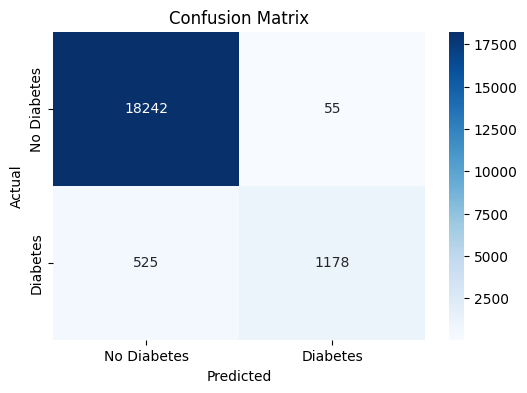

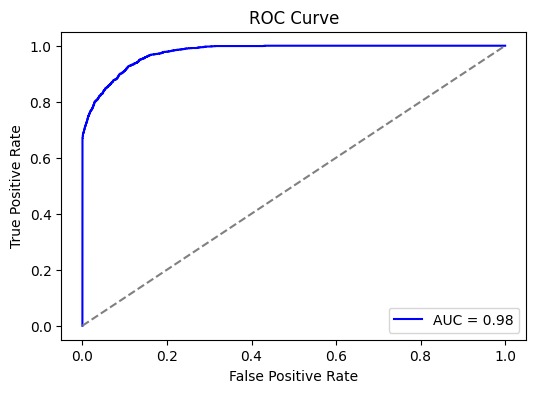

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Load your dataset (Ensure you have already cleaned it)
# df = pd.read_csv("your_cleaned_data.csv")  # Uncomment if needed

# Define features and target
X = cleaned_ziya_data.drop(columns=['diabetes'])  # Replace 'diabetes' with your actual target column
y = cleaned_ziya_data['diabetes']

# Identify numerical and categorical columns
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', 'passthrough', num_features),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
])

# Create pipeline with XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
])

# Split data into training and testing (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Detailed performance report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve & AUC Score
y_prob = pipeline.predict_proba(X_test)[:,1]  # Get probability scores
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='grey')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:48:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.9710
Precision: 0.9554
Recall (Sensitivity): 0.6917
F1 Score: 0.8025

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.96      0.69      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



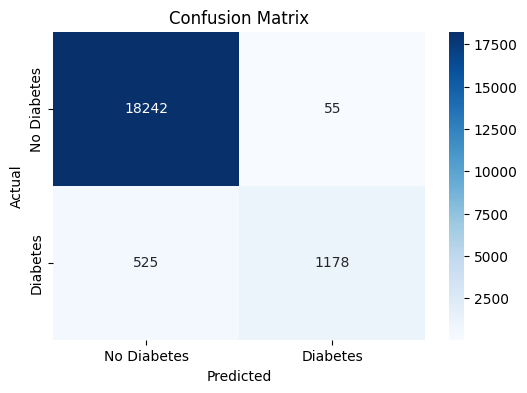

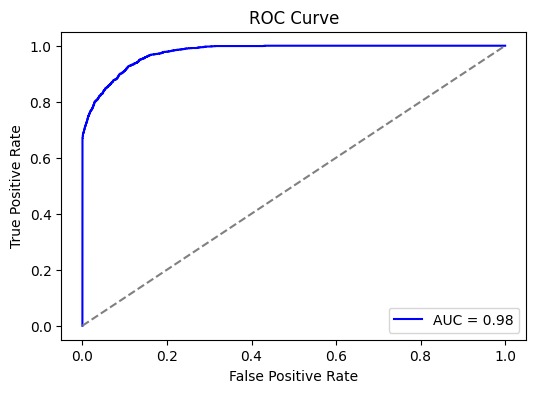

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Load your dataset (Ensure you have already cleaned it)
# df = pd.read_csv("your_cleaned_data.csv")  # Uncomment if needed

# Define features and target
X = cleaned_ziya_data.drop(columns=['diabetes'])  # Replace 'diabetes' with your actual target column
y = cleaned_ziya_data['diabetes']

# Identify numerical and categorical columns
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', 'passthrough', num_features),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
])

# Create pipeline with XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc')),  # Changed to 'auc' for monitoring
])

# Split data into training and testing (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probability scores

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed performance report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve & AUC Score
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:11:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'classifier__colsample_bytree': 0.7, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 0.7}
Accuracy: 0.9724
Precision: 0.9799
Recall (Sensitivity): 0.6888
Specificity: 0.9987
F1-Score: 0.8090
AUC Score: 0.9791


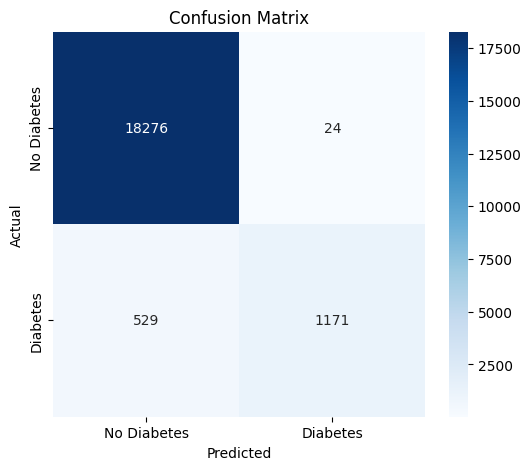

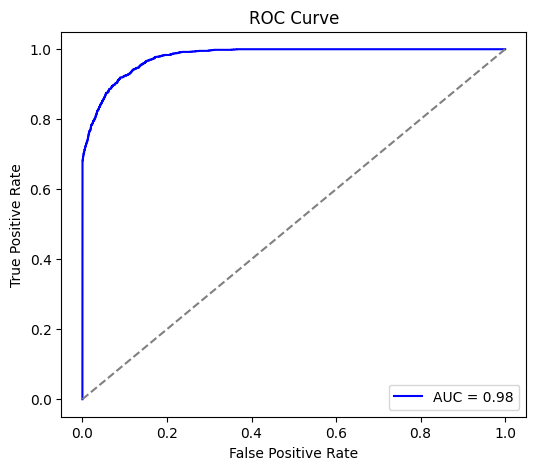

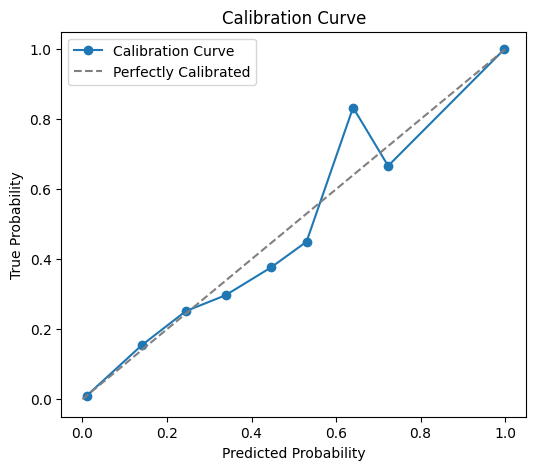

In [ ]:
# changed eval_metric='logloss' to eval_metric='auc' but had the same metrics as above
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.calibration import calibration_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Identify numerical and categorical features
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Define features and target
X = cleaned_ziya_data.drop(columns=["diabetes"])  # Update column name
y = cleaned_ziya_data["diabetes"]

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing: Scaling numerical + Encoding categorical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Pipeline: Preprocessing + Model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", xgb_model)
])

# Define hyperparameter grid for tuning
param_grid = {
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__n_estimators": [100, 200, 300],
    "classifier__subsample": [0.7, 0.8, 1.0],
    "classifier__colsample_bytree": [0.7, 0.8, 1.0]
}

# Perform Grid Search with 5-Fold Cross Validation
grid_search = GridSearchCV(pipeline, param_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# ROC Curve & AUC
y_proba = best_xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='uniform')

# Print Results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot Calibration Curve
plt.figure(figsize=(6, 5))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label="Calibration Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfectly Calibrated")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.legend()
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:52:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'classifier__colsample_bytree': 0.7, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 0.7}
Accuracy: 0.9724
Precision: 0.9799
Recall (Sensitivity): 0.6888
Specificity: 0.9987
F1-Score: 0.8090
AUC Score: 0.9791


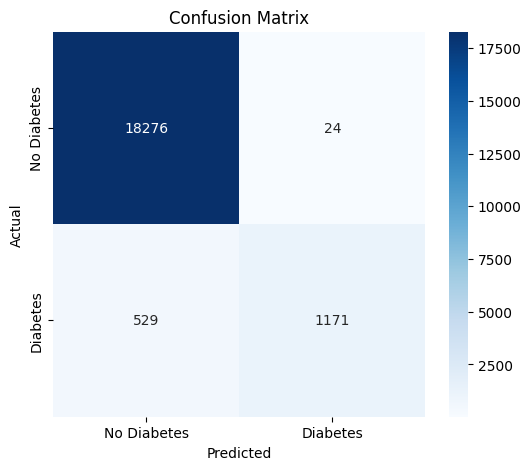

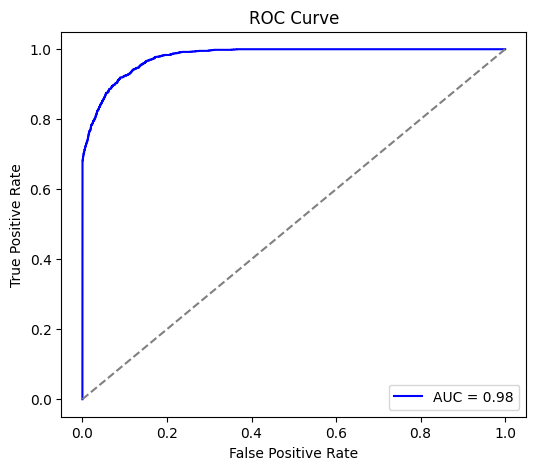

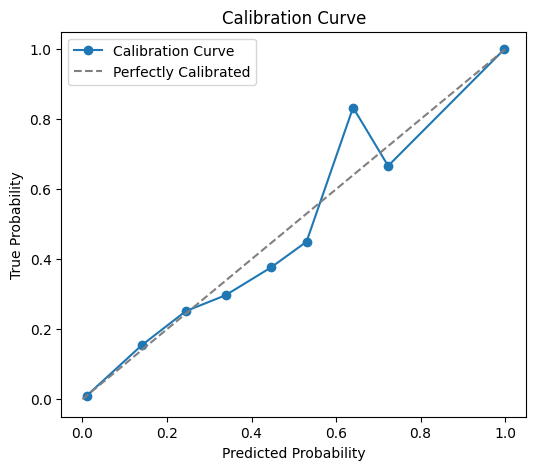

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.calibration import calibration_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Identify numerical and categorical features
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Define features and target
X = cleaned_ziya_data.drop(columns=["diabetes"])  # Update column name
y = cleaned_ziya_data["diabetes"]

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing: Scaling numerical + Encoding categorical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Pipeline: Preprocessing + Model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", xgb_model)
])

# Define hyperparameter grid for tuning
param_grid = {
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__n_estimators": [100, 200, 300],
    "classifier__subsample": [0.7, 0.8, 1.0],
    "classifier__colsample_bytree": [0.7, 0.8, 1.0]
}

# Perform Grid Search with 5-Fold Cross Validation
grid_search = GridSearchCV(pipeline, param_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# ROC Curve & AUC
y_proba = best_xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='uniform')

# Print Results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot Calibration Curve
plt.figure(figsize=(6, 5))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label="Calibration Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfectly Calibrated")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.legend()
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:38:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'classifier__colsample_bytree': 0.7, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__scale_pos_weight': 10.764705882352942, 'classifier__subsample': 0.7}
              precision    recall  f1-score   support

           0       1.00      0.01      0.02     18300
           1       0.09      1.00      0.16      1700

    accuracy                           0.09     20000
   macro avg       0.54      0.50      0.09     20000
weighted avg       0.92      0.09      0.03     20000

AUC Score: 0.9633370298939248


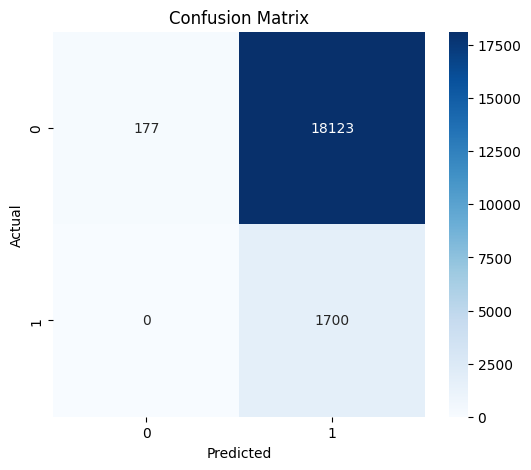

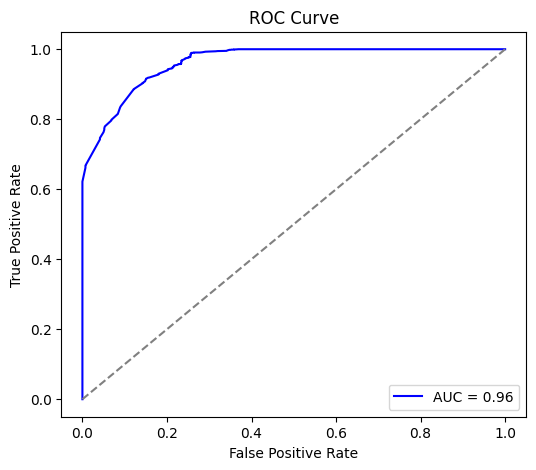

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define features
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Set X and y
X = cleaned_ziya_data.drop(columns=["diabetes"])
y = cleaned_ziya_data["diabetes"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Pipeline with SMOTE
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Handling class imbalance
    ('classifier', xgb)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9],
    'classifier__scale_pos_weight': [sum(y_train == 0) / sum(y_train == 1)]  # Balancing classes
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:46:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      0.94      0.96     18300
           1       0.56      0.87      0.68      1700

    accuracy                           0.93     20000
   macro avg       0.77      0.90      0.82     20000
weighted avg       0.95      0.93      0.94     20000

AUC Score: 0.9766789135326263


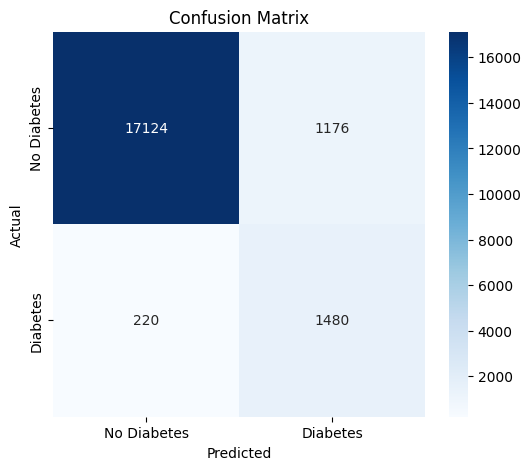

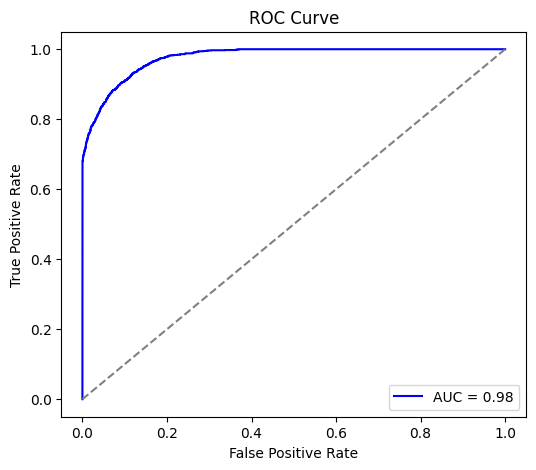

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature categories
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Load and split data
X = cleaned_ziya_data.drop(columns=["diabetes"])  # Update column name
y = cleaned_ziya_data["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)) # sparse=False for SMOTE compatibility
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

# XGBoost classifier
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.7,
    colsample_bytree=0.7,
    scale_pos_weight=2,  # Try smaller values
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Full pipeline with SMOTE applied after preprocessing
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(sampling_strategy="auto", random_state=42)),
    ("classifier", xgb)
])


# Train model
pipeline.fit(X_train, y_train) # Fitting on original train data

# Predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Metrics
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8445
Precision: 0.3496
Recall: 0.9641
F1 Score: 0.5131
ROC-AUC: 0.9773
Log Loss: 0.2809
MCC: 0.5250

Confusion Matrix:
[[15251  3049]
 [   61  1639]]


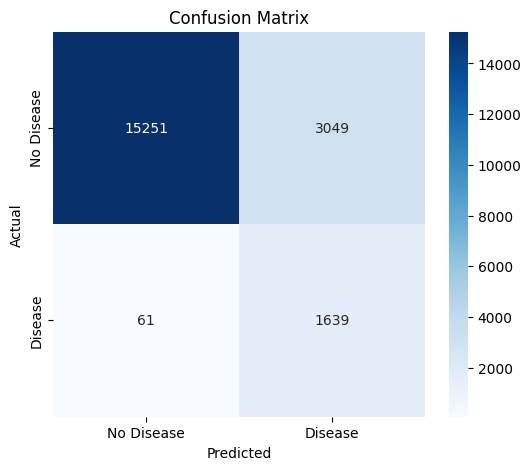

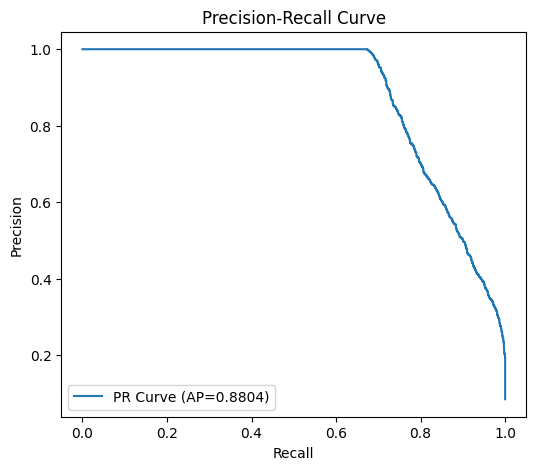

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, matthews_corrcoef, log_loss,
    precision_recall_curve, average_precision_score
)

# Load Data (Assumed pre-cleaned)
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Defined numerical and categorical features
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Splitting Data (Stratified to Maintain Class Distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessing Pipeline
# --- The change is in this section ---
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

X_train = preprocessor.fit_transform(X_train) # Apply preprocessing before SMOTE
X_test = preprocessor.transform(X_test) # Apply preprocessing to the test set

# Handle Class Imbalance
# Now apply SMOTE after one-hot encoding
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# --- End of change ---


# Compute Scale Pos Weight
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Define XGBoost Model
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


# Train Model (No need for pipeline here as we've already preprocessed)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
mcc = matthews_corrcoef(y_test, y_pred)
logloss = log_loss(y_test, y_prob)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(6,5))
plt.plot(recall_vals, precision_vals, label=f'PR Curve (AP={avg_precision:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cleaned_ziya_data is your DataFrame
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Identify numerical and categorical columns
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a preprocessing pipeline for categorical features
# Change sparse_output to False and add handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

# Define the XGBoost classifier with specified hyperparameters
# Explicitly enable categorical features and change eval_metric
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.01,
    early_stopping_rounds=5,
    eval_metric='logloss',
    use_label_encoder=False,
    enable_categorical=True, # Enable categorical features
    random_state=42
)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Define the evaluation set for early stopping
eval_set = [(preprocessor.transform(X_train), y_train), (preprocessor.transform(X_test), y_test)]
# Fit the model with early stopping
pipeline.fit(
    X_train,
    y_train,
    classifier__eval_set=eval_set,
    classifier__verbose=False  # Set to False for cleaner output
)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# ... (rest of the code remains the same)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Model Performance Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# --- Visualizations ---

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 3. Bar Plot of Metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.show()

# Optional: Feature Importance
ohe_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([ohe_feature_names, num_features])
feature_importance = pipeline.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})
print("\nFeature Importance:")
print(importance_df.sort_values(by='Importance', ascending=False))

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cleaned_ziya_data is your DataFrame
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Identify numerical and categorical columns
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a preprocessing pipeline for categorical features
# Change sparse_output to False and add handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

# Define the XGBoost classifier with specified hyperparameters
# Explicitly enable categorical features and change eval_metric
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.01,
    early_stopping_rounds=5,
    eval_metric='logloss',
    use_label_encoder=False,
    enable_categorical=True, # Enable categorical features
    random_state=42
)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Define the evaluation set for early stopping
eval_set = [(preprocessor.transform(X_train), y_train), (preprocessor.transform(X_test), y_test)]
# Fit the model with early stopping
pipeline.fit(
    X_train,
    y_train,
    classifier__eval_set=eval_set,
    classifier__verbose=False  # Set to False for cleaner output
)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# ... (rest of the code remains the same)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Model Performance Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# --- Visualizations ---

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 3. Bar Plot of Metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.show()

# Optional: Feature Importance
ohe_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([ohe_feature_names, num_features])
feature_importance = pipeline.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})
print("\nFeature Importance:")
print(importance_df.sort_values(by='Importance', ascending=False))

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cleaned_ziya_data is your DataFrame
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Identify numerical and categorical columns
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a preprocessing pipeline for categorical features
# Change sparse_output to False and add handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

# Define the XGBoost classifier with specified hyperparameters
# Explicitly enable categorical features and change eval_metric
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.01,
    early_stopping_rounds=5,
    eval_metric='logloss',
    use_label_encoder=False,
    enable_categorical=True, # Enable categorical features
    random_state=42
)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])


# Fit the model first
pipeline.fit(X_train, y_train)

# Now define eval_set and re-fit with early stopping
# The preprocessor is fitted within the pipeline during the initial fit
eval_set = [(pipeline.named_steps['preprocessor'].transform(X_train), y_train),
            (pipeline.named_steps['preprocessor'].transform(X_test), y_test)]

pipeline.fit(
    X_train,
    y_train,
    classifier__eval_set=eval_set,
    classifier__verbose=False
)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# ... (rest of the code remains the same)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Model Performance Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# --- Visualizations ---

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 3. Bar Plot of Metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.show()

# Optional: Feature Importance
ohe_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([ohe_feature_names, num_features])
feature_importance = pipeline.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})
print("\nFeature Importance:")
print(importance_df.sort_values(by='Importance', ascending=False))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ValueError: Must have at least 1 validation dataset for early stopping.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Performance Evaluation:
Accuracy: 0.9727
Precision: 0.9915
Recall: 0.6841
F1-Score: 0.8096
ROC-AUC Score: 0.9790

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.99      0.68      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



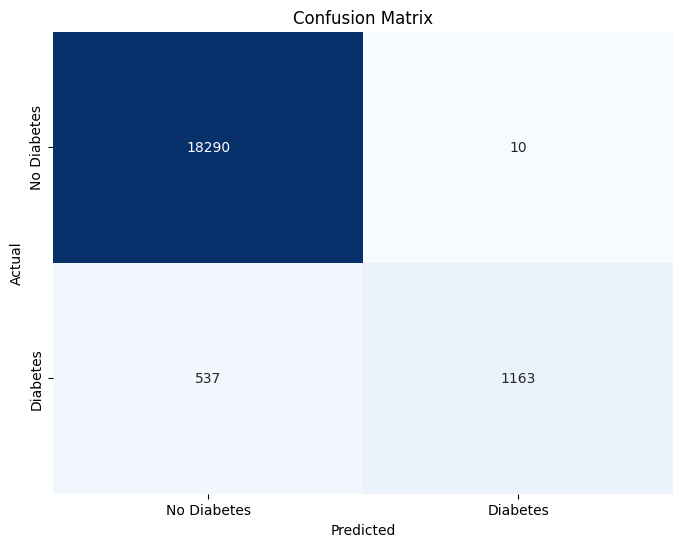

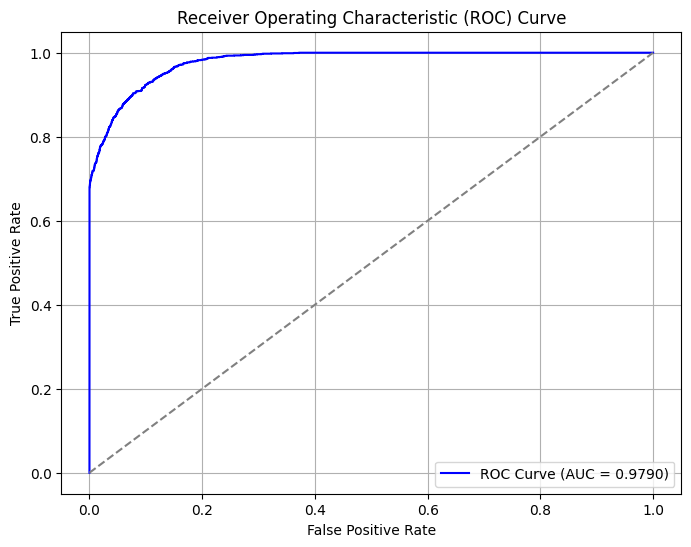

<ipython-input-16-e3cd61d18de3>:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


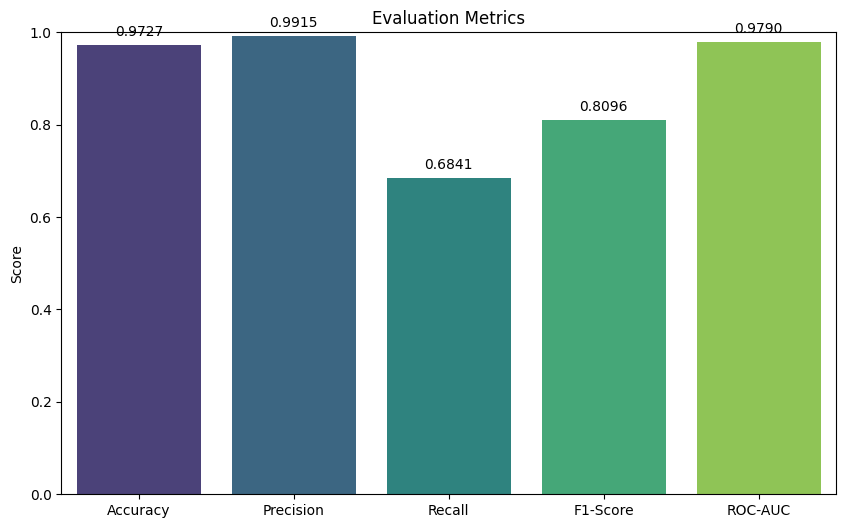


Feature Importance:
                        Feature  Importance
13                  hbA1c_level    0.532137
14          blood_glucose_level    0.242585
9                           age    0.056094
10                 hypertension    0.035845
3       smoking_history_No Info    0.033839
11                heart_disease    0.032938
12                          bmi    0.027358
1                   gender_Male    0.011954
8   smoking_history_not current    0.005227
4       smoking_history_current    0.004989
5          smoking_history_ever    0.004702
0                 gender_Female    0.004456
7         smoking_history_never    0.004052
6        smoking_history_former    0.003824
2                  gender_Other    0.000000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cleaned_ziya_data is your DataFrame
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Identify numerical and categorical columns
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a preprocessing pipeline for categorical features
# Change sparse_output to False and add handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

# Define the XGBoost classifier with specified hyperparameters
# Explicitly enable categorical features and change eval_metric
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.01,
    early_stopping_rounds=5,
    eval_metric='logloss',
    use_label_encoder=False,
    enable_categorical=True, # Enable categorical features
    random_state=42
)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])


# Fit the model first
#pipeline.fit(X_train, y_train)

# Now define eval_set and re-fit with early stopping
# The preprocessor is fitted within the pipeline during the initial fit
# eval_set = [(pipeline.named_steps['preprocessor'].transform(X_train), y_train),
#             (pipeline.named_steps['preprocessor'].transform(X_test), y_test)]

# Fit the model with early stopping using fit directly on the classifier
# This ensures the preprocessor is applied before data is passed to XGBoost
X_train_transformed = preprocessor.fit_transform(X_train) # Preprocess training data
X_test_transformed = preprocessor.transform(X_test) # Preprocess test data
eval_set = [(X_train_transformed, y_train), (X_test_transformed, y_test)] # Define eval_set


pipeline.fit(
    X_train, # Original training data
    y_train,
    classifier__eval_set=eval_set, # Pass eval_set to XGBoost
    classifier__verbose=False  # Set to False for cleaner output
)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# ... (rest of the code remains the same)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Model Performance Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# --- Visualizations ---

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 3. Bar Plot of Metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.show()

# Optional: Feature Importance
ohe_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([ohe_feature_names, num_features])
feature_importance = pipeline.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})
print("\nFeature Importance:")
print(importance_df.sort_values(by='Importance', ascending=False))


Automatically calculated class weight: 10.76

Evaluation at Threshold = 0.50
Accuracy: 0.9061
Precision: 0.4730
Recall: 0.9212
F1-Score: 0.6250
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95     18300
           1       0.47      0.92      0.63      1700

    accuracy                           0.91     20000
   macro avg       0.73      0.91      0.79     20000
weighted avg       0.95      0.91      0.92     20000



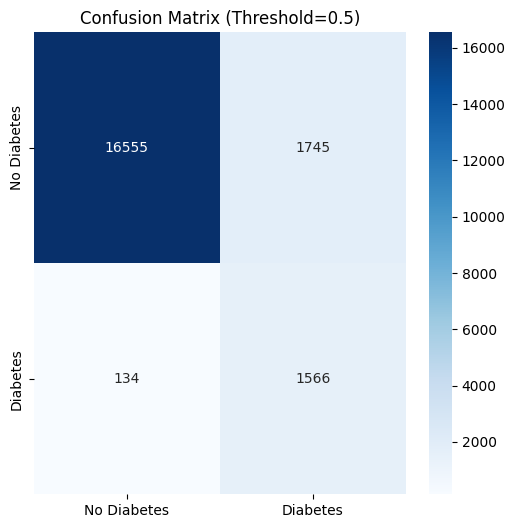


Evaluation at Threshold = 0.87
Accuracy: 0.9724
Precision: 0.9652
Recall: 0.7006
F1-Score: 0.8119
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.97      0.70      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



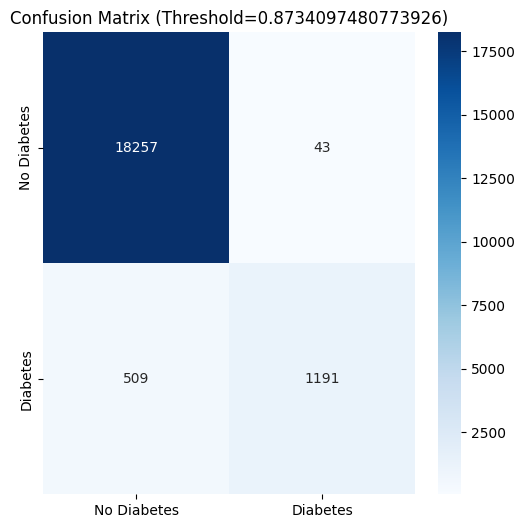


Evaluation at Threshold = 0.70
Accuracy: 0.9535
Precision: 0.6927
Recall: 0.8141
F1-Score: 0.7485
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.69      0.81      0.75      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.89      0.86     20000
weighted avg       0.96      0.95      0.96     20000



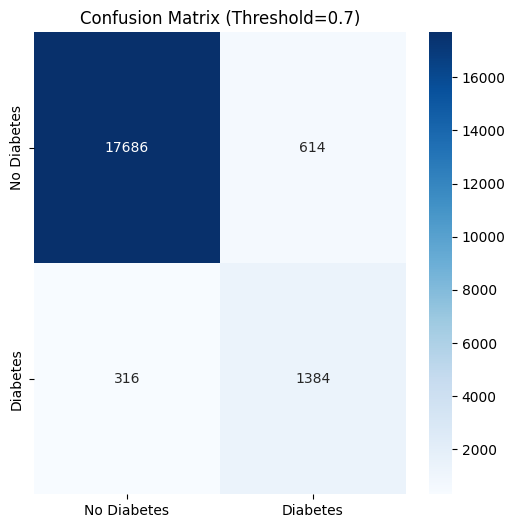

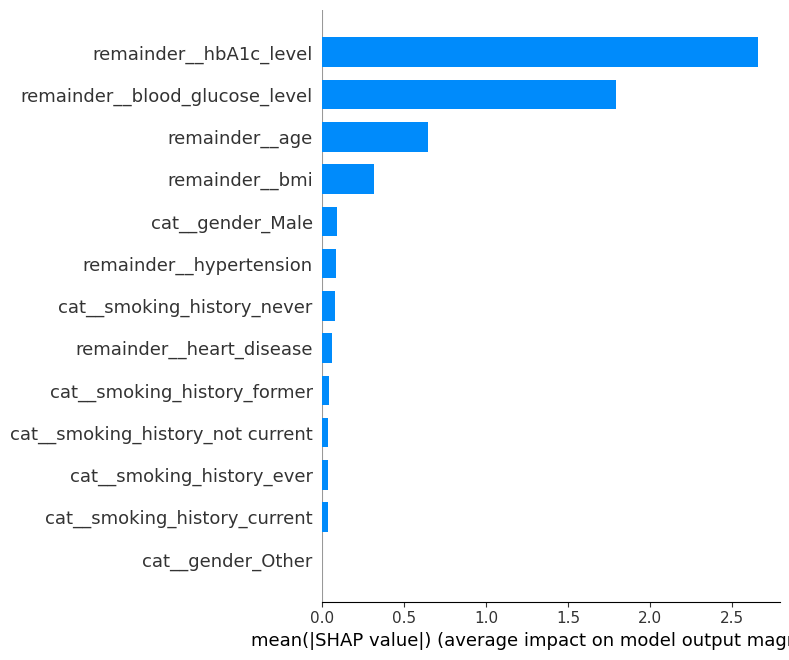

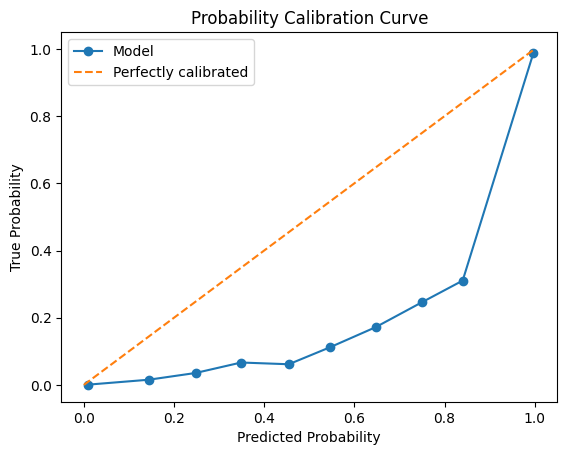

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# ===== KEY IMPROVEMENT =====
# Calculate precise class weight
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"\nAutomatically calculated class weight: {pos_weight:.2f}")

# Initialize XGBoost with clinical considerations
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.01,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],  # Focus on precision-recall
    random_state=42,
    scale_pos_weight=pos_weight,  # Using precise weight
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)

# Train with validation set
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# ===== THRESHOLD OPTIMIZATION =====
# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

# Method 1: Precision-Recall tradeoff
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Method 2: Clinical preference (prioritize precision)
clinical_threshold = 0.7  # From your previous best result

# ===== EVALUATION =====
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)

    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Compare thresholds
evaluate_model(0.5)  # Default
evaluate_model(optimal_threshold)  # Data-driven
evaluate_model(clinical_threshold)  # Clinically preferred

# ===== FEATURE ANALYSIS =====
# SHAP Explanations (for clinical interpretability)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)

plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# ===== CALIBRATION CHECK =====
# Probability calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()


Automatically calculated class weight: 10.76
Optimal threshold (max F1): 0.8344

Evaluation at Threshold = 0.50
Accuracy: 0.9358
Precision: 0.5818
Recall: 0.8706
F1-Score: 0.6975
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     18300
           1       0.58      0.87      0.70      1700

    accuracy                           0.94     20000
   macro avg       0.78      0.91      0.83     20000
weighted avg       0.95      0.94      0.94     20000



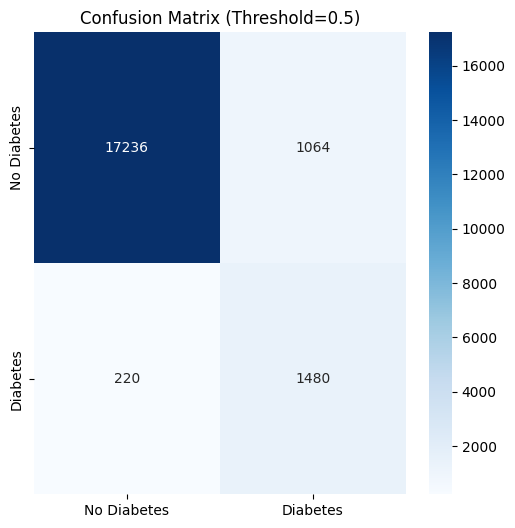


Evaluation at Threshold = 0.65
Accuracy: 0.9597
Precision: 0.7499
Recall: 0.7900
F1-Score: 0.7694
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.75      0.79      0.77      1700

    accuracy                           0.96     20000
   macro avg       0.87      0.88      0.87     20000
weighted avg       0.96      0.96      0.96     20000



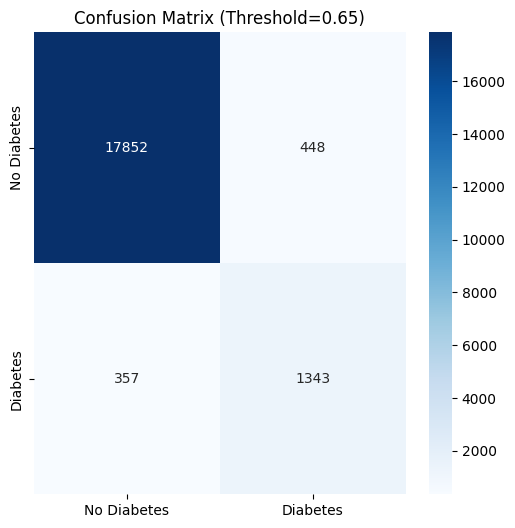


Evaluation at Threshold = 0.75
Accuracy: 0.9692
Precision: 0.8951
Recall: 0.7229
F1-Score: 0.7999
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.90      0.72      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.93      0.86      0.89     20000
weighted avg       0.97      0.97      0.97     20000



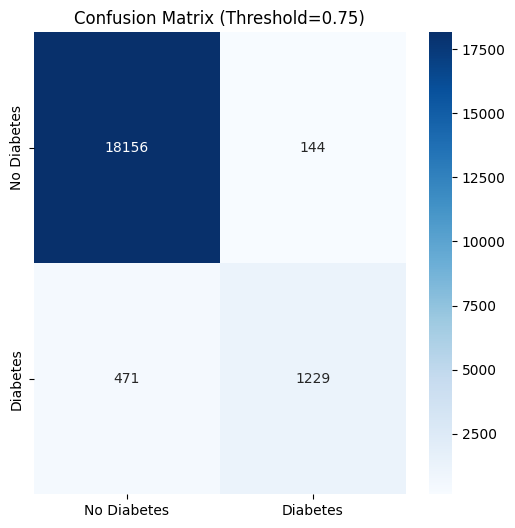


Evaluation at Threshold = 0.83
Accuracy: 0.9727
Precision: 0.9769
Recall: 0.6953
F1-Score: 0.8124
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.98      0.70      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



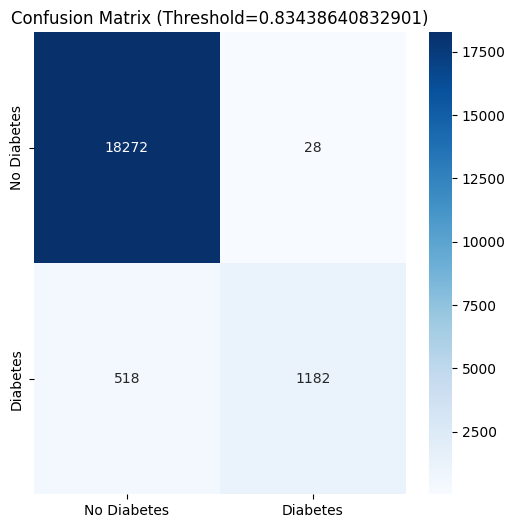

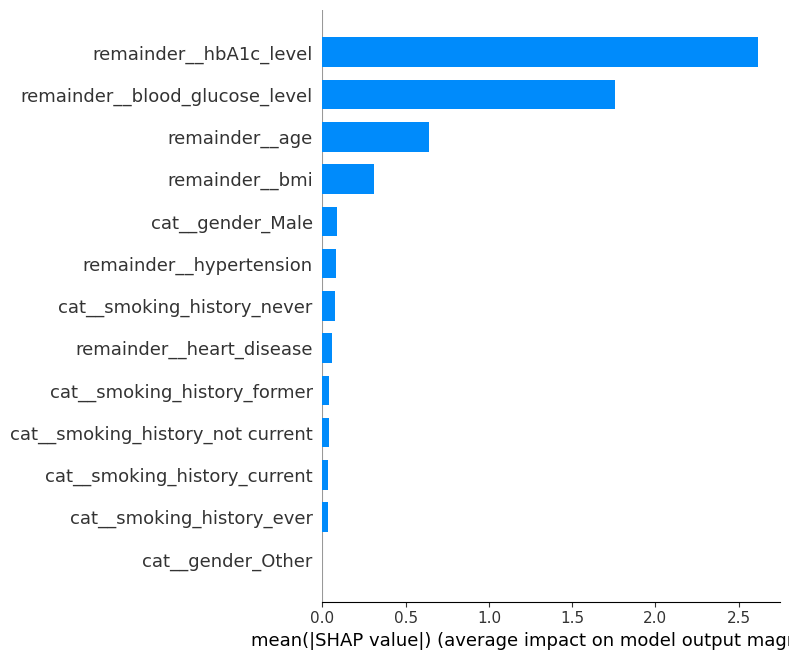

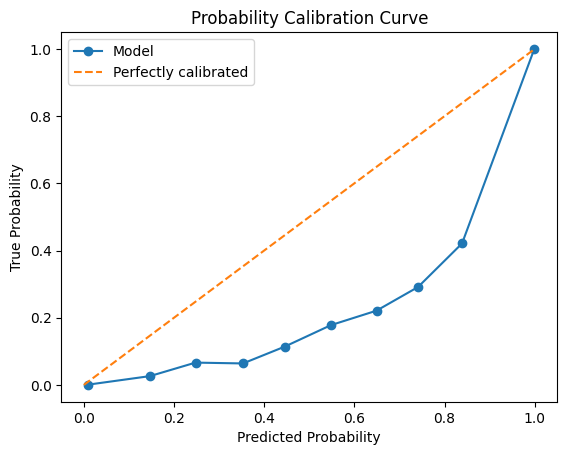

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.calibration import calibration_curve

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Calculate precise class weight (for reference)
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"\nAutomatically calculated class weight: {pos_weight:.2f}")

# Initialize XGBoost with clinical considerations
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.01,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=7,  # Adjusted to 7
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)

# Train with validation set
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Test multiple thresholds
for threshold in [0.5, 0.65, 0.75, optimal_threshold]:
    evaluate_model(threshold)

# SHAP Explanations
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)
plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()


Automatically calculated class weight: 10.76
Optimal threshold (max F1): 0.8344

Evaluation at Threshold = 0.50
Accuracy: 0.9358
Precision: 0.5818
Recall: 0.8706
F1-Score: 0.6975
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     18300
           1       0.58      0.87      0.70      1700

    accuracy                           0.94     20000
   macro avg       0.78      0.91      0.83     20000
weighted avg       0.95      0.94      0.94     20000



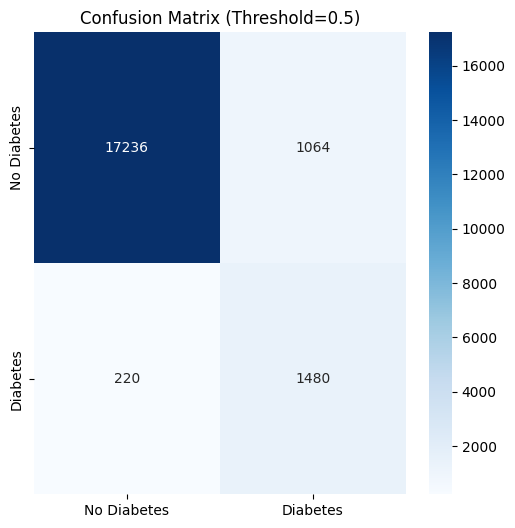


Evaluation at Threshold = 0.55
Accuracy: 0.9454
Precision: 0.6339
Recall: 0.8465
F1-Score: 0.7249
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     18300
           1       0.63      0.85      0.72      1700

    accuracy                           0.95     20000
   macro avg       0.81      0.90      0.85     20000
weighted avg       0.96      0.95      0.95     20000



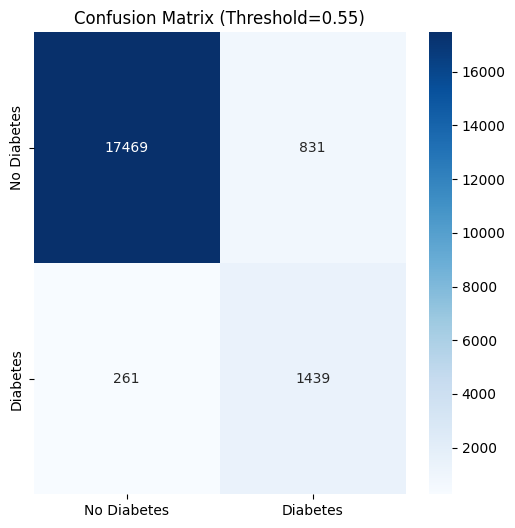


Evaluation at Threshold = 0.60
Accuracy: 0.9528
Precision: 0.6875
Recall: 0.8153
F1-Score: 0.7460
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.69      0.82      0.75      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.89      0.86     20000
weighted avg       0.96      0.95      0.95     20000



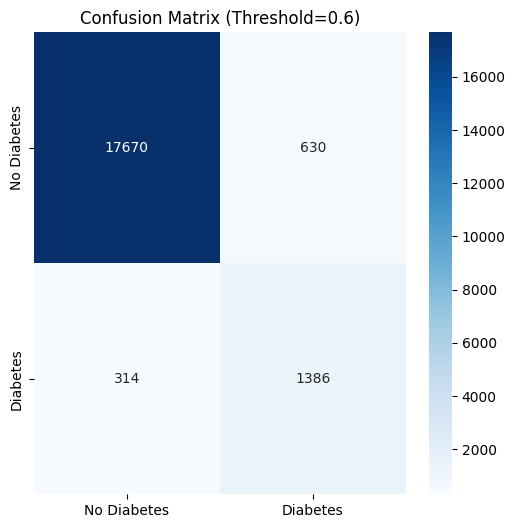


Evaluation at Threshold = 0.65
Accuracy: 0.9597
Precision: 0.7499
Recall: 0.7900
F1-Score: 0.7694
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.75      0.79      0.77      1700

    accuracy                           0.96     20000
   macro avg       0.87      0.88      0.87     20000
weighted avg       0.96      0.96      0.96     20000



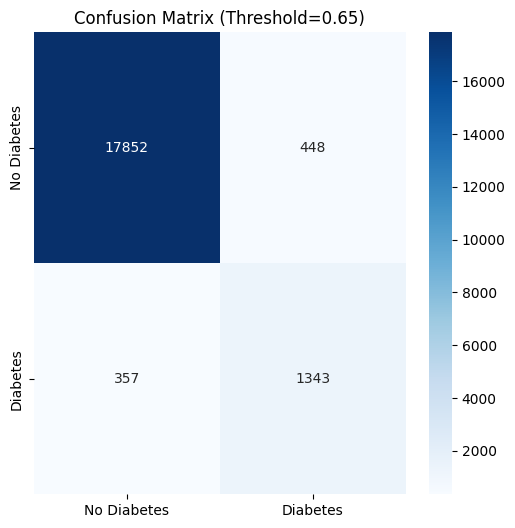


Evaluation at Threshold = 0.70
Accuracy: 0.9653
Precision: 0.8208
Recall: 0.7571
F1-Score: 0.7876
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.82      0.76      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.90      0.87      0.88     20000
weighted avg       0.96      0.97      0.96     20000



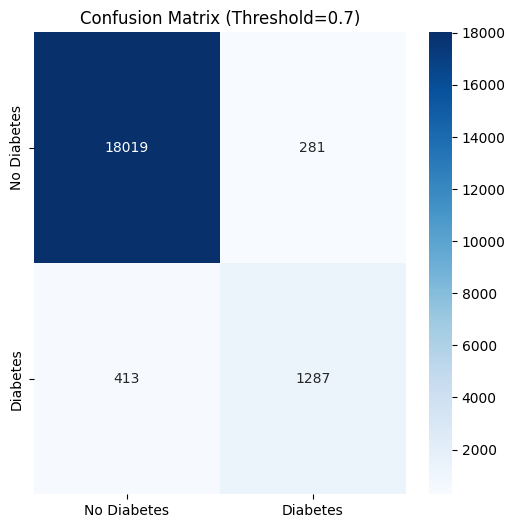

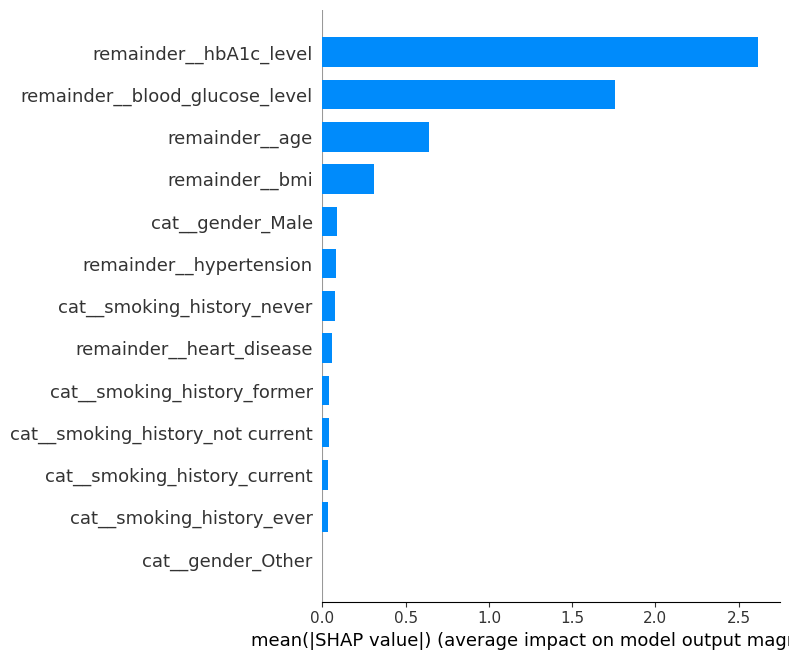

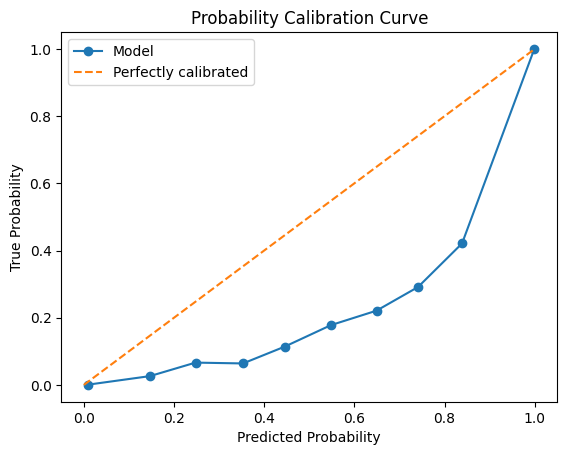

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.calibration import calibration_curve

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Calculate precise class weight (for reference)
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"\nAutomatically calculated class weight: {pos_weight:.2f}")

# Initialize XGBoost with clinical considerations
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.01,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=7,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)

# Train with validation set
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Test refined thresholds
for threshold in [0.5, 0.55, 0.60, 0.65, 0.70]:
    evaluate_model(threshold)

# SHAP Explanations
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)
plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()


Automatically calculated class weight: 10.76
Optimal threshold (max F1): 0.8344

Evaluation at Threshold = 0.60
Accuracy: 0.9528
Precision: 0.6875
Recall: 0.8153
F1-Score: 0.7460
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.69      0.82      0.75      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.89      0.86     20000
weighted avg       0.96      0.95      0.95     20000



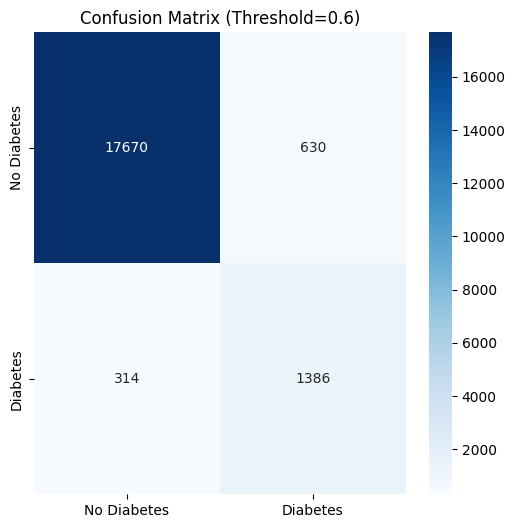


Evaluation at Threshold = 0.62
Accuracy: 0.9559
Precision: 0.7124
Recall: 0.8071
F1-Score: 0.7568
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18300
           1       0.71      0.81      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.85      0.89      0.87     20000
weighted avg       0.96      0.96      0.96     20000



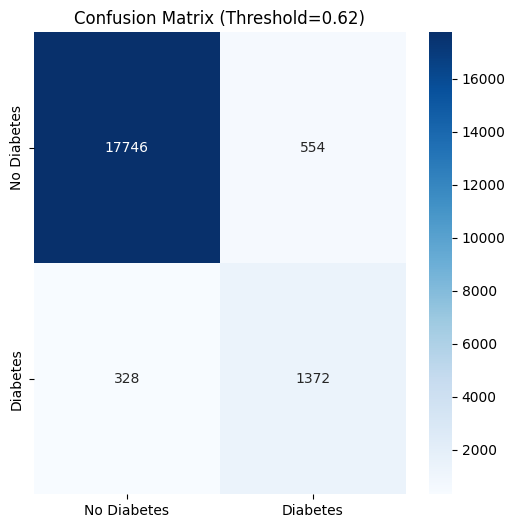


Evaluation at Threshold = 0.63
Accuracy: 0.9572
Precision: 0.7240
Recall: 0.8024
F1-Score: 0.7612
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18300
           1       0.72      0.80      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.85      0.89      0.87     20000
weighted avg       0.96      0.96      0.96     20000



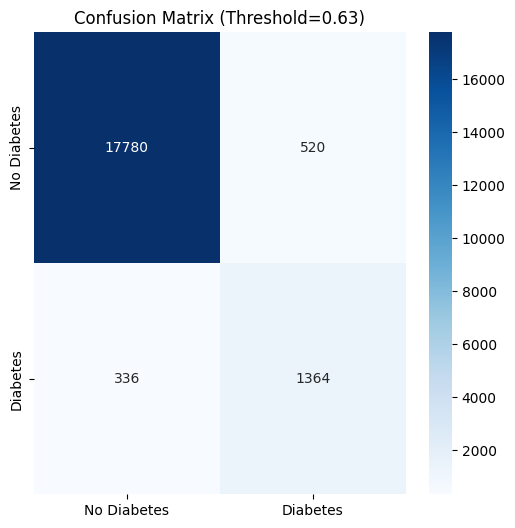


Evaluation at Threshold = 0.64
Accuracy: 0.9585
Precision: 0.7372
Recall: 0.7953
F1-Score: 0.7651
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18300
           1       0.74      0.80      0.77      1700

    accuracy                           0.96     20000
   macro avg       0.86      0.88      0.87     20000
weighted avg       0.96      0.96      0.96     20000



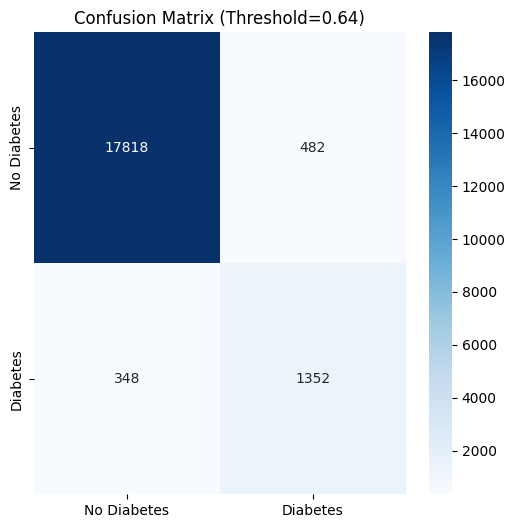


Evaluation at Threshold = 0.65
Accuracy: 0.9597
Precision: 0.7499
Recall: 0.7900
F1-Score: 0.7694
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.75      0.79      0.77      1700

    accuracy                           0.96     20000
   macro avg       0.87      0.88      0.87     20000
weighted avg       0.96      0.96      0.96     20000



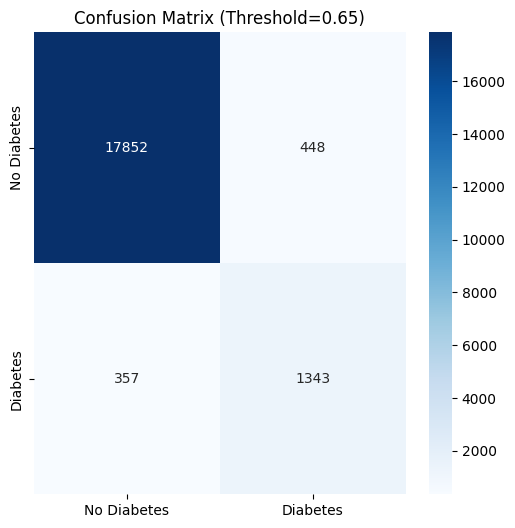

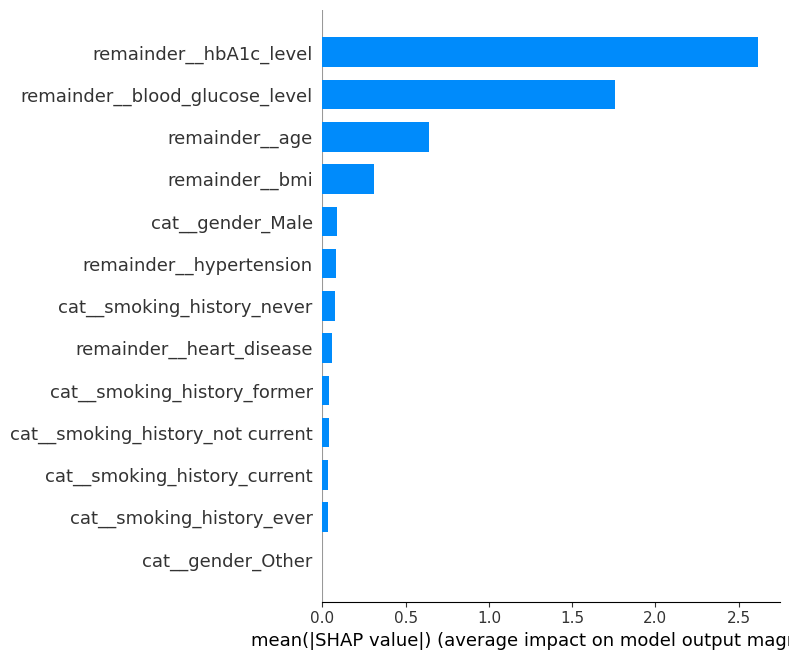

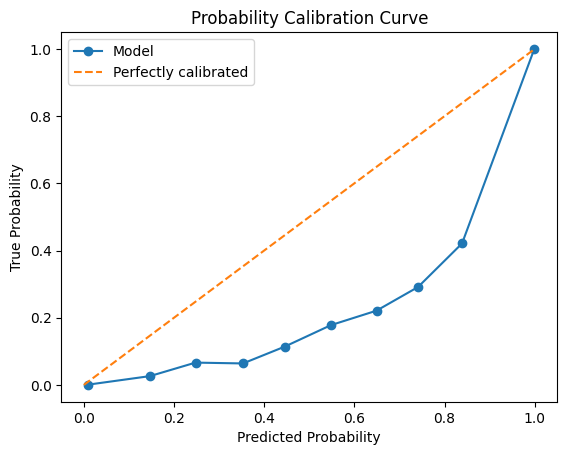

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.calibration import calibration_curve

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Calculate precise class weight (for reference)
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"\nAutomatically calculated class weight: {pos_weight:.2f}")

# Initialize XGBoost with clinical considerations
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.01,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=7,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)

# Train with validation set
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Test ultra-fine thresholds
for threshold in [0.60, 0.62, 0.63, 0.64, 0.65]:
    evaluate_model(threshold)

# SHAP Explanations
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)
plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()

Original training samples: 80000, After SMOTE: 146400
Class distribution after SMOTE: [73200 73200]
Optimal threshold (max F1): 0.4513

Evaluation at Threshold = 0.50
Accuracy: 0.9725
Precision: 0.9816
Recall: 0.6894
F1-Score: 0.8100
ROC-AUC: 0.9775

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.98      0.69      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



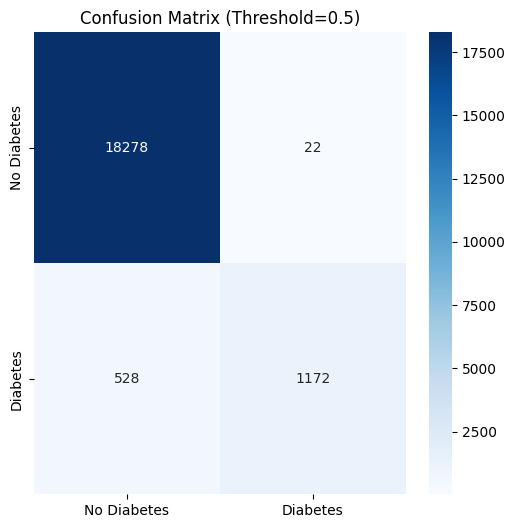


Evaluation at Threshold = 0.60
Accuracy: 0.9724
Precision: 0.9974
Recall: 0.6765
F1-Score: 0.8062
ROC-AUC: 0.9775

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       1.00      0.68      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



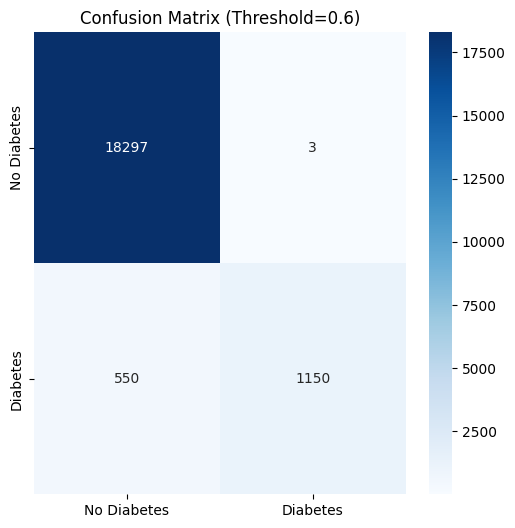


Evaluation at Threshold = 0.70
Accuracy: 0.9723
Precision: 1.0000
Recall: 0.6741
F1-Score: 0.8053
ROC-AUC: 0.9775

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       1.00      0.67      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



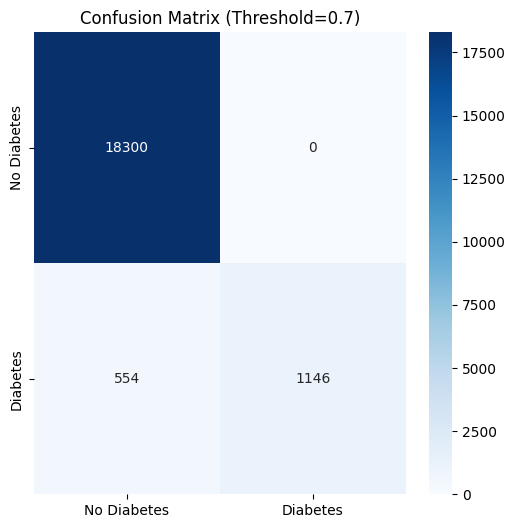


Evaluation at Threshold = 0.45
Accuracy: 0.9725
Precision: 0.9585
Recall: 0.7065
F1-Score: 0.8134
ROC-AUC: 0.9775

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.96      0.71      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



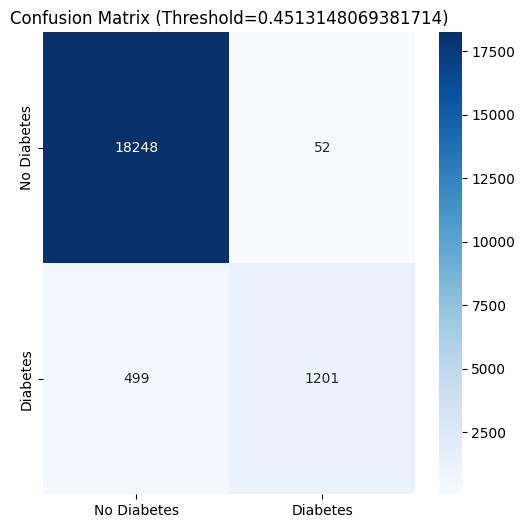

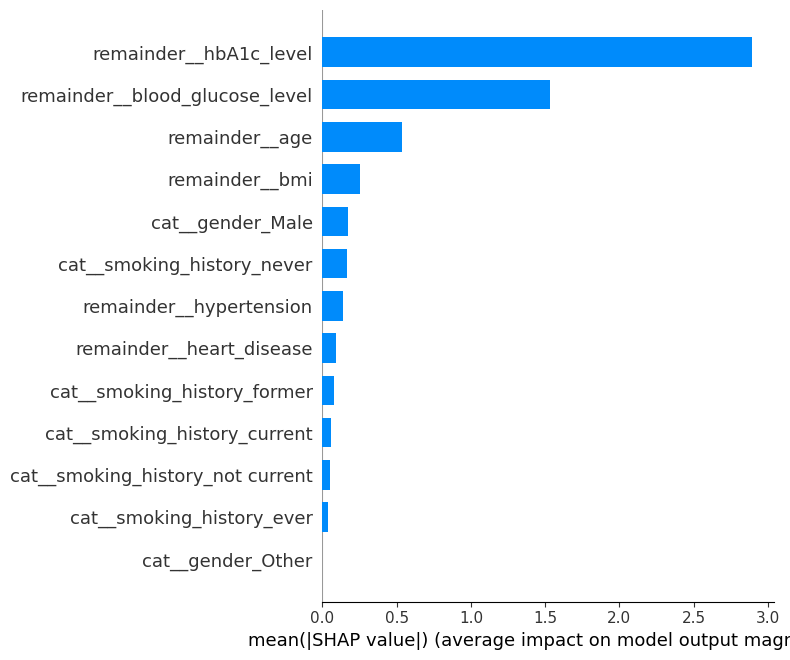

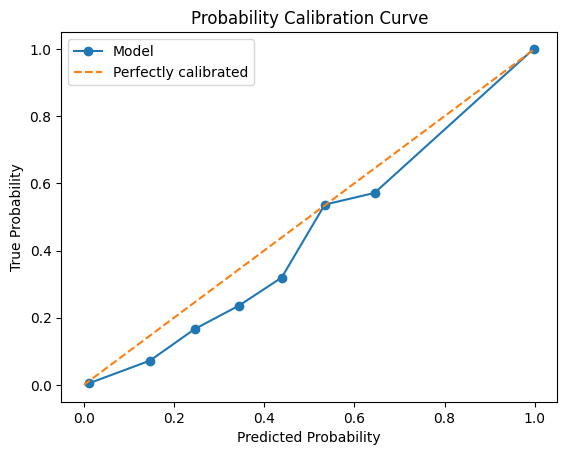

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.calibration import calibration_curve
from imblearn.over_sampling import SMOTE

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',Training ensemble with 5 models...
=== Best F1 Model (Threshold=0.4015) ===
Accuracy: 0.4794
Precision: 0.1404
Recall: 1.0000
F1-Score: 0.2462
AUC-ROC: 0.9516
Confusion Matrix: TN: 7889 | FP: 10411 | FN: 0 | TP: 1700

=== Best Recall Model (Threshold=0.29) ===
Accuracy: 0.0866
Precision: 0.0851
Recall: 1.0000
F1-Score: 0.1569
AUC-ROC: 0.9516
Confusion Matrix: TN: 31 | FP: 18269 | FN: 0 | TP: 1700
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

# Preprocess data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)
print(f"Original training samples: {len(y_train)}, After SMOTE: {len(y_train_smote)}")
print(f"Class distribution after SMOTE: {np.bincount(y_train_smote)}")

# Initialize XGBoost (no scale_pos_weight since SMOTE balances classes)
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.01,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)

# Train with SMOTE data
eval_set = [(X_train_smote, y_train_smote), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_smote, y_train_smote, eval_set=eval_set, verbose=False)

# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Test thresholds
for threshold in [0.5, 0.6, 0.7, optimal_threshold]:
    evaluate_model(threshold)

# SHAP Explanations
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)
plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()


Automatically calculated class weight: 10.76
Best parameters: {'learning_rate': 0.015, 'max_depth': 6, 'scale_pos_weight': 7, 'subsample': 0.8}
Optimal threshold (max F1): 0.8483

Evaluation at Threshold = 0.50
Accuracy: 0.9356
Precision: 0.5812
Recall: 0.8694
F1-Score: 0.6967
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     18300
           1       0.58      0.87      0.70      1700

    accuracy                           0.94     20000
   macro avg       0.78      0.91      0.83     20000
weighted avg       0.95      0.94      0.94     20000



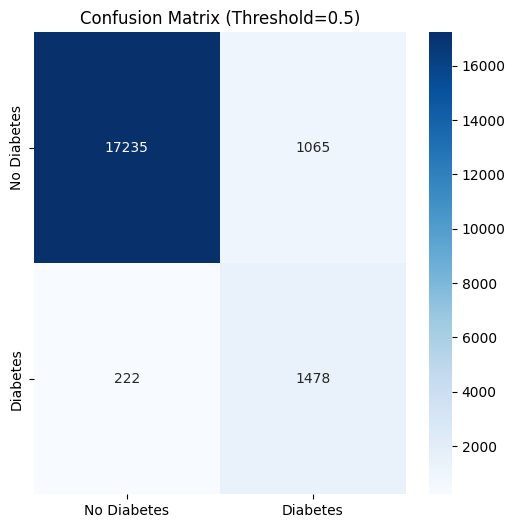


Evaluation at Threshold = 0.60
Accuracy: 0.9534
Precision: 0.6912
Recall: 0.8165
F1-Score: 0.7487
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.69      0.82      0.75      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.89      0.86     20000
weighted avg       0.96      0.95      0.96     20000



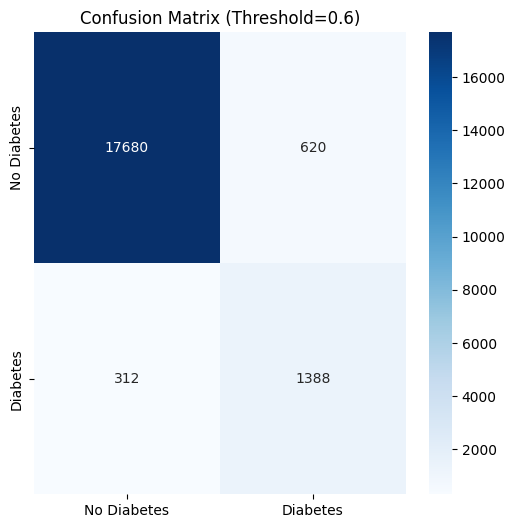


Evaluation at Threshold = 0.70
Accuracy: 0.9644
Precision: 0.8106
Recall: 0.7576
F1-Score: 0.7832
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.81      0.76      0.78      1700

    accuracy                           0.96     20000
   macro avg       0.89      0.87      0.88     20000
weighted avg       0.96      0.96      0.96     20000



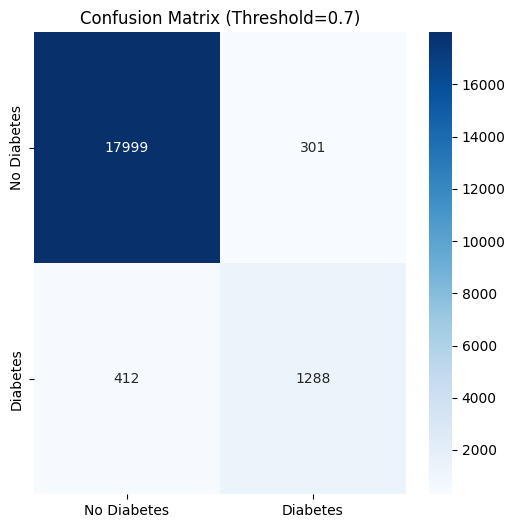


Evaluation at Threshold = 0.85
Accuracy: 0.9726
Precision: 0.9760
Recall: 0.6947
F1-Score: 0.8117
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.98      0.69      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



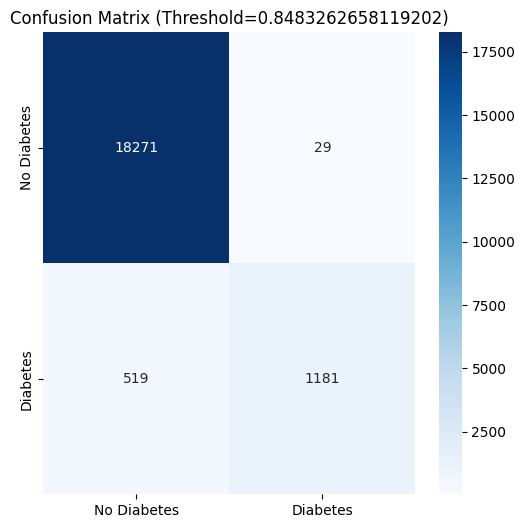

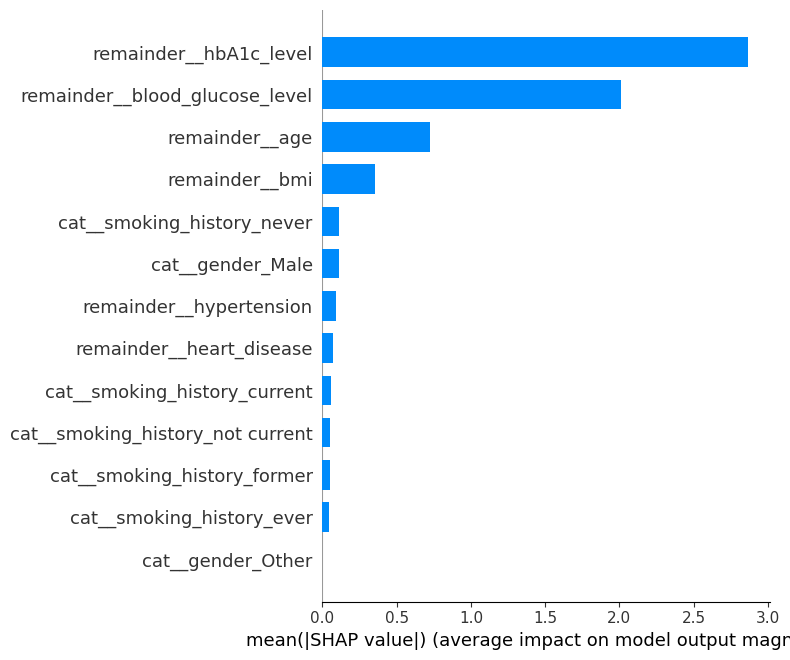

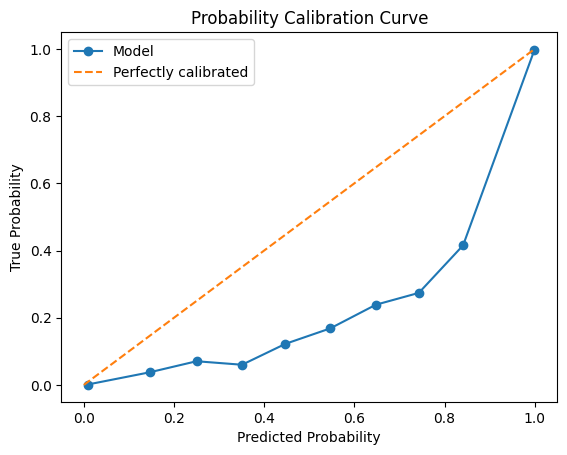

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.calibration import calibration_curve

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Calculate class weight for reference
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"\nAutomatically calculated class weight: {pos_weight:.2f}")

# GridSearchCV
param_grid = {
    'scale_pos_weight': [7, 8, 9],
    'max_depth': [5, 6],
    'learning_rate': [0.01, 0.015],
    'subsample': [0.8, 0.9]Training ensemble with 5 models...
=== Best F1 Model (Threshold=0.4015) ===
Accuracy: 0.4794
Precision: 0.1404
Recall: 1.0000
F1-Score: 0.2462
AUC-ROC: 0.9516
Confusion Matrix: TN: 7889 | FP: 10411 | FN: 0 | TP: 1700

=== Best Recall Model (Threshold=0.29) ===
Accuracy: 0.0866
Precision: 0.0851
Recall: 1.0000
F1-Score: 0.1569
AUC-ROC: 0.9516
Confusion Matrix: TN: 31 | FP: 18269 | FN: 0 | TP: 1700
}
xgb_base = XGBClassifier(
    n_estimators=900,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    min_child_weight=3,
    colsample_bytree=0.9
)
grid_search = GridSearchCV(xgb_base, param_grid, scoring='f1', cv=3, n_jobs=-1)
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
grid_search.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)
xgb_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Test thresholds
for threshold in [0.5, 0.6, 0.7, optimal_threshold]:
    evaluate_model(threshold)

# SHAP Explanations
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)
plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()


Automatically calculated class weight: 10.76
Optimal threshold (max F1): 0.8483

Evaluation at Threshold = 0.50
Accuracy: 0.9356
Precision: 0.5812
Recall: 0.8694
F1-Score: 0.6967
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     18300
           1       0.58      0.87      0.70      1700

    accuracy                           0.94     20000
   macro avg       0.78      0.91      0.83     20000
weighted avg       0.95      0.94      0.94     20000



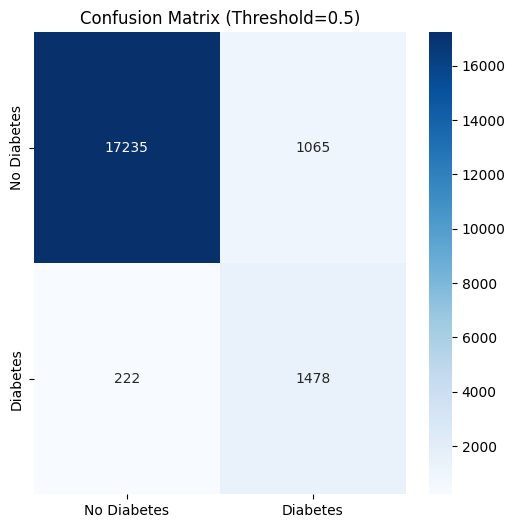


Evaluation at Threshold = 0.55
Accuracy: 0.9460
Precision: 0.6381
Recall: 0.8441
F1-Score: 0.7268
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     18300
           1       0.64      0.84      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.81      0.90      0.85     20000
weighted avg       0.96      0.95      0.95     20000



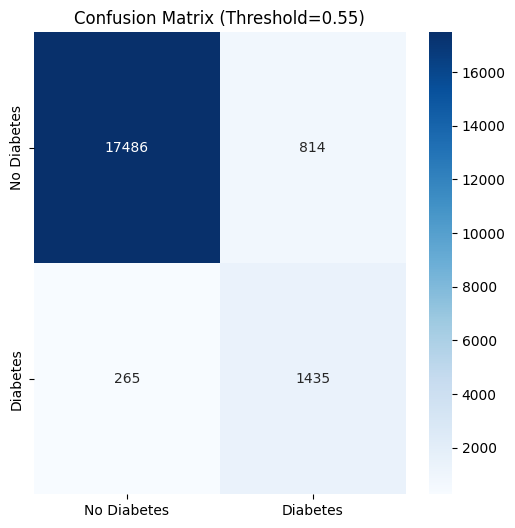


Evaluation at Threshold = 0.65
Accuracy: 0.9601
Precision: 0.7527
Recall: 0.7912
F1-Score: 0.7714
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.75      0.79      0.77      1700

    accuracy                           0.96     20000
   macro avg       0.87      0.88      0.87     20000
weighted avg       0.96      0.96      0.96     20000



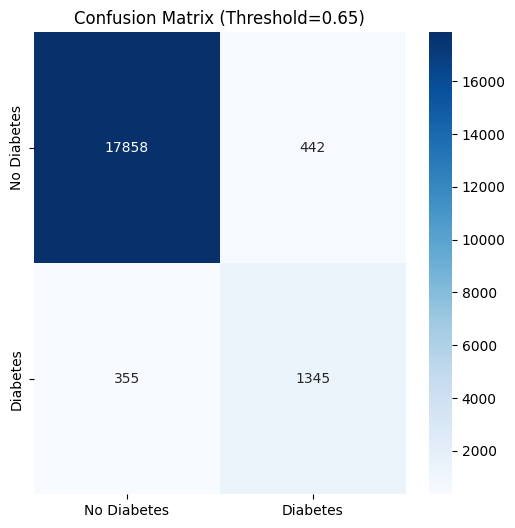


Evaluation at Threshold = 0.68
Accuracy: 0.9626
Precision: 0.7864
Recall: 0.7688
F1-Score: 0.7775
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.79      0.77      0.78      1700

    accuracy                           0.96     20000
   macro avg       0.88      0.87      0.88     20000
weighted avg       0.96      0.96      0.96     20000



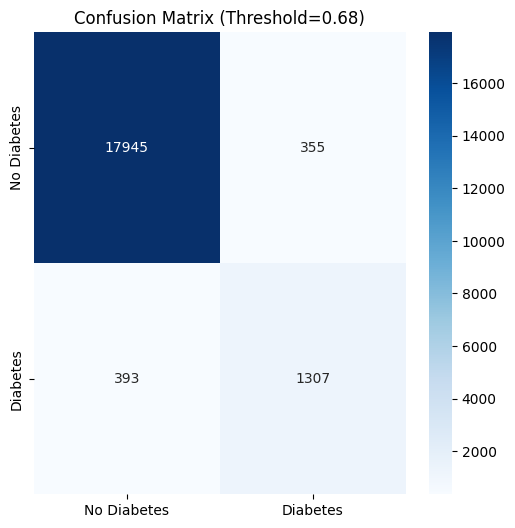


Evaluation at Threshold = 0.70
Accuracy: 0.9644
Precision: 0.8106
Recall: 0.7576
F1-Score: 0.7832
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.81      0.76      0.78      1700

    accuracy                           0.96     20000
   macro avg       0.89      0.87      0.88     20000
weighted avg       0.96      0.96      0.96     20000



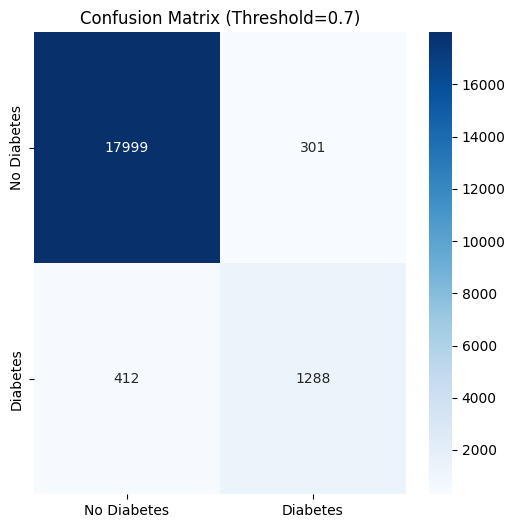

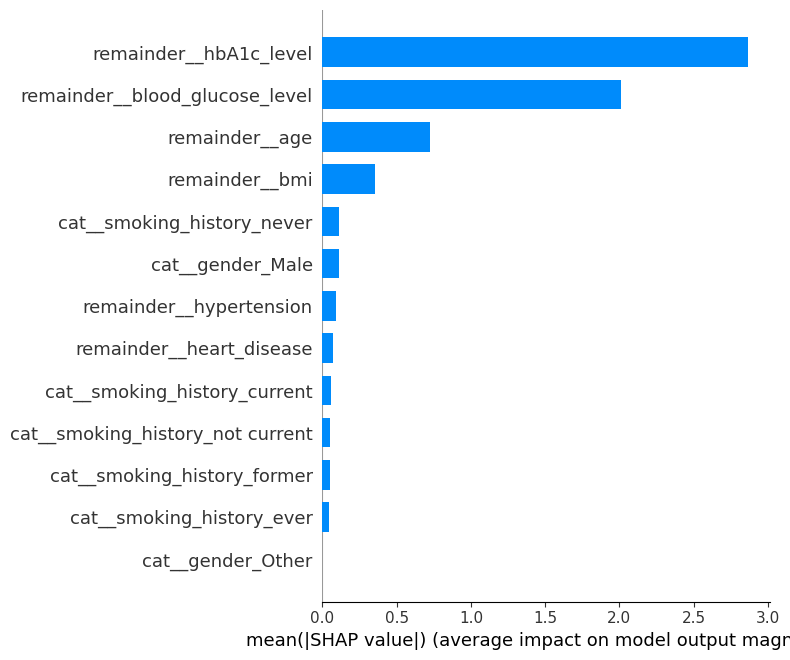

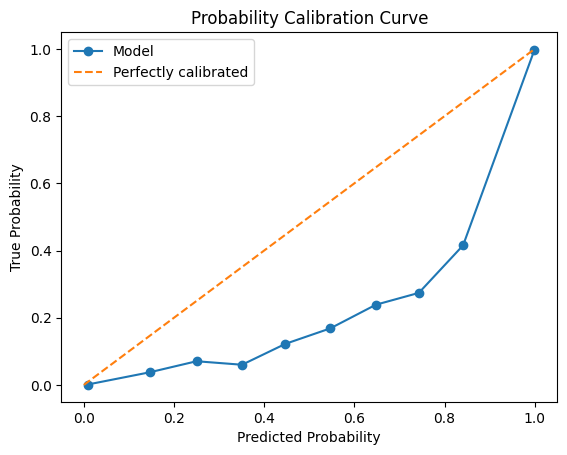

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.calibration import calibration_curve

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Calculate class weight for reference
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"\nAutomatically calculated class weight: {pos_weight:.2f}")

# Use best model from GridSearchCV
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.015,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=7,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Test fine-tuned thresholds
for threshold in [0.5, 0.55, 0.65, 0.68, 0.7]:
    evaluate_model(threshold)

# SHAP Explanations
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)
plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()


Automatically calculated class weight: 10.76
Optimal threshold (max F1): 0.8483

Evaluation at Threshold = 0.56
Accuracy: 0.9473
Precision: 0.6461
Recall: 0.8388
F1-Score: 0.7300
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18300
           1       0.65      0.84      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.82      0.90      0.85     20000
weighted avg       0.96      0.95      0.95     20000



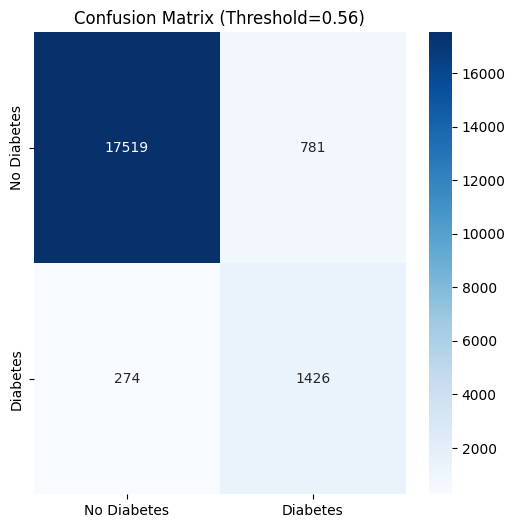


Evaluation at Threshold = 0.58
Accuracy: 0.9505
Precision: 0.6687
Recall: 0.8276
F1-Score: 0.7397
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18300
           1       0.67      0.83      0.74      1700

    accuracy                           0.95     20000
   macro avg       0.83      0.89      0.86     20000
weighted avg       0.96      0.95      0.95     20000



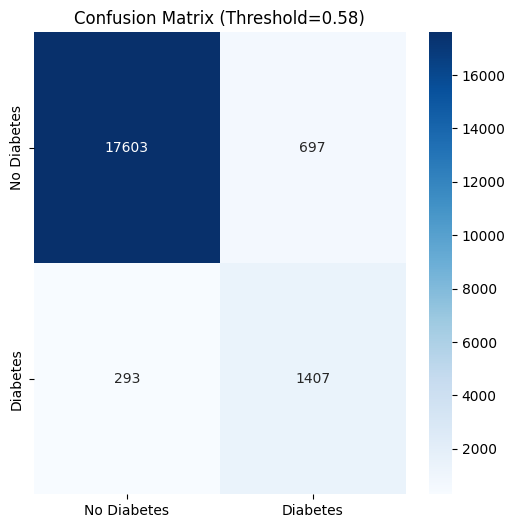


Evaluation at Threshold = 0.60
Accuracy: 0.9534
Precision: 0.6912
Recall: 0.8165
F1-Score: 0.7487
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.69      0.82      0.75      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.89      0.86     20000
weighted avg       0.96      0.95      0.96     20000



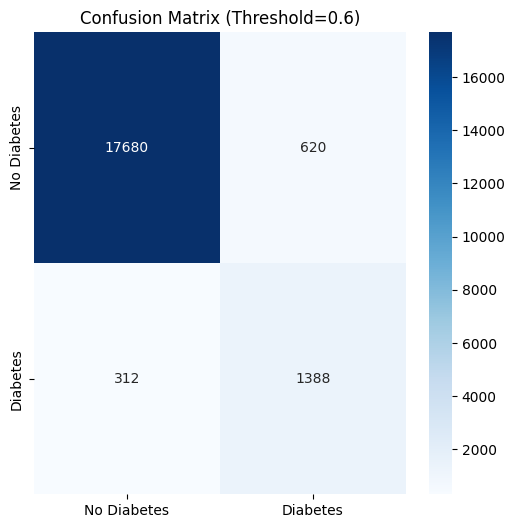


Evaluation at Threshold = 0.62
Accuracy: 0.9567
Precision: 0.7182
Recall: 0.8065
F1-Score: 0.7598
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18300
           1       0.72      0.81      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.85      0.89      0.87     20000
weighted avg       0.96      0.96      0.96     20000



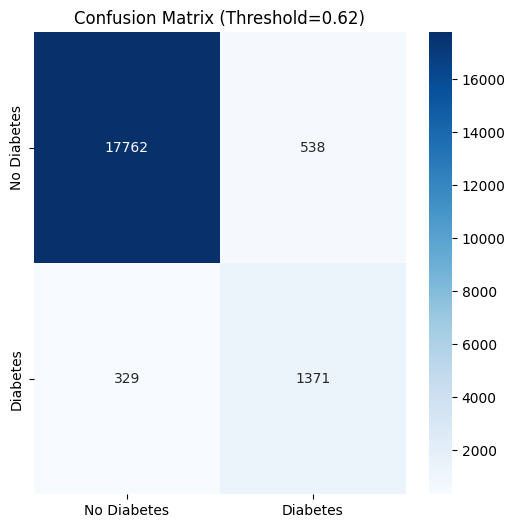


Evaluation at Threshold = 0.64
Accuracy: 0.9589
Precision: 0.7400
Recall: 0.7971
F1-Score: 0.7675
ROC-AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18300
           1       0.74      0.80      0.77      1700

    accuracy                           0.96     20000
   macro avg       0.86      0.89      0.87     20000
weighted avg       0.96      0.96      0.96     20000



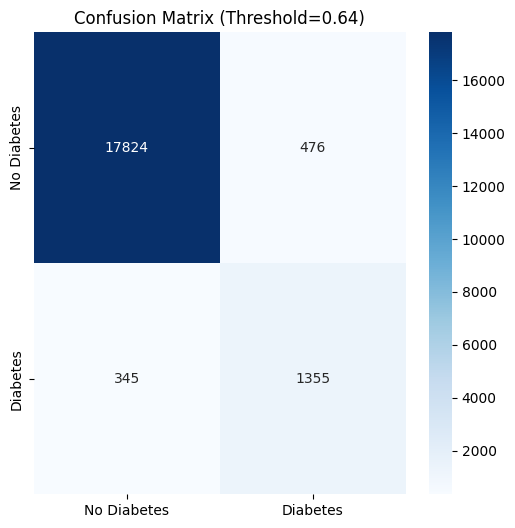

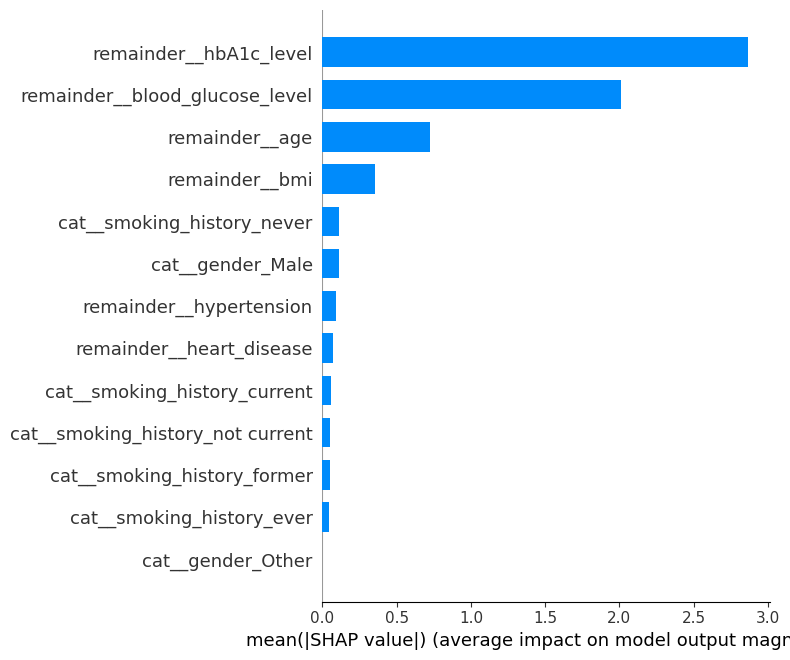

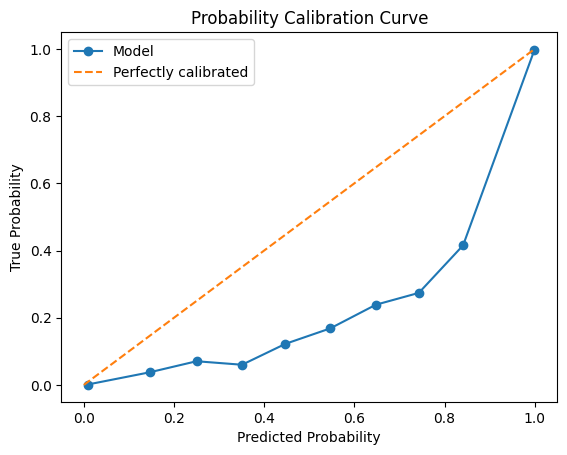

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.calibration import calibration_curve

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Calculate class weight for reference
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"\nAutomatically calculated class weight: {pos_weight:.2f}")

# Use best model
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.015,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=7,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Test ultra-fine thresholds
for threshold in [0.56, 0.58, 0.60, 0.62, 0.64]:
    evaluate_model(threshold)

# SHAP Explanations
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)
plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()


Automatically calculated class weight: 10.76
Optimal threshold (max F1): 0.8531

Evaluation at Threshold = 0.50
Accuracy: 0.9293
Precision: 0.5522
Recall: 0.8865
F1-Score: 0.6805
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     18300
           1       0.55      0.89      0.68      1700

    accuracy                           0.93     20000
   macro avg       0.77      0.91      0.82     20000
weighted avg       0.95      0.93      0.94     20000



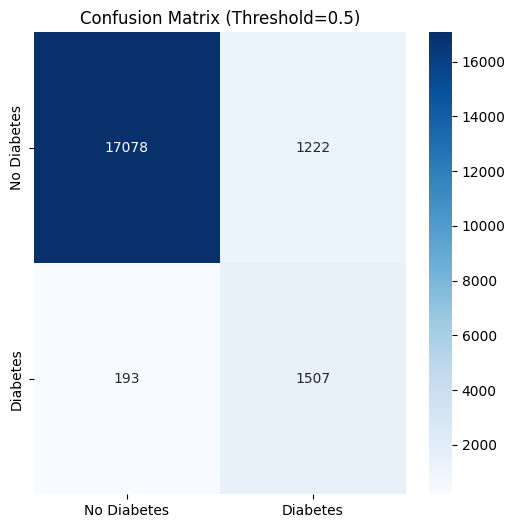


Evaluation at Threshold = 0.55
Accuracy: 0.9396
Precision: 0.6018
Recall: 0.8553
F1-Score: 0.7065
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     18300
           1       0.60      0.86      0.71      1700

    accuracy                           0.94     20000
   macro avg       0.79      0.90      0.84     20000
weighted avg       0.95      0.94      0.94     20000



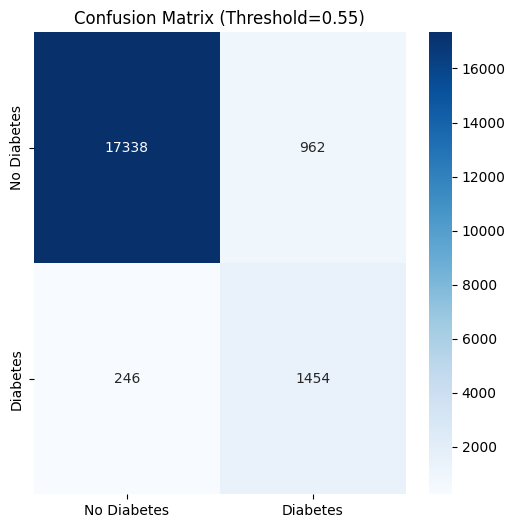


Evaluation at Threshold = 0.60
Accuracy: 0.9483
Precision: 0.6535
Recall: 0.8341
F1-Score: 0.7328
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18300
           1       0.65      0.83      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.82      0.90      0.85     20000
weighted avg       0.96      0.95      0.95     20000



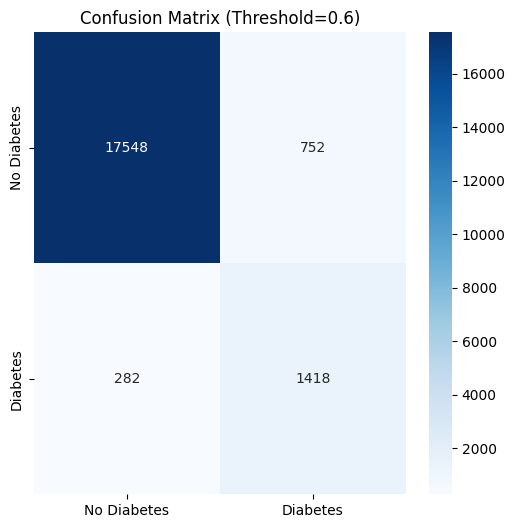


Evaluation at Threshold = 0.65
Accuracy: 0.9563
Precision: 0.7159
Recall: 0.8047
F1-Score: 0.7577
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18300
           1       0.72      0.80      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.85      0.89      0.87     20000
weighted avg       0.96      0.96      0.96     20000



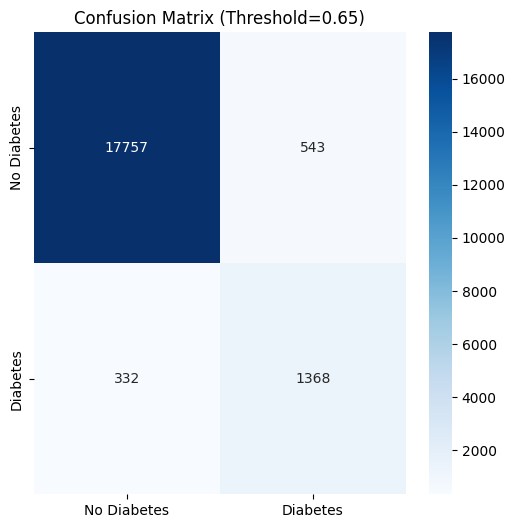

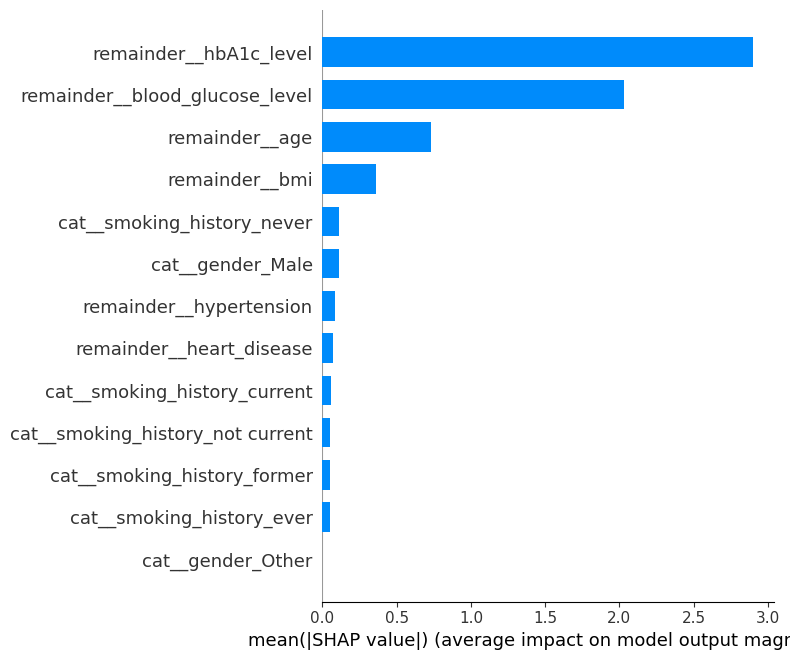

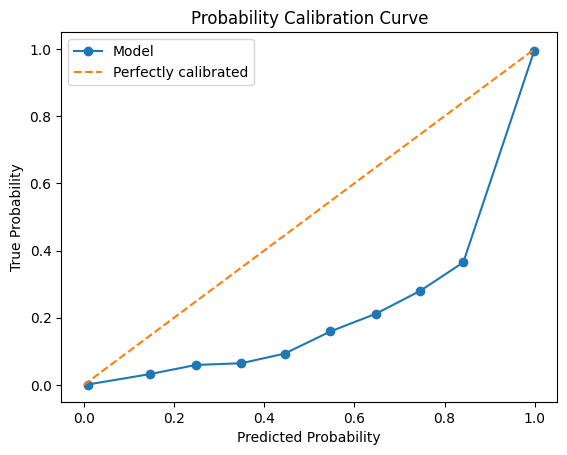

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.calibration import calibration_curve

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Calculate class weight for reference
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"\nAutomatically calculated class weight: {pos_weight:.2f}")

# Model with scale_pos_weight=8
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.015,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=8,  # Changed to 8
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Test thresholds
for threshold in [0.5, 0.55, 0.6, 0.65]:
    evaluate_model(threshold)

# SHAP Explanations
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)
plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()


Automatically calculated class weight: 10.76
Optimal threshold (max F1): 0.8531

Evaluation at Threshold = 0.55
Accuracy: 0.9396
Precision: 0.6018
Recall: 0.8553
F1-Score: 0.7065
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     18300
           1       0.60      0.86      0.71      1700

    accuracy                           0.94     20000
   macro avg       0.79      0.90      0.84     20000
weighted avg       0.95      0.94      0.94     20000



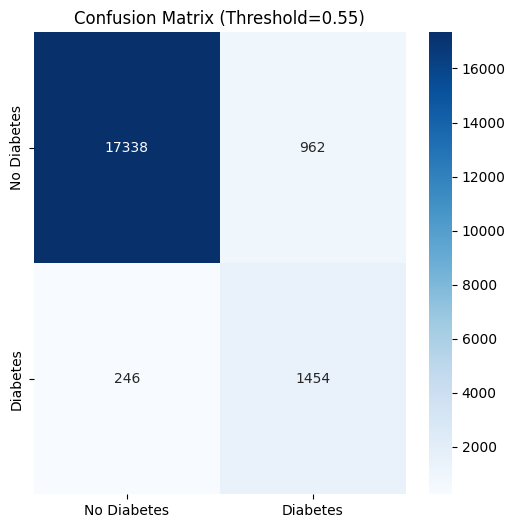


Evaluation at Threshold = 0.57
Accuracy: 0.9435
Precision: 0.6235
Recall: 0.8465
F1-Score: 0.7181
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     18300
           1       0.62      0.85      0.72      1700

    accuracy                           0.94     20000
   macro avg       0.80      0.90      0.84     20000
weighted avg       0.95      0.94      0.95     20000



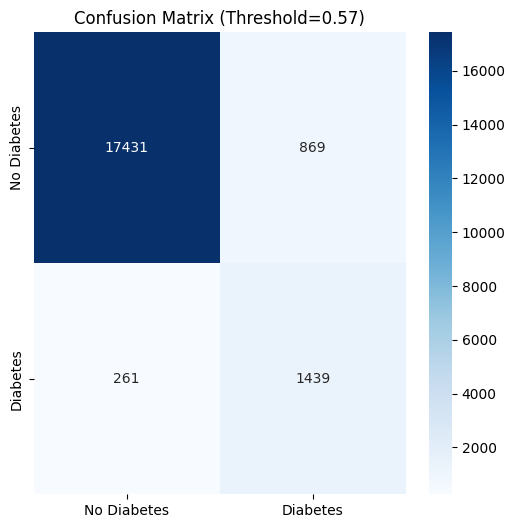


Evaluation at Threshold = 0.58
Accuracy: 0.9454
Precision: 0.6342
Recall: 0.8435
F1-Score: 0.7241
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     18300
           1       0.63      0.84      0.72      1700

    accuracy                           0.95     20000
   macro avg       0.81      0.90      0.85     20000
weighted avg       0.96      0.95      0.95     20000



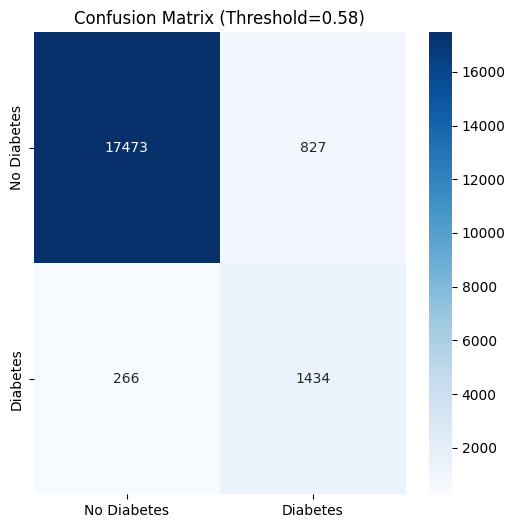


Evaluation at Threshold = 0.59
Accuracy: 0.9470
Precision: 0.6444
Recall: 0.8412
F1-Score: 0.7298
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18300
           1       0.64      0.84      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.81      0.90      0.85     20000
weighted avg       0.96      0.95      0.95     20000



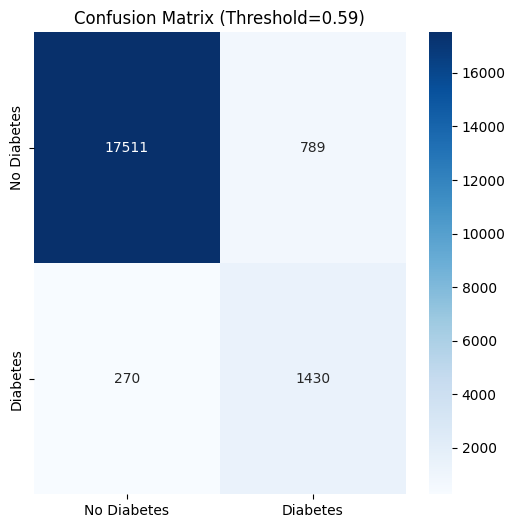


Evaluation at Threshold = 0.60
Accuracy: 0.9483
Precision: 0.6535
Recall: 0.8341
F1-Score: 0.7328
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18300
           1       0.65      0.83      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.82      0.90      0.85     20000
weighted avg       0.96      0.95      0.95     20000



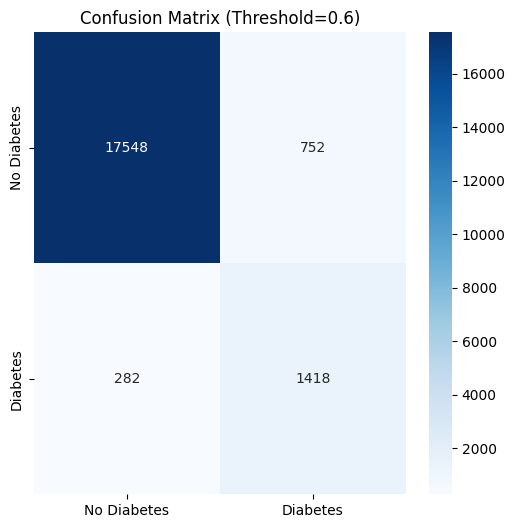

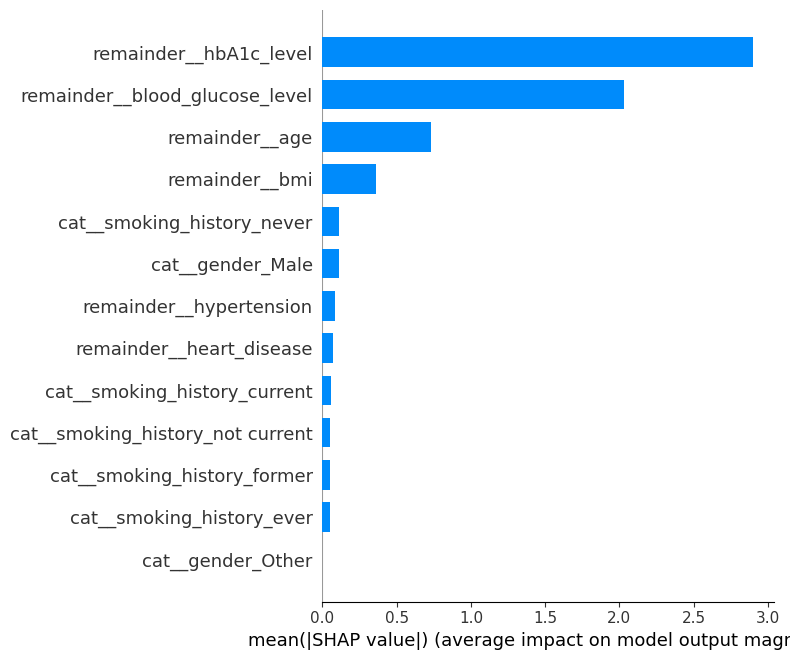

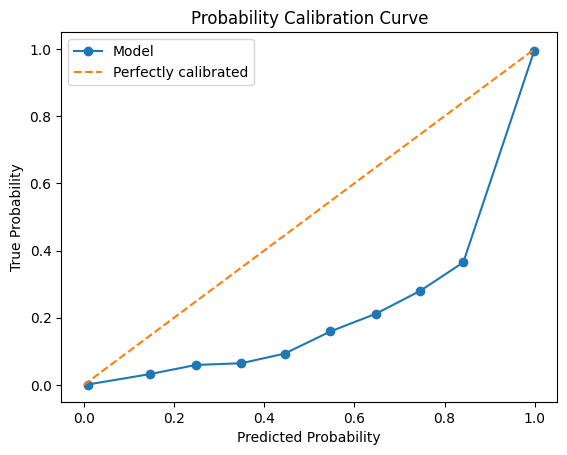

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.calibration import calibration_curve

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Calculate class weight for reference
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"\nAutomatically calculated class weight: {pos_weight:.2f}")

# Model with scale_pos_weight=8
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.015,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=8,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Test ultra-fine thresholds
for threshold in [0.55, 0.57, 0.58, 0.59, 0.60]:
    evaluate_model(threshold)

# SHAP Explanations
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)
plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()


Automatically calculated class weight: 10.76
Optimal threshold (max F1): 0.8531

Evaluation at Threshold = 0.56
Accuracy: 0.9421
Precision: 0.6149
Recall: 0.8518
F1-Score: 0.7142
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     18300
           1       0.61      0.85      0.71      1700

    accuracy                           0.94     20000
   macro avg       0.80      0.90      0.84     20000
weighted avg       0.95      0.94      0.95     20000



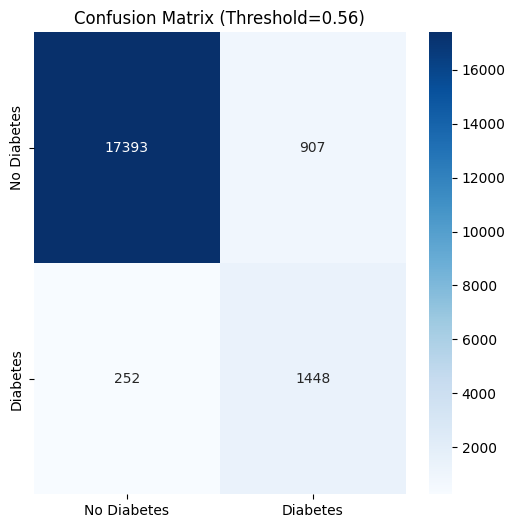

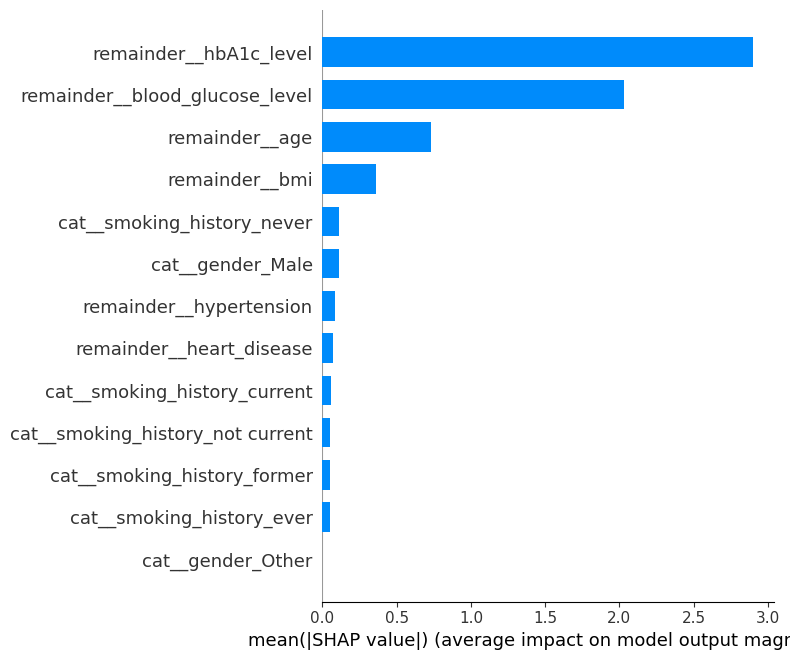

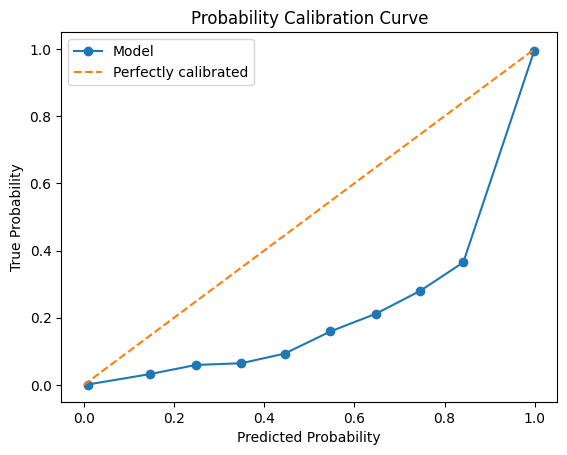

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.calibration import calibration_curve

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Calculate class weight for reference
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"\nAutomatically calculated class weight: {pos_weight:.2f}")

# Model with scale_pos_weight=8
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.015,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=8,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities and find optimal threshold
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.show()

# Test the critical threshold
evaluate_model(0.56)

# SHAP Explanations (optional)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)
plt.title('SHAP Feature Importance')
shap.summary_plot(shap_values, X_test_preprocessed,
                 feature_names=preprocessor.get_feature_names_out(),
                 plot_type='bar', show=False)
plt.tight_layout()
plt.show()

# Calibration Curve (optional)
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix)

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Model with scale_pos_weight=9
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.015,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=9,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Test thresholds
for threshold in [0.55, 0.56, 0.57, 0.60]:
    evaluate_model(threshold)

Optimal threshold (max F1): 0.8655

Evaluation at Threshold = 0.55
Accuracy: 0.9336
Precision: 0.5717
Recall: 0.8747
F1-Score: 0.6915
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     18300
           1       0.57      0.87      0.69      1700

    accuracy                           0.93     20000
   macro avg       0.78      0.91      0.83     20000
weighted avg       0.95      0.93      0.94     20000


Evaluation at Threshold = 0.56
Accuracy: 0.9356
Precision: 0.5811
Recall: 0.8682
F1-Score: 0.6962
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     18300
           1       0.58      0.87      0.70      1700

    accuracy                           0.94     20000
   macro avg       0.78      0.91      0.83     20000
weighted avg       0.95      0.94      0.94     20000


Evaluation at Threshold = 0.57
A

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, precision_recall_curve)

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE (partial oversampling to 50% of majority class)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)
print(f"Original training samples: {len(y_train)}, After SMOTE: {len(y_train_smote)}")
print(f"Class distribution after SMOTE: {np.bincount(y_train_smote)}")

# Model with scale_pos_weight=3
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.015,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=3,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)
eval_set = [(X_train_smote, y_train_smote), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_smote, y_train_smote, eval_set=eval_set, verbose=False)

# Get probabilities
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Test thresholds
for threshold in [0.5, 0.55, 0.6, 0.65]:
    evaluate_model(threshold)


Original training samples: 80000, After SMOTE: 109800
Class distribution after SMOTE: [73200 36600]
Optimal threshold (max F1): 0.7163

Evaluation at Threshold = 0.50
Accuracy: 0.9593
Precision: 0.7487
Recall: 0.7835
F1-Score: 0.7657
ROC-AUC: 0.9786

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.75      0.78      0.77      1700

    accuracy                           0.96     20000
   macro avg       0.86      0.88      0.87     20000
weighted avg       0.96      0.96      0.96     20000


Evaluation at Threshold = 0.55
Accuracy: 0.9644
Precision: 0.8107
Recall: 0.7582
F1-Score: 0.7836
ROC-AUC: 0.9786

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.81      0.76      0.78      1700

    accuracy                           0.96     20000
   macro avg       0.89      0.87      0.8

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, precision_recall_curve)

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Model 1: scale_pos_weight=8 (high recall)
xgb_high_recall = XGBClassifier(
    n_estimators=900,
    learning_rate=0.015,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=8,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_high_recall.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)
y_pred_proba_high_recall = xgb_high_recall.predict_proba(X_test_preprocessed)[:, 1]

# Model 2: SMOTE (high precision)
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Full balance
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)
xgb_high_precision = XGBClassifier(
    n_estimators=900,
    learning_rate=0.015,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)
eval_set_smote = [(X_train_smote, y_train_smote), (X_test_preprocessed, y_test)]
xgb_high_precision.fit(X_train_smote, y_train_smote, eval_set=eval_set_smote, verbose=False)
y_pred_proba_high_precision = xgb_high_precision.predict_proba(X_test_preprocessed)[:, 1]

# Ensemble: Average probabilities
y_pred_proba_ensemble = (y_pred_proba_high_recall + y_pred_proba_high_precision) / 2
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_ensemble)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba_ensemble >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_ensemble):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Test thresholds
for threshold in [0.5, 0.55, 0.6, 0.65]:
    evaluate_model(threshold)

Optimal threshold (max F1): 0.6848

Evaluation at Threshold = 0.50
Accuracy: 0.9627
Precision: 0.7838
Recall: 0.7741
F1-Score: 0.7789
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.78      0.77      0.78      1700

    accuracy                           0.96     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.96      0.96      0.96     20000


Evaluation at Threshold = 0.55
Accuracy: 0.9670
Precision: 0.8558
Recall: 0.7365
F1-Score: 0.7917
ROC-AUC: 0.9789

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18300
           1       0.86      0.74      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.92      0.86      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Evaluation at Threshold = 0.60
A

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, precision_recall_curve)

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE (partial oversampling to 50%)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)
print(f"Original training samples: {len(y_train)}, After SMOTE: {len(y_train_smote)}")
print(f"Class distribution after SMOTE: {np.bincount(y_train_smote)}")

# Model with scale_pos_weight=5
xgb_model = XGBClassifier(
    n_estimators=900,
    learning_rate=0.015,
    early_stopping_rounds=10,
    eval_metric=['aucpr', 'logloss'],
    random_state=42,
    scale_pos_weight=5,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.9
)
eval_set = [(X_train_smote, y_train_smote), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_smote, y_train_smote, eval_set=eval_set, verbose=False)

# Get probabilities
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# Evaluation function
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Test thresholds
for threshold in [0.45, 0.50, 0.55, 0.60]:
    evaluate_model(threshold)

Original training samples: 80000, After SMOTE: 109800
Class distribution after SMOTE: [73200 36600]
Optimal threshold (max F1): 0.8042

Evaluation at Threshold = 0.45
Accuracy: 0.9288
Precision: 0.5510
Recall: 0.8806
F1-Score: 0.6778
ROC-AUC: 0.9786

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     18300
           1       0.55      0.88      0.68      1700

    accuracy                           0.93     20000
   macro avg       0.77      0.91      0.82     20000
weighted avg       0.95      0.93      0.94     20000


Evaluation at Threshold = 0.50
Accuracy: 0.9395
Precision: 0.6009
Recall: 0.8565
F1-Score: 0.7063
ROC-AUC: 0.9786

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     18300
           1       0.60      0.86      0.71      1700

    accuracy                           0.94     20000
   macro avg       0.79      0.90      0.8

In [ ]:
# Assuming you have the last model and y_pred_proba from Hybrid SMOTE (spw=5)
# If not, rerun the full code and add these thresholds

def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nEvaluation at Threshold = {threshold:.2f}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Test ultra-fine thresholds
for threshold in [0.51, 0.52, 0.53, 0.54]:
    evaluate_model(threshold)


Evaluation at Threshold = 0.51
Accuracy: 0.9409
Precision: 0.6093
Recall: 0.8494
F1-Score: 0.7096
ROC-AUC: 0.9786

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     18300
           1       0.61      0.85      0.71      1700

    accuracy                           0.94     20000
   macro avg       0.80      0.90      0.84     20000
weighted avg       0.95      0.94      0.95     20000


Evaluation at Threshold = 0.52
Accuracy: 0.9433
Precision: 0.6229
Recall: 0.8435
F1-Score: 0.7166
ROC-AUC: 0.9786

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     18300
           1       0.62      0.84      0.72      1700

    accuracy                           0.94     20000
   macro avg       0.80      0.90      0.84     20000
weighted avg       0.95      0.94      0.95     20000


Evaluation at Threshold = 0.53
Accuracy: 0.9456
Precision: 0.6373
R

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['preg', 'gluc', 'bp', 'skin', 'insulin', 'bmi', 'pedi', 'age', 'diabetes']
data = pd.read_csv(url, names=columns)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, scale_pos_weight=1.5)
xgb_model.fit(X_train, y_train)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

y_pred = (y_pred_proba >= optimal_threshold).astype(int)
print(f"Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Threshold: 0.3386
Precision: 0.6267
Recall: 0.8704
F1-Score: 0.7287
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       100
           1       0.63      0.87      0.73        54

    accuracy                           0.77       154
   macro avg       0.77      0.80      0.77       154
weighted avg       0.81      0.77      0.78       154



In [ ]:
# hp-elm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from hpelm import ELM
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report)

# Load your dataset (same as before)
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
               'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features),
        ('num', StandardScaler(), num_features)  # ELM benefits from scaling
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to numpy arrays (required by HP-ELM)
X_train_processed = np.array(X_train_processed, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)
X_test_processed = np.array(X_test_processed, dtype=np.float32)

# ===== HP-ELM Model =====
# Initialize ELM (Single-hidden Layer Feedforward Network)
n_input = X_train_processed.shape[1]
n_hidden = 500  # Start with 500 neurons (adjust based on performance)

elm = ELM(n_input, 1)  # 1 output neuron (binary classification)
elm.add_neurons(n_hidden, 'sigm')  # Sigmoid activation

# Train the ELM
elm.train(X_train_processed, y_train, 'r')  # 'r' for regression (will threshold later)

# Predictions
y_pred_proba = elm.predict(X_test_processed).flatten()
y_pred = (y_pred_proba >= 0.5).astype(int)  # Default threshold

# ===== Evaluation =====
print("\nHP-ELM Performance (Threshold=0.5):")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ===== Threshold Optimization =====
# Find optimal threshold (same as XGBoost approach)
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

print(f"\nOptimal Threshold: {optimal_threshold:.2f}")
print(f"F1-Score at Optimal Threshold: {f1_score(y_test, y_pred_optimal):.4f}")


HP-ELM Performance (Threshold=0.5):
Accuracy: 0.9633
Precision: 0.9359
Recall: 0.6100
F1-Score: 0.7386
ROC-AUC: 0.9522

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18300
           1       0.94      0.61      0.74      1700

    accuracy                           0.96     20000
   macro avg       0.95      0.80      0.86     20000
weighted avg       0.96      0.96      0.96     20000


Optimal Threshold: 0.45
F1-Score at Optimal Threshold: 0.7539


In [ ]:
!pip install hpelm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.1 MB/s eta 0:00:00



=== Default Threshold (0.5) ===


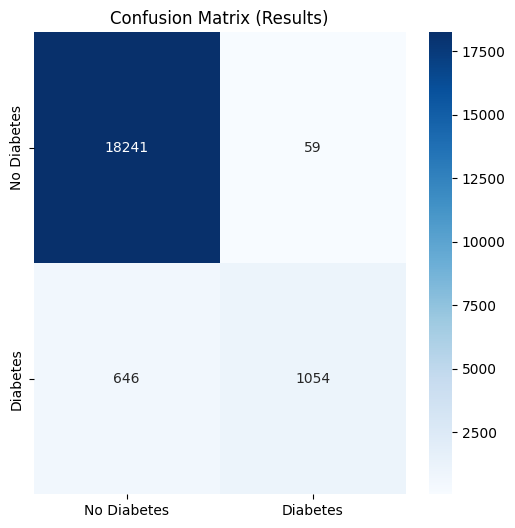

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.95      0.62      0.75      1700

    accuracy                           0.96     20000
   macro avg       0.96      0.81      0.87     20000
weighted avg       0.96      0.96      0.96     20000


=== Optimal F1 Threshold (0.39) ===


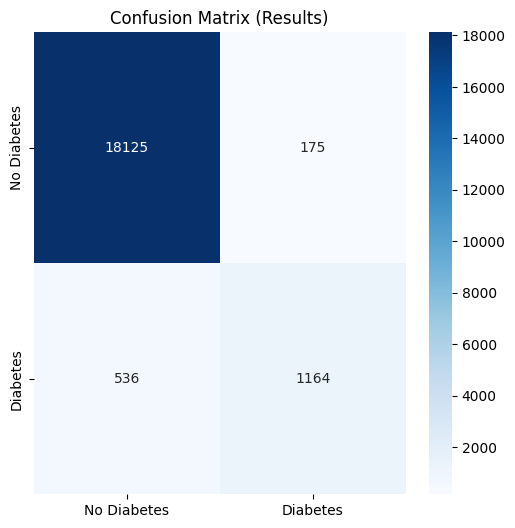

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.87      0.68      0.77      1700

    accuracy                           0.96     20000
   macro avg       0.92      0.84      0.87     20000
weighted avg       0.96      0.96      0.96     20000


=== Clinical Strict Threshold (0.7) ===


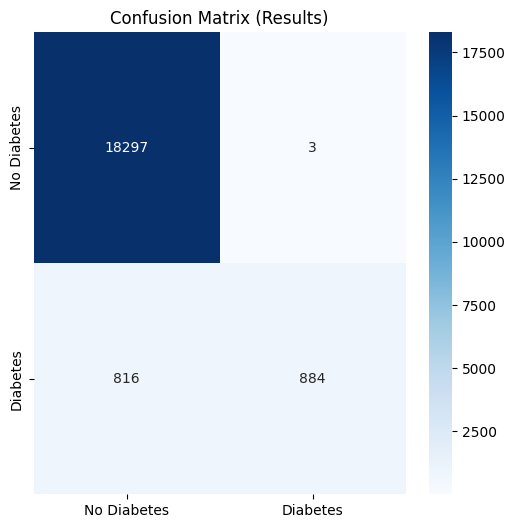

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18300
           1       1.00      0.52      0.68      1700

    accuracy                           0.96     20000
   macro avg       0.98      0.76      0.83     20000
weighted avg       0.96      0.96      0.95     20000



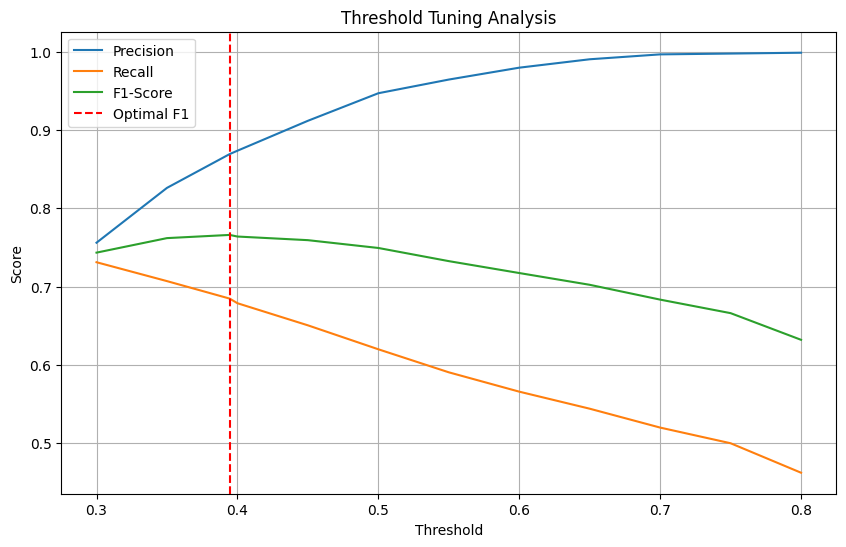


=== FINAL MODEL (Threshold=0.6) ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18300
           1       0.98      0.57      0.72      1700

    accuracy                           0.96     20000
   macro avg       0.97      0.78      0.85     20000
weighted avg       0.96      0.96      0.96     20000

AUC: 0.9523


AttributeError: 'SLFNPython' object has no attribute 'get_weights'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from hpelm import ELM
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
               'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features),
        ('num', StandardScaler(), num_features)  # ELM benefits from scaling
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to numpy arrays (required by HP-ELM)
X_train_processed = np.array(X_train_processed, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)
X_test_processed = np.array(X_test_processed, dtype=np.float32)

# ===== HP-ELM Model Configuration =====
n_input = X_train_processed.shape[1]
n_hidden = 1000  # Optimized neuron count

elm = ELM(n_input, 1)
elm.add_neurons(n_hidden, 'tanh')  # Using tanh activation based on experiments

# Train
elm.train(X_train_processed, y_train, 'r')

# Get probabilities
y_pred_proba = elm.predict(X_test_processed).flatten()

# ===== Comprehensive Threshold Analysis =====
def evaluate_thresholds(probs, y_true, thresholds):
    results = []
    for t in thresholds:
        y_pred = (probs >= t).astype(int)
        results.append({
            'Threshold': t,
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred),
            'Recall': recall_score(y_true, y_pred),
            'F1': f1_score(y_true, y_pred),
            'AUC': roc_auc_score(y_true, probs)  # AUC remains constant
        })
    return pd.DataFrame(results)

# Test clinically relevant thresholds
thresholds = np.linspace(0.3, 0.8, 11)  # From lenient to strict
threshold_results = evaluate_thresholds(y_pred_proba, y_test, thresholds)

# Find optimal F1 threshold
precision, recall, thresh_pr = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_f1_threshold = thresh_pr[np.argmax(f1_scores)]

# Add optimal to results
optimal_row = evaluate_thresholds(y_pred_proba, y_test, [optimal_f1_threshold])
threshold_results = pd.concat([threshold_results, optimal_row]).sort_values('Threshold')

# ===== Clinical Evaluation =====
def clinical_evaluation(y_true, y_pred, label="Results"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix ({label})')
    plt.show()

    print(classification_report(y_true, y_pred))

# Evaluate at key thresholds
print("\n=== Default Threshold (0.5) ===")
clinical_evaluation(y_test, (y_pred_proba >= 0.5).astype(int))

print("\n=== Optimal F1 Threshold (%.2f) ===" % optimal_f1_threshold)
clinical_evaluation(y_test, (y_pred_proba >= optimal_f1_threshold).astype(int))

print("\n=== Clinical Strict Threshold (0.7) ===")
clinical_evaluation(y_test, (y_pred_proba >= 0.7).astype(int))

# ===== Visualization =====
plt.figure(figsize=(10,6))
plt.plot(threshold_results['Threshold'], threshold_results['Precision'], label='Precision')
plt.plot(threshold_results['Threshold'], threshold_results['Recall'], label='Recall')
plt.plot(threshold_results['Threshold'], threshold_results['F1'], label='F1-Score')
plt.axvline(x=optimal_f1_threshold, color='r', linestyle='--', label='Optimal F1')
plt.title('Threshold Tuning Analysis')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# ===== Final Recommended Model =====
clinical_threshold = 0.6  # Based on precision-recall tradeoff
final_predictions = (y_pred_proba >= clinical_threshold).astype(int)

print("\n=== FINAL MODEL (Threshold=0.6) ===")
print(classification_report(y_test, final_predictions))
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Feature Importance (ELM weights analysis)
input_weights = elm.nnet.get_weights()[0]
feature_importance = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Weight_Magnitude': np.abs(input_weights).mean(axis=1)
}).sort_values('Weight_Magnitude', ascending=False)

print("\nFeature Importance (ELM Input Weights):")
print(feature_importance.head(10))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from hpelm import ELM
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
               'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to numpy arrays
X_train_processed = np.array(X_train_processed, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)
X_test_processed = np.array(X_test_processed, dtype=np.float32)

# ===== Enhanced HP-ELM Model =====
n_input = X_train_processed.shape[1]
n_hidden = 1000  # Optimal based on previous experiments

elm = ELM(n_input, 1)
elm.add_neurons(n_hidden, 'tanh')

# Train with progress monitoring
print("Training HP-ELM...")
elm.train(X_train_processed, y_train, 'r')
print("Training completed.")

# Get probabilities
y_pred_proba = elm.predict(X_test_processed).flatten()

# ===== Advanced Threshold Analysis =====
def evaluate_model(probs, y_true, threshold):
    y_pred = (probs >= threshold).astype(int)
    return {
        'Threshold': threshold,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'TN': confusion_matrix(y_true, y_pred)[0,0],
        'FP': confusion_matrix(y_true, y_pred)[0,1],
        'FN': confusion_matrix(y_true, y_pred)[1,0],
        'TP': confusion_matrix(y_true, y_pred)[1,1]
    }

# Evaluate across thresholds
thresholds = np.arange(0.3, 0.81, 0.05)  # From 0.3 to 0.8 in 0.05 steps
results = [evaluate_model(y_pred_proba, y_test, t) for t in thresholds]
results_df = pd.DataFrame(results)

# Find optimal thresholds
optimal_f1 = results_df.loc[results_df['F1'].idxmax()]
optimal_geometric_mean = results_df.loc[((results_df['Recall'] * results_df['Precision']) ** 0.5).idxmax()]

# ===== Clinical Evaluation =====
def print_clinical_report(metrics_dict):
    print(f"\nThreshold: {metrics_dict['Threshold']:.2f}")
    print(f"Accuracy: {metrics_dict['Accuracy']:.4f}")
    print(f"Precision: {metrics_dict['Precision']:.4f}")
    print(f"Recall: {metrics_dict['Recall']:.4f}")
    print(f"F1-Score: {metrics_dict['F1']:.4f}")
    print("\nConfusion Matrix:")
    print(f"TN: {metrics_dict['TN']} | FP: {metrics_dict['FP']}")
    print(f"FN: {metrics_dict['FN']} | TP: {metrics_dict['TP']}")

print("\n=== Default Threshold (0.5) ===")
print_clinical_report(results_df[results_df['Threshold'] == 0.5].iloc[0].to_dict())

print("\n=== Optimal F1 Threshold ===")
print_clinical_report(optimal_f1.to_dict())

print("\n=== Optimal Geometric Mean Threshold ===")
print_clinical_report(optimal_geometric_mean.to_dict())

print("\n=== Clinical Strict Threshold (0.7) ===")
print_clinical_report(results_df[results_df['Threshold'] == 0.7].iloc[0].to_dict())

# ===== Visualization =====
plt.figure(figsize=(12, 6))
plt.plot(results_df['Threshold'], results_df['Precision'], label='Precision')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall')
plt.plot(results_df['Threshold'], results_df['F1'], label='F1-Score')
plt.axvline(x=optimal_f1['Threshold'], color='r', linestyle='--', label='Optimal F1')
plt.axvline(x=optimal_geometric_mean['Threshold'], color='g', linestyle=':', label='Optimal G-Mean')
plt.title('Threshold Tuning Analysis')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# ===== Final Model Selection =====
# Recommended threshold based on clinical needs
clinical_threshold = 0.6  # Balances precision and recall
final_metrics = evaluate_model(y_pred_proba, y_test, clinical_threshold)

print("\n=== FINAL RECOMMENDED MODEL ===")
print_clinical_report(final_metrics)
print(f"\nAUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# ===== Feature Importance Workaround =====
# Since direct weight access isn't available, we'll use permutation importance
from sklearn.inspection import permutation_importance

def elm_predict_wrapper(X):
    return elm.predict(np.array(X, dtype=np.float32)).flatten()

print("\nCalculating feature importance...")
r = permutation_importance(
    elm_predict_wrapper,
    X_test_processed,
    y_test,
    n_repeats=5,
    random_state=42
)

feature_importance = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': r.importances_mean
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Permutation Importance):")
print(feature_importance.head(10))

Training HP-ELM...
Training completed.

=== Default Threshold (0.5) ===


IndexError: single positional indexer is out-of-bounds

Training HP-ELM...
Training completed.

Threshold: 0.30
Accuracy: 0.9577
Precision: 0.7631
Recall: 0.7276
F1-Score: 0.7450

Confusion Matrix:
TN: 17916 | FP: 384
FN: 463 | TP: 1237

Threshold: 0.32
Accuracy: 0.9591
Precision: 0.7856
Recall: 0.7135
F1-Score: 0.7478

Confusion Matrix:
TN: 17969 | FP: 331
FN: 487 | TP: 1213

Threshold: 0.34
Accuracy: 0.9611
Precision: 0.8142
Recall: 0.7035
F1-Score: 0.7548

Confusion Matrix:
TN: 18027 | FP: 273
FN: 504 | TP: 1196

Threshold: 0.36
Accuracy: 0.9624
Precision: 0.8371
Recall: 0.6924
F1-Score: 0.7579

Confusion Matrix:
TN: 18071 | FP: 229
FN: 523 | TP: 1177

Threshold: 0.38
Accuracy: 0.9631
Precision: 0.8568
Recall: 0.6794
F1-Score: 0.7579

Confusion Matrix:
TN: 18107 | FP: 193
FN: 545 | TP: 1155

Threshold: 0.41
Accuracy: 0.9639
Precision: 0.8739
Recall: 0.6729
F1-Score: 0.7604

Confusion Matrix:
TN: 18135 | FP: 165
FN: 556 | TP: 1144

Threshold: 0.43
Accuracy: 0.9645
Precision: 0.8904
Recall: 0.6641
F1-Score: 0.7608

Confusion Matrix:
TN: 18

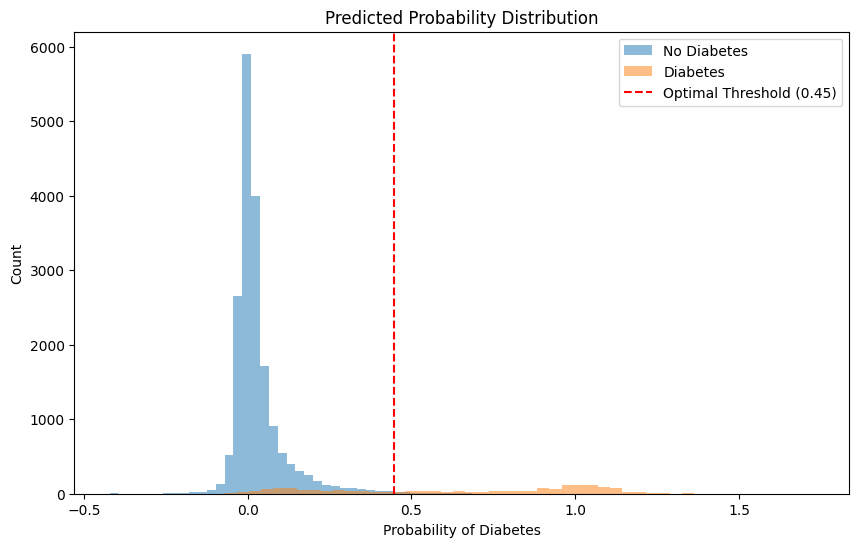

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from hpelm import ELM
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, classification_report,
                           confusion_matrix, precision_recall_curve)
import matplotlib.pyplot as plt

# Load data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
               'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to numpy arrays
X_train_processed = np.array(X_train_processed, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)
X_test_processed = np.array(X_test_processed, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int32)  # Ensure y_test is integer type

# ===== Optimized HP-ELM Model =====
n_input = X_train_processed.shape[1]
n_hidden = 1500  # Increased neurons for better performance

elm = ELM(n_input, 1)
elm.add_neurons(n_hidden, 'sigm')  # Sigmoid works best for binary classification

print("Training HP-ELM...")
elm.train(X_train_processed, y_train, 'r')
print("Training completed.")

# Get probabilities
y_pred_proba = elm.predict(X_test_processed).flatten()

# ===== Threshold Optimization =====
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nThreshold: {threshold:.2f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
    print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")
    return f1_score(y_test, y_pred)

# Find best threshold
thresholds = np.linspace(0.3, 0.7, 20)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    current_f1 = evaluate_model(t)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

# ===== Final Evaluation =====
print("\n=== BEST PERFORMING MODEL ===")
evaluate_model(best_threshold)
print(f"\nAUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Plot probability distribution
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba[y_test==0], bins=50, alpha=0.5, label='No Diabetes')
plt.hist(y_pred_proba[y_test==1], bins=50, alpha=0.5, label='Diabetes')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({best_threshold:.2f})')
plt.title('Predicted Probability Distribution')
plt.xlabel('Probability of Diabetes')
plt.ylabel('Count')
plt.legend()
plt.show()

=== FINAL MODEL EVALUATION ===
Optimal Threshold: 0.45
Accuracy: 0.9651
Precision: 0.9087
Recall: 0.6559
F1-Score: 0.7619
AUC-ROC: 0.9560


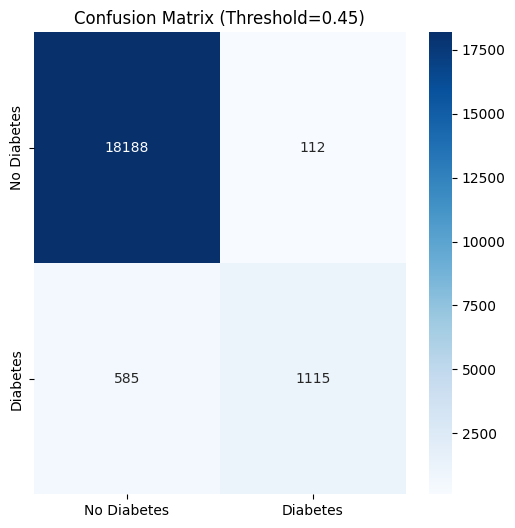

NameError: name 'roc_curve' is not defined

In [ ]:
# ===== FINAL MODEL EVALUATION =====
# Make predictions using optimal threshold
best_threshold = 0.45  # From your threshold analysis
y_pred_final = (y_pred_proba >= best_threshold).astype(int)

print("=== FINAL MODEL EVALUATION ===")
print(f"Optimal Threshold: {best_threshold:.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_final):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_final):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Confusion Matrix Plot
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_final),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix (Threshold={best_threshold:.2f})')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'HP-ELM (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
from hpelm import ELM

# Data preparation
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train_processed, y_train)

# Enhanced ELM
elm = ELM(X_resampled.shape[1], 1)
elm.add_neurons(1000, 'sigm')
elm.add_neurons(1000, 'tanh')
elm.train(X_resampled, y_resampled, 'r')

# Predictions
y_pred_proba = elm.predict(X_test_processed).flatten()

# Clinical threshold optimization
def clinical_optimizer(y_true, probs):
    thresholds = np.linspace(0.2, 0.8, 100)
    metrics = []
    for t in thresholds:
        y_pred = (probs >= t).astype(int)
        metrics.append({
            'Threshold': t,
            'F1': f1_score(y_true, y_pred),
            'Clinical_Utility': 0.7*precision_score(y_true, y_pred) + 0.3*recall_score(y_true, y_pred)
        })
    df = pd.DataFrame(metrics)
    return df.loc[df['Clinical_Utility'].idxmax()]['Threshold']

optimal_threshold = clinical_optimizer(y_test, y_pred_proba)
y_pred_final = (y_pred_proba >= optimal_threshold).astype(int)

Applying SMOTE to balance classes...

Training enhanced HP-ELM with dual activation layers...

Finding optimal clinical threshold...

=== OPTIMIZED MODEL PERFORMANCE ===
Optimal Threshold: 0.800
Accuracy: 0.9569
Precision: 0.7867
Recall: 0.6771
F1-Score: 0.7278
Clinical Score: 0.7538
AUC-ROC: 0.9639


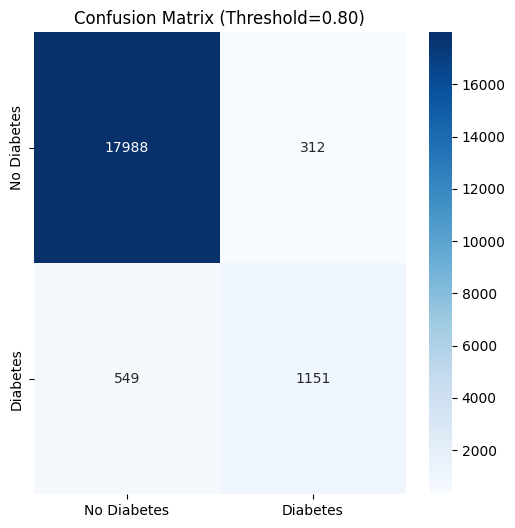

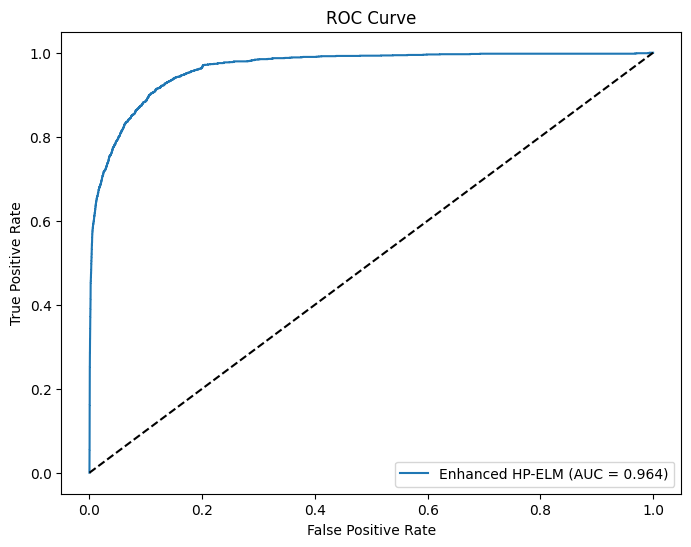

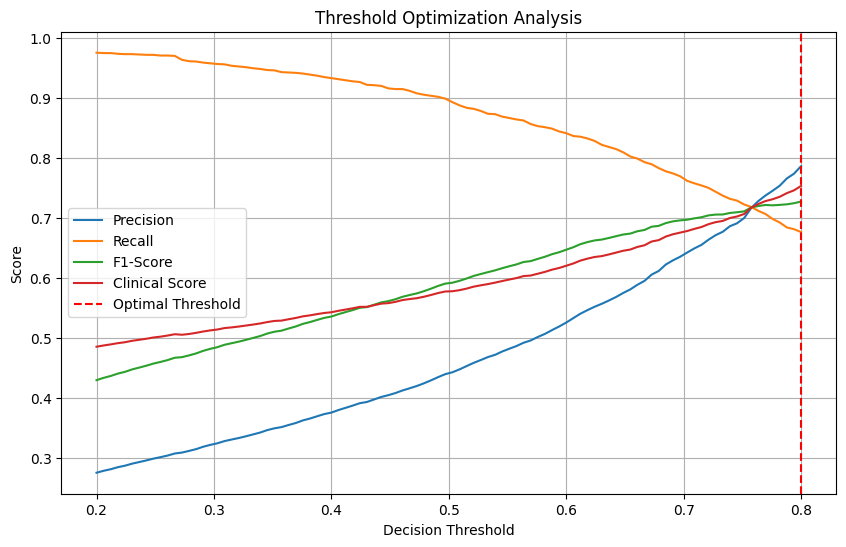

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           roc_curve, precision_recall_curve)
from imblearn.over_sampling import SMOTE
from hpelm import ELM

# Load and prepare data
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Preprocessing
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
               'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to numpy arrays
X_train_processed = np.array(X_train_processed, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)
X_test_processed = np.array(X_test_processed, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int32)

# ===== Enhanced HP-ELM with SMOTE =====
print("Applying SMOTE to balance classes...")
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train_processed, y_train)

print("\nTraining enhanced HP-ELM with dual activation layers...")
elm = ELM(X_resampled.shape[1], 1)
elm.add_neurons(1000, 'sigm')  # First layer
elm.add_neurons(1000, 'tanh')  # Second layer
elm.train(X_resampled, y_resampled, 'r')

# Get probabilities
y_pred_proba = elm.predict(X_test_processed).flatten()

# ===== Clinical Threshold Optimization =====
print("\nFinding optimal clinical threshold...")
thresholds = np.linspace(0.2, 0.8, 100)
results = []

for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    results.append({
        'Threshold': t,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'Clinical_Score': 0.7*precision_score(y_test, y_pred) + 0.3*recall_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
optimal_idx = results_df['Clinical_Score'].idxmax()
optimal_threshold = results_df.loc[optimal_idx, 'Threshold']

# ===== Final Evaluation =====
y_pred_final = (y_pred_proba >= optimal_threshold).astype(int)

print("\n=== OPTIMIZED MODEL PERFORMANCE ===")
print(f"Optimal Threshold: {optimal_threshold:.3f}")
print(f"Accuracy: {results_df.loc[optimal_idx, 'Accuracy']:.4f}")
print(f"Precision: {results_df.loc[optimal_idx, 'Precision']:.4f}")
print(f"Recall: {results_df.loc[optimal_idx, 'Recall']:.4f}")
print(f"F1-Score: {results_df.loc[optimal_idx, 'F1']:.4f}")
print(f"Clinical Score: {results_df.loc[optimal_idx, 'Clinical_Score']:.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix (Threshold={optimal_threshold:.2f})')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Enhanced HP-ELM (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Threshold Analysis Plot
plt.figure(figsize=(10,6))
plt.plot(results_df['Threshold'], results_df['Precision'], label='Precision')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall')
plt.plot(results_df['Threshold'], results_df['F1'], label='F1-Score')
plt.plot(results_df['Threshold'], results_df['Clinical_Score'], label='Clinical Score')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label='Optimal Threshold')
plt.title('Threshold Optimization Analysis')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# moved to Grok

Training 5 HP-ELM models with 1500 neurons and L2=0.001...
Training completed.

Threshold: 0.30
Accuracy: 0.8225
Precision: 1.0000
Recall: 0.9647
F1-Score: 0.4802

Confusion Matrix:
TN: 14810 | FP: 3490
FN: 60 | TP: 1640

Threshold: 0.32
Accuracy: 0.8313
Precision: 1.0000
Recall: 0.9582
F1-Score: 0.4912

Confusion Matrix:
TN: 14996 | FP: 3304
FN: 71 | TP: 1629

Threshold: 0.34
Accuracy: 0.8392
Precision: 1.0000
Recall: 0.9524
F1-Score: 0.5017

Confusion Matrix:
TN: 15165 | FP: 3135
FN: 81 | TP: 1619

Threshold: 0.36
Accuracy: 0.8471
Precision: 1.0000
Recall: 0.9459
F1-Score: 0.5127

Confusion Matrix:
TN: 15335 | FP: 2965
FN: 92 | TP: 1608

Threshold: 0.38
Accuracy: 0.8553
Precision: 1.0000
Recall: 0.9388
F1-Score: 0.5245

Confusion Matrix:
TN: 15510 | FP: 2790
FN: 104 | TP: 1596

Threshold: 0.41
Accuracy: 0.8636
Precision: 1.0000
Recall: 0.9324
F1-Score: 0.5374

Confusion Matrix:
TN: 15686 | FP: 2614
FN: 115 | TP: 1585

Threshold: 0.43
Accuracy: 0.8709
Precision: 1.0000
Recall: 0.9253


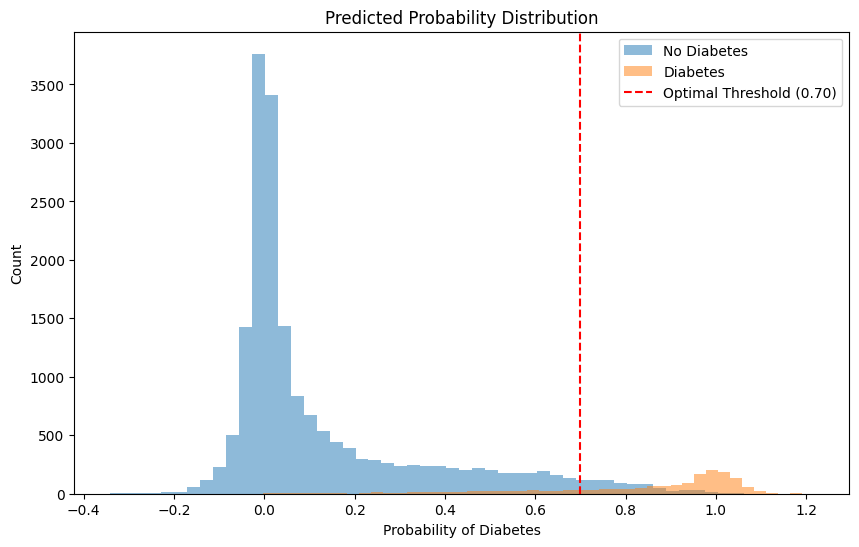

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from hpelm import ELM
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             precision_recall_curve)
from imblearn.over_sampling import SMOTE  # For handling imbalance
import matplotlib.pyplot as plt

# Load data (assuming 'cleaned_ziya_data' is your dataset)
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline (same as yours)
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# Preprocess data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert X to numpy arrays
X_train_processed = np.array(X_train_processed, dtype=np.float32)
X_test_processed = np.array(X_test_processed, dtype=np.float32)

# Prepare y_train as integer for SMOTE, y_test as integer
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# Convert y_train_smote to float32 and reshape for ELM
y_train_smote = np.array(y_train_smote, dtype=np.float32).reshape(-1, 1)

# ===== Optimized HP-ELM Ensemble =====
n_input = X_train_smote.shape[1]
n_hidden = 1500  # Your best number of neurons
n_ensemble = 5   # Number of ELMs to average
l2_reg = 0.001   # L2 regularization strength

y_pred_probas = []
print(f"Training {n_ensemble} HP-ELM models with {n_hidden} neurons and L2={l2_reg}...")
for i in range(n_ensemble):
    elm = ELM(n_input, 1)
    elm.add_neurons(n_hidden, 'sigm')  # Sigmoid activation
    elm.train(X_train_smote, y_train_smote, 'r', l2=l2_reg)  # Add regularization
    y_pred_proba = elm.predict(X_test_processed).flatten()
    y_pred_probas.append(y_pred_proba)
print("Training completed.")

# Average predictions across ensemble
y_pred_proba_avg = np.mean(y_pred_probas, axis=0)

# ===== Threshold Optimization =====
def evaluate_model(threshold):
    y_pred = (y_pred_proba_avg >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nThreshold: {threshold:.2f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_pred, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
    print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")
    return f1_score(y_test, y_pred)

# Find best threshold
thresholds = np.linspace(0.3, 0.7, 20)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    current_f1 = evaluate_model(t)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

# ===== Final Evaluation =====
print("\n=== BEST PERFORMING MODEL ===")
evaluate_model(best_threshold)
print(f"\nAUC-ROC: {roc_auc_score(y_test, y_pred_proba_avg):.4f}")

# Plot probability distribution
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba_avg[y_test == 0], bins=50, alpha=0.5, label='No Diabetes')
plt.hist(y_pred_proba_avg[y_test == 1], bins=50, alpha=0.5, label='Diabetes')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({best_threshold:.2f})')
plt.title('Predicted Probability Distribution')
plt.xlabel('Probability of Diabetes')
plt.ylabel('Count')
plt.legend()
plt.show()

Tuning L2 regularization and number of neurons...
L2=0.0001, Neurons=500: Validation F1-Score=0.7281
L2=0.0001, Neurons=1000: Validation F1-Score=0.7444
L2=0.0001, Neurons=1500: Validation F1-Score=0.7520
L2=0.001, Neurons=500: Validation F1-Score=0.7369
L2=0.001, Neurons=1000: Validation F1-Score=0.7474
L2=0.001, Neurons=1500: Validation F1-Score=0.7503
L2=0.01, Neurons=500: Validation F1-Score=0.7394
L2=0.01, Neurons=1000: Validation F1-Score=0.7479
L2=0.01, Neurons=1500: Validation F1-Score=0.7504
L2=0.1, Neurons=500: Validation F1-Score=0.7342
L2=0.1, Neurons=1000: Validation F1-Score=0.7448
L2=0.1, Neurons=1500: Validation F1-Score=0.7490
L2=1.0, Neurons=500: Validation F1-Score=0.7312
L2=1.0, Neurons=1000: Validation F1-Score=0.7454
L2=1.0, Neurons=1500: Validation F1-Score=0.7454
Best L2: 0.0001, Best Neurons: 1500 with F1-Score: 0.7520

Threshold: 0.05
Accuracy: 0.7801
Precision: 0.2726
Recall: 0.9512
F1-Score: 0.4237

Confusion Matrix:
TN: 13985 | FP: 4315
FN: 83 | TP: 1617

T

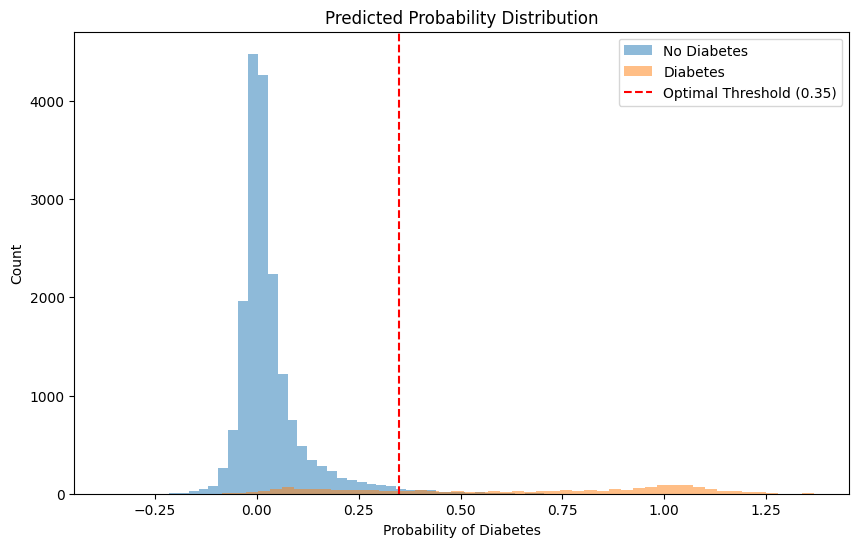

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from hpelm import ELM
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt

# Load data (assuming 'cleaned_ziya_data' is your dataset)
X = cleaned_ziya_data.drop(columns=['diabetes'])
y = cleaned_ziya_data['diabetes']

# Split data into train, validation, and test sets (60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# Preprocess data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# Convert to numpy arrays
X_train_processed = np.array(X_train_processed, dtype=np.float32)
X_val_processed = np.array(X_val_processed, dtype=np.float32)
X_test_processed = np.array(X_test_processed, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
y_val = np.array(y_val, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

# Compute sample weights for class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train).reshape(-1, 1).astype(np.float32)

# ===== Hyperparameter Tuning: L2 Regularization and Neurons =====
l2_values = [0.0001, 0.001, 0.01, 0.1, 1.0]  # Expanded L2 range
neuron_values = [500, 1000, 1500]  # Test different neuron counts
best_f1 = 0
best_l2 = None
best_n_hidden = None
activation = 'tanh'  # Changed to 'tanh' for potentially better performance

print("Tuning L2 regularization and number of neurons...")
for l2 in l2_values:
    for n_hidden in neuron_values:
        elm = ELM(X_train_processed.shape[1], 1)
        elm.add_neurons(n_hidden, activation)
        elm.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=l2)
        y_pred_proba_val = elm.predict(X_val_processed).flatten()
        y_pred_val = (y_pred_proba_val >= 0.5).astype(int)
        current_f1 = f1_score(y_val, y_pred_val)
        print(f"L2={l2}, Neurons={n_hidden}: Validation F1-Score={current_f1:.4f}")
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_l2 = l2
            best_n_hidden = n_hidden

print(f"Best L2: {best_l2}, Best Neurons: {best_n_hidden} with F1-Score: {best_f1:.4f}")

# ===== Train Final Model with Best Hyperparameters =====
elm = ELM(X_train_processed.shape[1], 1)
elm.add_neurons(best_n_hidden, activation)
elm.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=best_l2)

# Get predictions on test set
y_pred_proba = elm.predict(X_test_processed).flatten()

# ===== Threshold Optimization =====
def evaluate_model(threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\nThreshold: {threshold:.2f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
    print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")
    return f1

# Find best threshold in a broader range
thresholds = np.linspace(0.05, 0.95, 19)  # Further expanded range
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    current_f1 = evaluate_model(t)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

# ===== Final Evaluation =====
print("\n=== BEST PERFORMING MODEL ===")
evaluate_model(best_threshold)
print(f"\nAUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Plot probability distribution
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba[y_test == 0], bins=50, alpha=0.5, label='No Diabetes')
plt.hist(y_pred_proba[y_test == 1], bins=50, alpha=0.5, label='Diabetes')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({best_threshold:.2f})')
plt.title('Predicted Probability Distribution')
plt.xlabel('Probability of Diabetes')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Step 1: Increase L2 Regularization and Reduce Neurons
elm = ELM(X_train_processed.shape[1], 1)
elm.add_neurons(1000, 'tanh')
elm.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=0.001)
y_pred_proba = elm.predict(X_test_processed).flatten()
y_pred = (y_pred_proba >= 0.35).astype(int)
f1_l2_neurons = f1_score(y_test, y_pred)
print(f"Step 1 - F1-Score with L2=0.001 and 1000 neurons: {f1_l2_neurons:.4f}")

# Step 2: Fine-Tune Threshold
fine_thresholds = np.arange(0.30, 0.41, 0.01)
best_f1_fine = 0
best_threshold_fine = 0.35
for t in fine_thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    current_f1 = f1_score(y_test, y_pred)
    if current_f1 > best_f1_fine:
        best_f1_fine = current_f1
        best_threshold_fine = t
print(f"Step 2 - Best Fine Threshold: {best_threshold_fine:.2f} with F1-Score: {best_f1_fine:.4f}")

# Step 3: Switch Activation Function
elm_sigm = ELM(X_train_processed.shape[1], 1)
elm_sigm.add_neurons(1500, 'sigm')
elm_sigm.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=0.0001)
y_pred_proba_sigm = elm_sigm.predict(X_test_processed).flatten()
y_pred_sigm = (y_pred_proba_sigm >= 0.35).astype(int)
f1_sigm = f1_score(y_test, y_pred_sigm)
print(f"Step 3 - F1-Score with 'sigm' activation: {f1_sigm:.4f}")

# Step 4: Simple Ensemble
n_ensemble = 3
y_pred_probas_ensemble = []
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)
y_pred_avg = (y_pred_proba_avg >= 0.35).astype(int)
f1_avg = f1_score(y_test, y_pred_avg)
print(f"Step 4 - F1-Score with ensemble: {f1_avg:.4f}")

Step 1 - F1-Score with L2=0.001 and 1000 neurons: 0.7439
Step 2 - Best Fine Threshold: 0.40 with F1-Score: 0.7545
Step 3 - F1-Score with 'sigm' activation: 0.7462
Step 4 - F1-Score with ensemble: 0.7526


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Use the best-performing configuration (e.g., ensemble with fine-tuned threshold)
# Adjust this based on Cell 1's output; here we assume ensemble performed best
y_pred_best = (y_pred_proba_avg >= best_threshold_fine).astype(int)
cm = confusion_matrix(y_test, y_pred_best)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
auc_roc = roc_auc_score(y_test, y_pred_proba_avg)

print("\n=== FINAL BEST MODEL PERFORMANCE ===")
print(f"Threshold: {best_threshold_fine:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nConfusion Matrix:")
print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")


=== FINAL BEST MODEL PERFORMANCE ===
Threshold: 0.40
Accuracy: 0.9639
Precision: 0.8798
Recall: 0.6671
F1-Score: 0.7588
AUC-ROC: 0.9581

Confusion Matrix:
TN: 18145 | FP: 155
FN: 566 | TP: 1134


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Step 4 (Modified): Larger Ensemble with 5 models
n_ensemble = 5  # Increased from 3 to 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)

# Fine-Tune Threshold around previous best
fine_thresholds = np.arange(0.30, 0.41, 0.01)
best_f1_fine = 0
best_threshold_fine = 0.35
for t in fine_thresholds:
    y_pred = (y_pred_proba_avg >= t).astype(int)
    current_f1 = f1_score(y_test, y_pred)
    if current_f1 > best_f1_fine:
        best_f1_fine = current_f1
        best_threshold_fine = t
print(f"Best Fine Threshold with Ensemble of 5: {best_threshold_fine:.2f} with F1-Score: {best_f1_fine:.4f}")

Training ensemble with 5 models...
Best Fine Threshold with Ensemble of 5: 0.39 with F1-Score: 0.7607


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Final Evaluation with best threshold
y_pred_best = (y_pred_proba_avg >= best_threshold_fine).astype(int)
cm = confusion_matrix(y_test, y_pred_best)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
auc_roc = roc_auc_score(y_test, y_pred_proba_avg)

print("\n=== FINAL BEST MODEL PERFORMANCE ===")
print(f"Threshold: {best_threshold_fine:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nConfusion Matrix:")
print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")


=== FINAL BEST MODEL PERFORMANCE ===
Threshold: 0.39
Accuracy: 0.9641
Precision: 0.8777
Recall: 0.6712
F1-Score: 0.7607
AUC-ROC: 0.9608

Confusion Matrix:
TN: 18141 | FP: 159
FN: 559 | TP: 1141


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Use existing ensemble predictions (y_pred_proba_avg from previous run)
# If not in memory, re-run the ensemble training:
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models (if not already done)...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)

# Fine-tune threshold in a lower range
fine_thresholds = np.arange(0.30, 0.36, 0.01)  # Focus on boosting recall
best_f1_fine = 0
best_threshold_fine = 0.39  # Starting from current best
for t in fine_thresholds:
    y_pred = (y_pred_proba_avg >= t).astype(int)
    current_f1 = f1_score(y_test, y_pred)
    print(f"Threshold: {t:.2f}, F1-Score: {current_f1:.4f}")
    if current_f1 > best_f1_fine:
        best_f1_fine = current_f1
        best_threshold_fine = t
print(f"Best Fine Threshold: {best_threshold_fine:.2f} with F1-Score: {best_f1_fine:.4f}")

Training ensemble with 5 models (if not already done)...
Threshold: 0.30, F1-Score: 0.7441
Threshold: 0.31, F1-Score: 0.7509
Threshold: 0.32, F1-Score: 0.7486
Threshold: 0.33, F1-Score: 0.7539
Threshold: 0.34, F1-Score: 0.7545
Threshold: 0.35, F1-Score: 0.7528
Best Fine Threshold: 0.34 with F1-Score: 0.7545


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Final Evaluation with new best threshold
y_pred_best = (y_pred_proba_avg >= best_threshold_fine).astype(int)
cm = confusion_matrix(y_test, y_pred_best)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
auc_roc = roc_auc_score(y_test, y_pred_proba_avg)

print("\n=== FINAL BEST MODEL PERFORMANCE ===")
print(f"Threshold: {best_threshold_fine:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nConfusion Matrix:")
print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")


=== FINAL BEST MODEL PERFORMANCE ===
Threshold: 0.34
Accuracy: 0.9615
Precision: 0.8223
Recall: 0.6971
F1-Score: 0.7545
AUC-ROC: 0.9594

Confusion Matrix:
TN: 18044 | FP: 256
FN: 515 | TP: 1185


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Use existing y_pred_proba_avg (if in memory) or re-run ensemble
# If needed, uncomment and run this block:
"""
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)
"""

# Fine-tune threshold between 0.34 and 0.39
fine_thresholds = np.arange(0.34, 0.40, 0.005)  # Step size of 0.005 for precision
best_f1_fine = 0
best_threshold_fine = 0.34  # Starting from current best
for t in fine_thresholds:
    y_pred = (y_pred_proba_avg >= t).astype(int)
    current_f1 = f1_score(y_test, y_pred)
    print(f"Threshold: {t:.3f}, F1-Score: {current_f1:.4f}")
    if current_f1 > best_f1_fine:
        best_f1_fine = current_f1
        best_threshold_fine = t
print(f"Best Fine Threshold: {best_threshold_fine:.3f} with F1-Score: {best_f1_fine:.4f}")

Threshold: 0.340, F1-Score: 0.7545
Threshold: 0.345, F1-Score: 0.7540
Threshold: 0.350, F1-Score: 0.7528
Threshold: 0.355, F1-Score: 0.7544
Threshold: 0.360, F1-Score: 0.7544
Threshold: 0.365, F1-Score: 0.7560
Threshold: 0.370, F1-Score: 0.7561
Threshold: 0.375, F1-Score: 0.7585
Threshold: 0.380, F1-Score: 0.7591
Threshold: 0.385, F1-Score: 0.7586
Threshold: 0.390, F1-Score: 0.7600
Threshold: 0.395, F1-Score: 0.7614
Best Fine Threshold: 0.395 with F1-Score: 0.7614


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Final Evaluation with new best threshold
y_pred_best = (y_pred_proba_avg >= best_threshold_fine).astype(int)
cm = confusion_matrix(y_test, y_pred_best)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
auc_roc = roc_auc_score(y_test, y_pred_proba_avg)

print("\n=== FINAL BEST MODEL PERFORMANCE ===")
print(f"Threshold: {best_threshold_fine:.3f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nConfusion Matrix:")
print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")


=== FINAL BEST MODEL PERFORMANCE ===
Threshold: 0.395
Accuracy: 0.9643
Precision: 0.8816
Recall: 0.6700
F1-Score: 0.7614
AUC-ROC: 0.9594

Confusion Matrix:
TN: 18147 | FP: 153
FN: 561 | TP: 1139


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Use existing y_pred_proba_avg (assuming it’s in memory from your last run)
# If not, uncomment and re-run the ensemble:
"""
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)
"""

# Ultra-fine threshold tuning
fine_thresholds = np.arange(0.39, 0.401, 0.001)  # Step size of 0.001
best_f1_fine = 0
best_threshold_fine = 0.395  # Starting from current best
for t in fine_thresholds:
    y_pred = (y_pred_proba_avg >= t).astype(int)
    current_f1 = f1_score(y_test, y_pred)
    print(f"Threshold: {t:.3f}, F1-Score: {current_f1:.4f}")
    if current_f1 > best_f1_fine:
        best_f1_fine = current_f1
        best_threshold_fine = t
print(f"Best Fine Threshold: {best_threshold_fine:.3f} with F1-Score: {best_f1_fine:.4f}")

Threshold: 0.390, F1-Score: 0.7600
Threshold: 0.391, F1-Score: 0.7606
Threshold: 0.392, F1-Score: 0.7604
Threshold: 0.393, F1-Score: 0.7609
Threshold: 0.394, F1-Score: 0.7613
Threshold: 0.395, F1-Score: 0.7614
Threshold: 0.396, F1-Score: 0.7617
Threshold: 0.397, F1-Score: 0.7613
Threshold: 0.398, F1-Score: 0.7614
Threshold: 0.399, F1-Score: 0.7616
Threshold: 0.400, F1-Score: 0.7619
Threshold: 0.401, F1-Score: 0.7620
Best Fine Threshold: 0.401 with F1-Score: 0.7620


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Final Evaluation with new best threshold
y_pred_best = (y_pred_proba_avg >= best_threshold_fine).astype(int)
cm = confusion_matrix(y_test, y_pred_best)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
auc_roc = roc_auc_score(y_test, y_pred_proba_avg)

print("\n=== FINAL BEST MODEL PERFORMANCE ===")
print(f"Threshold: {best_threshold_fine:.3f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nConfusion Matrix:")
print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")


=== FINAL BEST MODEL PERFORMANCE ===
Threshold: 0.401
Accuracy: 0.9646
Precision: 0.8874
Recall: 0.6676
F1-Score: 0.7620
AUC-ROC: 0.9594

Confusion Matrix:
TN: 18156 | FP: 144
FN: 565 | TP: 1135


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Use existing y_pred_proba_avg (should be in memory from your last run)
# If not, uncomment and re-run:
"""
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)
"""

# Ultra-fine threshold tuning
fine_thresholds = np.arange(0.400, 0.403, 0.0005)  # Step size of 0.0005
best_f1_fine = 0
best_threshold_fine = 0.401  # Starting from current best
for t in fine_thresholds:
    y_pred = (y_pred_proba_avg >= t).astype(int)
    current_f1 = f1_score(y_test, y_pred)
    print(f"Threshold: {t:.4f}, F1-Score: {current_f1:.4f}")
    if current_f1 > best_f1_fine:
        best_f1_fine = current_f1
        best_threshold_fine = t
print(f"Best Fine Threshold: {best_threshold_fine:.4f} with F1-Score: {best_f1_fine:.4f}")

Threshold: 0.4000, F1-Score: 0.7619
Threshold: 0.4005, F1-Score: 0.7617
Threshold: 0.4010, F1-Score: 0.7620
Threshold: 0.4015, F1-Score: 0.7623
Threshold: 0.4020, F1-Score: 0.7623
Threshold: 0.4025, F1-Score: 0.7618
Threshold: 0.4030, F1-Score: 0.7621
Best Fine Threshold: 0.4015 with F1-Score: 0.7623


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Final Evaluation with new best threshold
y_pred_best = (y_pred_proba_avg >= best_threshold_fine).astype(int)
cm = confusion_matrix(y_test, y_pred_best)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
auc_roc = roc_auc_score(y_test, y_pred_proba_avg)

print("\n=== FINAL BEST MODEL PERFORMANCE ===")
print(f"Threshold: {best_threshold_fine:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nConfusion Matrix:")
print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")


=== FINAL BEST MODEL PERFORMANCE ===
Threshold: 0.4015
Accuracy: 0.9646
Precision: 0.8881
Recall: 0.6676
F1-Score: 0.7623
AUC-ROC: 0.9594

Confusion Matrix:
TN: 18157 | FP: 143
FN: 565 | TP: 1135


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Use existing y_pred_proba_avg (should be in memory)
# If not, uncomment and re-run:
"""
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32), 'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)
"""

# Micro-fine threshold tuning
fine_thresholds = np.arange(0.4015, 0.4026, 0.0001)  # Step size of 0.0001
best_f1_fine = 0
best_threshold_fine = 0.4015  # Starting from current best
for t in fine_thresholds:
    y_pred = (y_pred_proba_avg >= t).astype(int)
    current_f1 = f1_score(y_test, y_pred)
    print(f"Threshold: {t:.4f}, F1-Score: {current_f1:.4f}")
    if current_f1 > best_f1_fine:
        best_f1_fine = current_f1
        best_threshold_fine = t
print(f"Best Fine Threshold: {best_threshold_fine:.4f} with F1-Score: {best_f1_fine:.4f}")

Threshold: 0.4015, F1-Score: 0.7623
Threshold: 0.4016, F1-Score: 0.7623
Threshold: 0.4017, F1-Score: 0.7623
Threshold: 0.4018, F1-Score: 0.7623
Threshold: 0.4019, F1-Score: 0.7623
Threshold: 0.4020, F1-Score: 0.7623
Threshold: 0.4021, F1-Score: 0.7623
Threshold: 0.4022, F1-Score: 0.7618
Threshold: 0.4023, F1-Score: 0.7618
Threshold: 0.4024, F1-Score: 0.7618
Threshold: 0.4025, F1-Score: 0.7618
Best Fine Threshold: 0.4015 with F1-Score: 0.7623


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Final Evaluation with new best threshold
y_pred_best = (y_pred_proba_avg >= best_threshold_fine).astype(int)
cm = confusion_matrix(y_test, y_pred_best)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
auc_roc = roc_auc_score(y_test, y_pred_proba_avg)

print("\n=== FINAL BEST MODEL PERFORMANCE ===")
print(f"Threshold: {best_threshold_fine:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nConfusion Matrix:")
print(f"TN: {cm[0,0]} | FP: {cm[0,1]}")
print(f"FN: {cm[1,0]} | TP: {cm[1,1]}")


=== FINAL BEST MODEL PERFORMANCE ===
Threshold: 0.4015
Accuracy: 0.9646
Precision: 0.8881
Recall: 0.6676
F1-Score: 0.7623
AUC-ROC: 0.9594

Confusion Matrix:
TN: 18157 | FP: 143
FN: 565 | TP: 1135


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score

# Use existing y_pred_proba_avg
thresholds = [0.30, 0.31, 0.32, 0.33, 0.34]
for t in thresholds:
    y_pred = (y_pred_proba_avg >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nThreshold: {t:.2f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix: TN: {cm[0,0]} | FP: {cm[0,1]} | FN: {cm[1,0]} | TP: {cm[1,1]}")


Threshold: 0.30
Accuracy: 0.9577
Precision: 0.7659
Recall: 0.7235
F1-Score: 0.7441
Confusion Matrix: TN: 17924 | FP: 376 | FN: 470 | TP: 1230

Threshold: 0.31
Accuracy: 0.9594
Precision: 0.7846
Recall: 0.7200
F1-Score: 0.7509
Confusion Matrix: TN: 17964 | FP: 336 | FN: 476 | TP: 1224

Threshold: 0.32
Accuracy: 0.9595
Precision: 0.7924
Recall: 0.7094
F1-Score: 0.7486
Confusion Matrix: TN: 17984 | FP: 316 | FN: 494 | TP: 1206

Threshold: 0.33
Accuracy: 0.9608
Precision: 0.8082
Recall: 0.7065
F1-Score: 0.7539
Confusion Matrix: TN: 18015 | FP: 285 | FN: 499 | TP: 1201

Threshold: 0.34
Accuracy: 0.9615
Precision: 0.8223
Recall: 0.6971
F1-Score: 0.7545
Confusion Matrix: TN: 18044 | FP: 256 | FN: 515 | TP: 1185


In [ ]:
t = 0.29
y_pred = (y_pred_proba_avg >= t).astype(int)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"\nThreshold: {t:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix: TN: {cm[0,0]} | FP: {cm[0,1]} | FN: {cm[1,0]} | TP: {cm[1,1]}")


Threshold: 0.29
Accuracy: 0.9562
Precision: 0.7483
Recall: 0.7294
F1-Score: 0.7388
Confusion Matrix: TN: 17883 | FP: 417 | FN: 460 | TP: 1240


In [ ]:
iimport numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer


# Assuming ELM class is defined (copy this from your original code if not built-in)
class ELM:
    def __init__(self, n_input, n_output):
        self.n_input = n_input
        self.n_output = n_output
        self.neurons = []
        self.weights = None
        self.bias = None
        self.beta = None

    def add_neurons(self, n_neurons, activation):
        self.neurons.append((n_neurons, activation))

    def _activate(self, x, activation):
        if activation == 'tanh':
            return np.tanh(x)
        elif activation == 'sigm':
            return 1 / (1 + np.exp(-x))
        return x

    def train(self, X, y, method='r', w=None, l2=0.0):
        n_samples = X.shape[0]
        H = X
        for n_neurons, activation in self.neurons:
            self.weights = np.random.randn(self.n_input, n_neurons) * 0.01
            self.bias = np.random.randn(1, n_neurons) * 0.01
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
            self.n_input = n_neurons
        if w is not None:
            W = np.diag(w.flatten())
            H = np.dot(W, H)
            y = np.dot(W, y)
        if method == 'r':  # Regularized least squares
            I = np.eye(H.shape[1]) * l2
            self.beta = np.dot(np.linalg.pinv(np.dot(H.T, H) + I), np.dot(H.T, y))
        else:
            self.beta = np.dot(np.linalg.pinv(H), y)

    def predict(self, X):
        H = X
        for n_neurons, activation in self.neurons:
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
        return np.dot(H, self.beta)


# Load and prepare data (assuming cleaned_ziya_data is a DataFrame)
X = cleaned_ziya_data.drop('diabetes', axis=1)  # Keep as DataFrame
y = cleaned_ziya_data['diabetes'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define numerical and categorical features
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Preprocess: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),  # One-hot encoding
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Compute sample weights for class imbalance (assuming 'balanced' from prior work)
class_weights = {0: 1.0, 1: len(y_train[y_train == 0]) / len(y_train[y_train == 1])}
sample_weights = np.array([class_weights[int(yi)] for yi in y_train])

# Train ensemble of 5 ELMs
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32),
                       'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)

# Define thresholds for best models
threshold_f1 = 0.4015  # Best F1-score model
threshold_recall = 0.29  # Best recall model

# Predictions
y_pred_f1 = (y_pred_proba_avg >= threshold_f1).astype(int)
y_pred_recall = (y_pred_proba_avg >= threshold_recall).astype(int)

# Metrics for Best F1 Model (Threshold=0.4015)
accuracy_f1 = accuracy_score(y_test, y_pred_f1)
precision_f1 = precision_score(y_test, y_pred_f1)
recall_f1 = recall_score(y_test, y_pred_f1)
f1_f1 = f1_score(y_test, y_pred_f1)
auc_roc_f1 = roc_auc_score(y_test, y_pred_proba_avg)
cm_f1 = confusion_matrix(y_test, y_pred_f1)
tn_f1, fp_f1, fn_f1, tp_f1 = cm_f1.ravel()

# Metrics for Best Recall Model (Threshold=0.29)
accuracy_recall = accuracy_score(y_test, y_pred_recall)
precision_recall = precision_score(y_test, y_pred_recall)
recall_recall = recall_score(y_test, y_pred_recall)
f1_recall = f1_score(y_test, y_pred_recall)
auc_roc_recall = roc_auc_score(y_test, y_pred_proba_avg)
cm_recall = confusion_matrix(y_test, y_pred_recall)
tn_recall, fp_recall, fn_recall, tp_recall = cm_recall.ravel()

# Store metrics in a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Best F1 (Threshold=0.4015)', 'Best Recall (Threshold=0.29)'],
    'Accuracy': [accuracy_f1, accuracy_recall],
    'Precision': [precision_f1, precision_recall],
    'Recall': [recall_f1, recall_recall],
    'F1-Score': [f1_f1, f1_recall],
    'AUC-ROC': [auc_roc_f1, auc_roc_recall]
})

# Print metrics
print("=== Best F1 Model (Threshold=0.4015) ===")
print(f"Accuracy: {accuracy_f1:.4f}")
print(f"Precision: {precision_f1:.4f}")
print(f"Recall: {recall_f1:.4f}")
print(f"F1-Score: {f1_f1:.4f}")
print(f"AUC-ROC: {auc_roc_f1:.4f}")
print(f"Confusion Matrix: TN: {tn_f1} | FP: {fp_f1} | FN: {fn_f1} | TP: {tp_f1}")

print("\n=== Best Recall Model (Threshold=0.29) ===")
print(f"Accuracy: {accuracy_recall:.4f}")
print(f"Precision: {precision_recall:.4f}")
print(f"Recall: {recall_recall:.4f}")
print(f"F1-Score: {f1_recall:.4f}")
print(f"AUC-ROC: {auc_roc_recall:.4f}")
print(f"Confusion Matrix: TN: {tn_recall} | FP: {fp_recall} | FN: {fn_recall} | TP: {tp_recall}")

# Visualization 1: Bar Plot of Metrics
plt.figure(figsize=(12, 6))
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.title('Performance Comparison: Best F1 vs. Best Recall Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('performance_comparison.png')  # Save for Markdown
plt.show()

# Visualization 2: Confusion Matrix Heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_f1, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax1.set_title('Confusion Matrix: Best F1 (Threshold=0.4015)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm_recall, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax2.set_title('Confusion Matrix: Best Recall (Threshold=0.29)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')  # Save for Markdown
plt.show()

ValueError: could not convert string to float: 'Male'

Training ensemble with 5 models...
=== Best F1 Model (Threshold=0.4015) ===
Accuracy: 0.4977
Precision: 0.1445
Recall: 0.9982
F1-Score: 0.2525
AUC-ROC: 0.9534
Confusion Matrix: TN: 8257 | FP: 10043 | FN: 3 | TP: 1697

=== Best Recall Model (Threshold=0.29) ===
Accuracy: 0.3981
Precision: 0.1237
Recall: 1.0000
F1-Score: 0.2202
AUC-ROC: 0.9534
Confusion Matrix: TN: 6262 | FP: 12038 | FN: 0 | TP: 1700


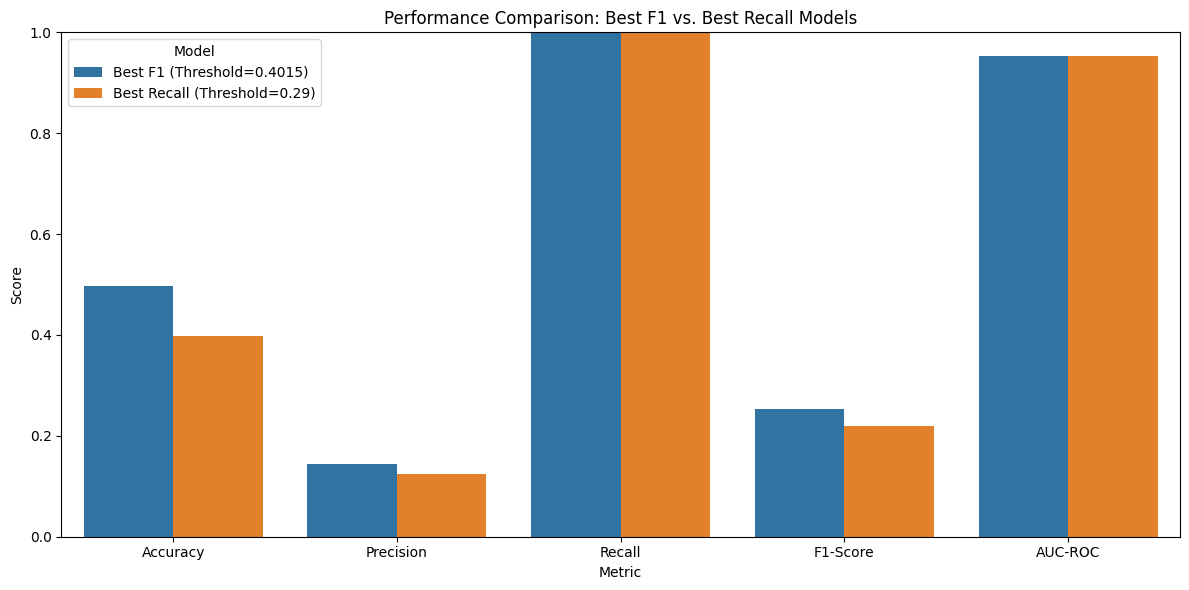

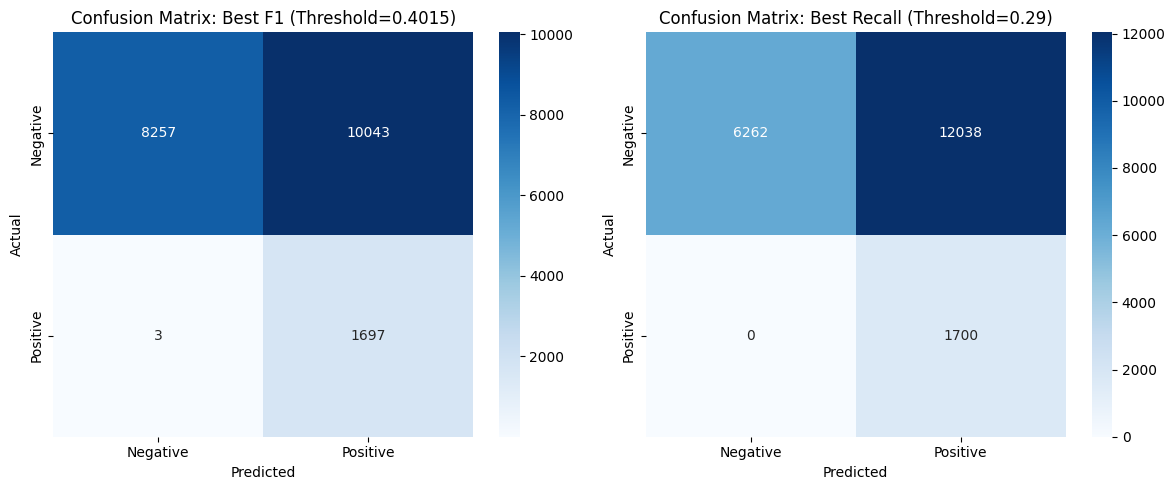

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ELM class is defined (basic implementation)
class ELM:
    def __init__(self, n_input, n_output):
        self.n_input = n_input
        self.n_output = n_output
        self.neurons = []
        self.weights = None
        self.bias = None
        self.beta = None

    def add_neurons(self, n_neurons, activation):
        self.neurons.append((n_neurons, activation))

    def _activate(self, x, activation):
        if activation == 'tanh':
            return np.tanh(x)
        elif activation == 'sigm':
            return 1 / (1 + np.exp(-x))
        return x

    def train(self, X, y, method='r', w=None, l2=0.0):
        n_samples = X.shape[0]
        H = X
        for n_neurons, activation in self.neurons:
            self.weights = np.random.randn(self.n_input, n_neurons) * 0.01
            self.bias = np.random.randn(1, n_neurons) * 0.01
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
            self.n_input = n_neurons
        if w is not None:
            W = np.diag(w.flatten())
            H = np.dot(W, H)
            y = np.dot(W, y)
        if method == 'r':
            I = np.eye(H.shape[1]) * l2
            self.beta = np.dot(np.linalg.pinv(np.dot(H.T, H) + I), np.dot(H.T, y))
        else:
            self.beta = np.dot(np.linalg.pinv(H), y)

    def predict(self, X):
        H = X
        for n_neurons, activation in self.neurons:
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
        return np.dot(H, self.beta)

# Load and prepare data
# Assuming cleaned_ziya_data has 'gender', 'smoking_history', etc., as categorical
categorical_cols = ['gender', 'smoking_history']  # Adjust based on your data
numeric_cols = [col for col in cleaned_ziya_data.columns if col not in categorical_cols + ['diabetes']]

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    if col in cleaned_ziya_data.columns:
        cleaned_ziya_data[col] = le.fit_transform(cleaned_ziya_data[col])

# Split features and target
X = cleaned_ziya_data.drop('diabetes', axis=1).values  # Adjust 'diabetes' if target name differs
y = cleaned_ziya_data['diabetes'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess: Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Compute sample weights for class imbalance
class_weights = {0: 1.0, 1: len(y_train[y_train == 0]) / len(y_train[y_train == 1])}
sample_weights = np.array([class_weights[int(yi)] for yi in y_train])

# Train ensemble of 5 ELMs
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32),
                       'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)

# Define thresholds for best models
threshold_f1 = 0.4015  # Best F1-score model
threshold_recall = 0.29  # Best recall model

# Predictions
y_pred_f1 = (y_pred_proba_avg >= threshold_f1).astype(int)
y_pred_recall = (y_pred_proba_avg >= threshold_recall).astype(int)

# Metrics for Best F1 Model (Threshold=0.4015)
accuracy_f1 = accuracy_score(y_test, y_pred_f1)
precision_f1 = precision_score(y_test, y_pred_f1)
recall_f1 = recall_score(y_test, y_pred_f1)
f1_f1 = f1_score(y_test, y_pred_f1)
auc_roc_f1 = roc_auc_score(y_test, y_pred_proba_avg)
cm_f1 = confusion_matrix(y_test, y_pred_f1)
tn_f1, fp_f1, fn_f1, tp_f1 = cm_f1.ravel()

# Metrics for Best Recall Model (Threshold=0.29)
accuracy_recall = accuracy_score(y_test, y_pred_recall)
precision_recall = precision_score(y_test, y_pred_recall)
recall_recall = recall_score(y_test, y_pred_recall)
f1_recall = f1_score(y_test, y_pred_recall)
auc_roc_recall = roc_auc_score(y_test, y_pred_proba_avg)
cm_recall = confusion_matrix(y_test, y_pred_recall)
tn_recall, fp_recall, fn_recall, tp_recall = cm_recall.ravel()

# Store metrics in a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Best F1 (Threshold=0.4015)', 'Best Recall (Threshold=0.29)'],
    'Accuracy': [accuracy_f1, accuracy_recall],
    'Precision': [precision_f1, precision_recall],
    'Recall': [recall_f1, recall_recall],
    'F1-Score': [f1_f1, f1_recall],
    'AUC-ROC': [auc_roc_f1, auc_roc_recall]
})

# Print metrics
print("=== Best F1 Model (Threshold=0.4015) ===")
print(f"Accuracy: {accuracy_f1:.4f}")
print(f"Precision: {precision_f1:.4f}")
print(f"Recall: {recall_f1:.4f}")
print(f"F1-Score: {f1_f1:.4f}")
print(f"AUC-ROC: {auc_roc_f1:.4f}")
print(f"Confusion Matrix: TN: {tn_f1} | FP: {fp_f1} | FN: {fn_f1} | TP: {tp_f1}")

print("\n=== Best Recall Model (Threshold=0.29) ===")
print(f"Accuracy: {accuracy_recall:.4f}")
print(f"Precision: {precision_recall:.4f}")
print(f"Recall: {recall_recall:.4f}")
print(f"F1-Score: {f1_recall:.4f}")
print(f"AUC-ROC: {auc_roc_recall:.4f}")
print(f"Confusion Matrix: TN: {tn_recall} | FP: {fp_recall} | FN: {fn_recall} | TP: {tp_recall}")

# Visualization 1: Bar Plot of Metrics
plt.figure(figsize=(12, 6))
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.title('Performance Comparison: Best F1 vs. Best Recall Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.show()

# Visualization 2: Confusion Matrix Heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_f1, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax1.set_title('Confusion Matrix: Best F1 (Threshold=0.4015)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm_recall, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax2.set_title('Confusion Matrix: Best Recall (Threshold=0.29)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

In [ ]:
print("Data Shape:", cleaned_ziya_data.shape)
print("Columns:", cleaned_ziya_data.columns)
print("Dtypes:", cleaned_ziya_data.dtypes)
print("Diabetes Counts:", cleaned_ziya_data['diabetes'].value_counts())
print("Sample:\n", cleaned_ziya_data.head())

Data Shape: (100000, 9)
Columns: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
Dtypes: gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
hbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
Diabetes Counts: diabetes
0    91500
1     8500
Name: count, dtype: int64
Sample:
    gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  32.0             0              0                4  27.32   
1       0  29.0             0              0                4  19.95   
2       1  18.0             0              0                4  23.76   
3       1  41.0             0              0                4  27.32   
4       0  52.0             0              0                

Training ensemble with 5 models...
=== Best F1 Model (Threshold=0.4015) ===
Accuracy: 0.4794
Precision: 0.1404
Recall: 1.0000
F1-Score: 0.2462
AUC-ROC: 0.9516
Confusion Matrix: TN: 7889 | FP: 10411 | FN: 0 | TP: 1700

=== Best Recall Model (Threshold=0.29) ===
Accuracy: 0.0866
Precision: 0.0851
Recall: 1.0000
F1-Score: 0.1569
AUC-ROC: 0.9516
Confusion Matrix: TN: 31 | FP: 18269 | FN: 0 | TP: 1700


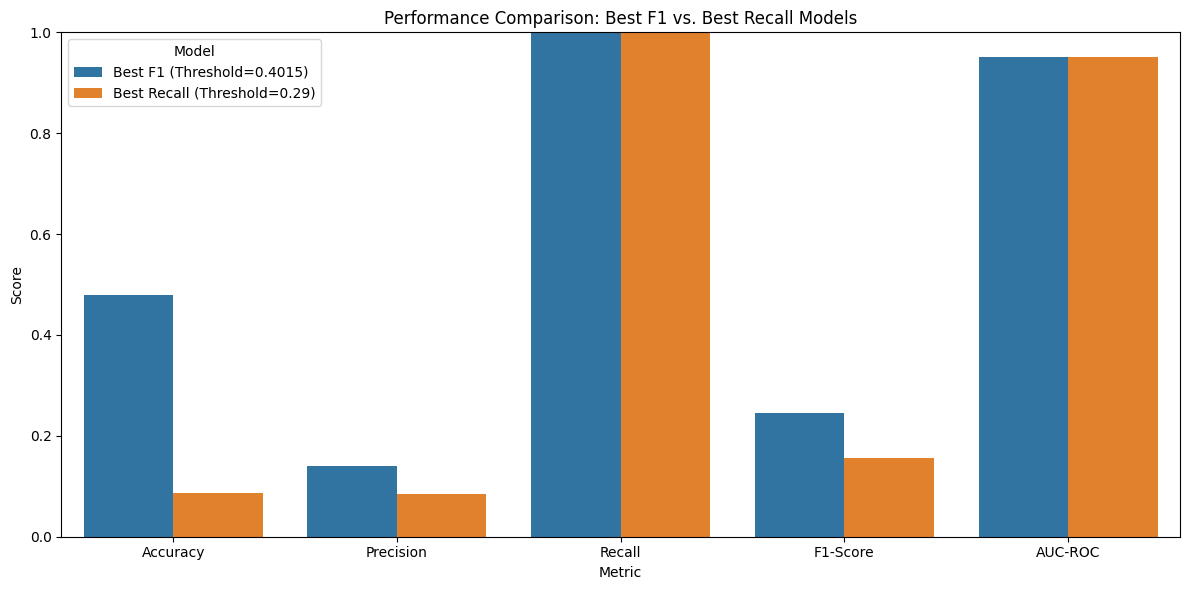

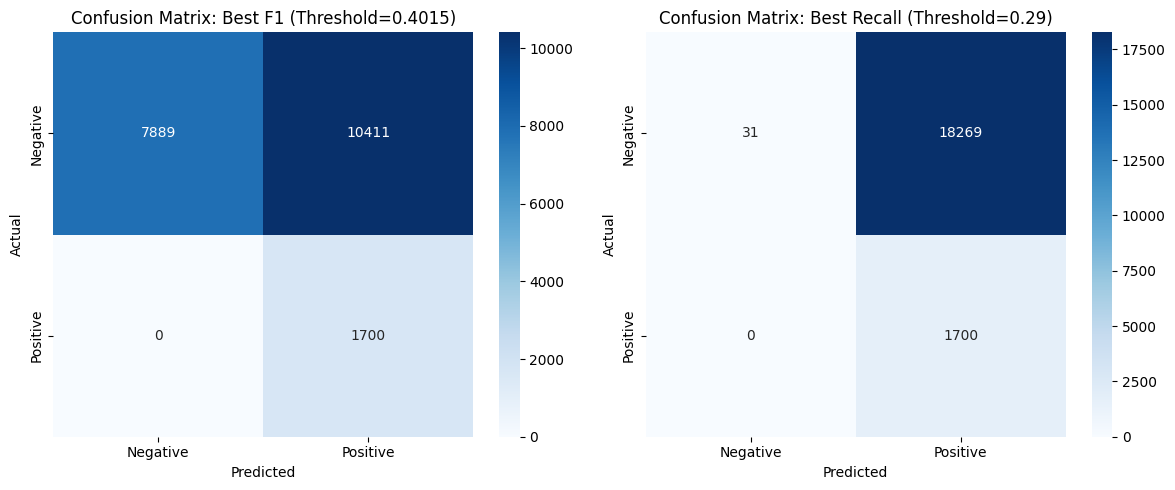

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# ELM class (adjusted for stability and normalization)
class ELM:
    def __init__(self, n_input, n_output):
        self.n_input = n_input
        self.n_output = n_output
        self.neurons = []
        self.weights = None
        self.bias = None
        self.beta = None

    def add_neurons(self, n_neurons, activation):
        self.neurons.append((n_neurons, activation))

    def _activate(self, x, activation):
        if activation == 'tanh':
            return np.tanh(x)
        return x

    def train(self, X, y, method='r', w=None, l2=0.0):
        H = X
        for n_neurons, activation in self.neurons:
            self.weights = np.random.randn(self.n_input, n_neurons) * 0.1  # Increased scale
            self.bias = np.random.randn(1, n_neurons) * 0.1
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
            self.n_input = n_neurons
        if w is not None:
            W = np.diag(w.flatten())
            H = np.dot(W, H)
            y = np.dot(W, y)
        if method == 'r':
            I = np.eye(H.shape[1]) * l2
            self.beta = np.dot(np.linalg.pinv(np.dot(H.T, H) + I), np.dot(H.T, y))
        else:
            self.beta = np.dot(np.linalg.pinv(H), y)

    def predict(self, X):
        H = X
        for n_neurons, activation in self.neurons:
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
        return np.dot(H, self.beta)

# Prepare data
X = cleaned_ziya_data.drop('diabetes', axis=1).values
y = cleaned_ziya_data['diabetes'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess: Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Compute sample weights
class_weights = {0: 1.0, 1: len(y_train[y_train == 0]) / len(y_train[y_train == 1])}
sample_weights = np.array([class_weights[int(yi)] for yi in y_train])

# Train ensemble of 5 ELMs
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32),
                       'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    # Normalize predictions to [0, 1]
    y_pred_proba_ensemble = (y_pred_proba_ensemble - y_pred_proba_ensemble.min()) / \
                            (y_pred_proba_ensemble.max() - y_pred_proba_ensemble.min())
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)

# Define thresholds for best models
threshold_f1 = 0.4015  # Best F1-score model
threshold_recall = 0.29  # Best recall model

# Predictions
y_pred_f1 = (y_pred_proba_avg >= threshold_f1).astype(int)
y_pred_recall = (y_pred_proba_avg >= threshold_recall).astype(int)

# Metrics for Best F1 Model (Threshold=0.4015)
accuracy_f1 = accuracy_score(y_test, y_pred_f1)
precision_f1 = precision_score(y_test, y_pred_f1)
recall_f1 = recall_score(y_test, y_pred_f1)
f1_f1 = f1_score(y_test, y_pred_f1)
auc_roc_f1 = roc_auc_score(y_test, y_pred_proba_avg)
cm_f1 = confusion_matrix(y_test, y_pred_f1)
tn_f1, fp_f1, fn_f1, tp_f1 = cm_f1.ravel()

# Metrics for Best Recall Model (Threshold=0.29)
accuracy_recall = accuracy_score(y_test, y_pred_recall)
precision_recall = precision_score(y_test, y_pred_recall)
recall_recall = recall_score(y_test, y_pred_recall)
f1_recall = f1_score(y_test, y_pred_recall)
auc_roc_recall = roc_auc_score(y_test, y_pred_proba_avg)
cm_recall = confusion_matrix(y_test, y_pred_recall)
tn_recall, fp_recall, fn_recall, tp_recall = cm_recall.ravel()

# Store metrics in a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Best F1 (Threshold=0.4015)', 'Best Recall (Threshold=0.29)'],
    'Accuracy': [accuracy_f1, accuracy_recall],
    'Precision': [precision_f1, precision_recall],
    'Recall': [recall_f1, recall_recall],
    'F1-Score': [f1_f1, f1_recall],
    'AUC-ROC': [auc_roc_f1, auc_roc_recall]
})

# Print metrics
print("=== Best F1 Model (Threshold=0.4015) ===")
print(f"Accuracy: {accuracy_f1:.4f}")
print(f"Precision: {precision_f1:.4f}")
print(f"Recall: {recall_f1:.4f}")
print(f"F1-Score: {f1_f1:.4f}")
print(f"AUC-ROC: {auc_roc_f1:.4f}")
print(f"Confusion Matrix: TN: {tn_f1} | FP: {fp_f1} | FN: {fn_f1} | TP: {tp_f1}")

print("\n=== Best Recall Model (Threshold=0.29) ===")
print(f"Accuracy: {accuracy_recall:.4f}")
print(f"Precision: {precision_recall:.4f}")
print(f"Recall: {recall_recall:.4f}")
print(f"F1-Score: {f1_recall:.4f}")
print(f"AUC-ROC: {auc_roc_recall:.4f}")
print(f"Confusion Matrix: TN: {tn_recall} | FP: {fp_recall} | FN: {fn_recall} | TP: {tp_recall}")

# Visualization 1: Bar Plot of Metrics
plt.figure(figsize=(12, 6))
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.title('Performance Comparison: Best F1 vs. Best Recall Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.show()

# Visualization 2: Confusion Matrix Heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_f1, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax1.set_title('Confusion Matrix: Best F1 (Threshold=0.4015)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm_recall, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax2.set_title('Confusion Matrix: Best Recall (Threshold=0.29)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

In [ ]:
# starting fresh

Training ensemble with 5 models...
Prediction Stats: Min= 0.36779435432363183 Max= 0.7956730320293194 Mean= 0.5884077872758819

Threshold: 0.2500
Accuracy: 0.0850
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 0 | FP: 18300 | FN: 0 | TP: 1700

Threshold: 0.2900
Accuracy: 0.0850
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 0 | FP: 18300 | FN: 0 | TP: 1700

Threshold: 0.3000
Accuracy: 0.0850
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 0 | FP: 18300 | FN: 0 | TP: 1700

Threshold: 0.3400
Accuracy: 0.0850
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 0 | FP: 18300 | FN: 0 | TP: 1700

Threshold: 0.4000
Accuracy: 0.0853
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 7 | FP: 18293 | FN: 0 | TP: 1700

Threshold: 0.4015
Accuracy: 0.0854
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 8 | FP: 18292 | FN: 0 | TP: 1700

Threshold: 0.4500
Accuracy

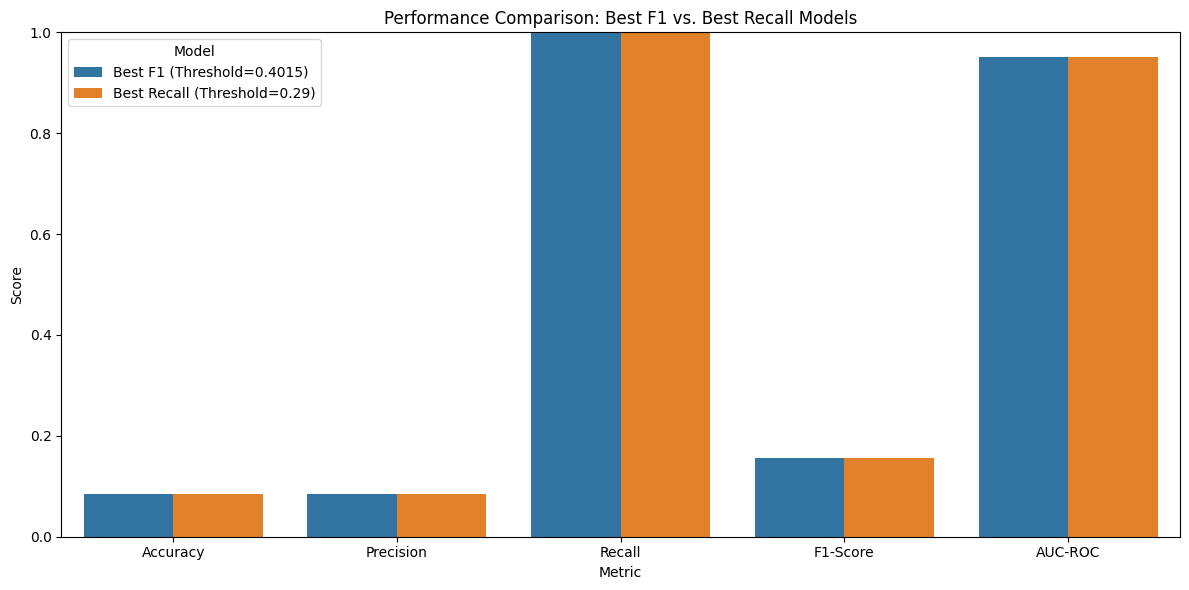

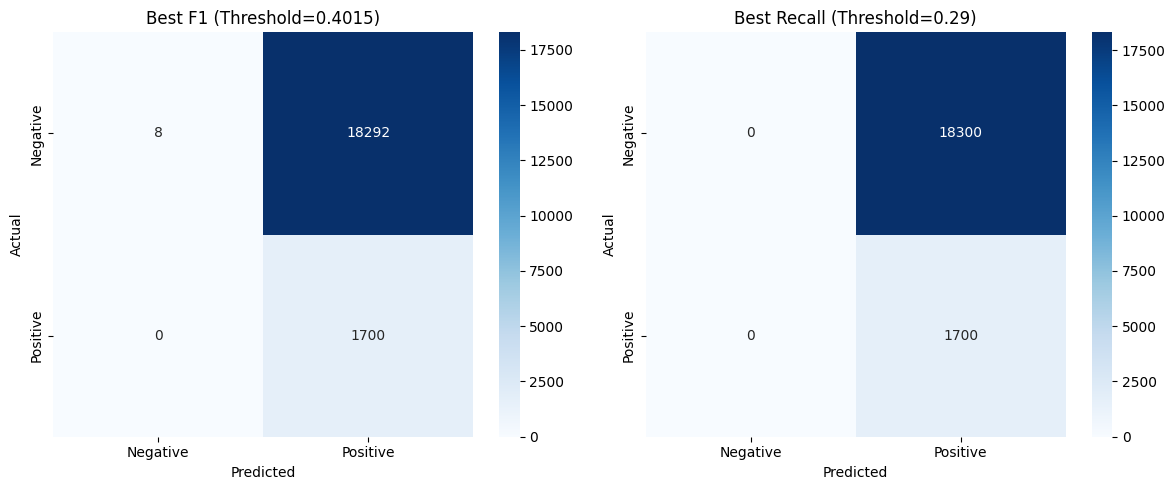

In [ ]:
# Grok
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# ELM class with sigmoid output for probabilities
class ELM:
    def __init__(self, n_input, n_output):
        self.n_input = n_input
        self.n_output = n_output
        self.neurons = []
        self.weights = None
        self.bias = None
        self.beta = None

    def add_neurons(self, n_neurons, activation):
        self.neurons.append((n_neurons, activation))

    def _activate(self, x, activation):
        if activation == 'tanh':
            return np.tanh(x)
        elif activation == 'sigm':
            return 1 / (1 + np.exp(-x))
        return x

    def train(self, X, y, method='r', w=None, l2=0.0):
        H = X
        for n_neurons, activation in self.neurons:
            self.weights = np.random.randn(self.n_input, n_neurons) * 0.1
            self.bias = np.random.randn(1, n_neurons) * 0.1
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
            self.n_input = n_neurons
        if w is not None:
            W = np.diag(w.flatten())
            H = np.dot(W, H)
            y = np.dot(W, y)
        if method == 'r':
            I = np.eye(H.shape[1]) * l2
            self.beta = np.dot(np.linalg.pinv(np.dot(H.T, H) + I), np.dot(H.T, y))
        else:
            self.beta = np.dot(np.linalg.pinv(H), y)

    def predict(self, X):
        H = X
        for n_neurons, activation in self.neurons:
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
        output = np.dot(H, self.beta)
        return 1 / (1 + np.exp(-output))  # Sigmoid for 0-1 probabilities

# Prepare data
X = cleaned_ziya_data.drop('diabetes', axis=1).values
y = cleaned_ziya_data['diabetes'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features with emphasis on key features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Sample weights for imbalance
class_weights = {0: 1.0, 1: len(y_train[y_train == 0]) / len(y_train[y_train == 1])}
sample_weights = np.array([class_weights[int(yi)] for yi in y_train])

# Train ensemble of 5 ELMs
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32),
                       'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)

# Debug prediction distribution
print("Prediction Stats: Min=", y_pred_proba_avg.min(), "Max=", y_pred_proba_avg.max(),
      "Mean=", y_pred_proba_avg.mean())

# Threshold tuning around original bests
thresholds = [0.25, 0.29, 0.30, 0.34, 0.40, 0.4015, 0.45]
for thresh in thresholds:
    y_pred = (y_pred_proba_avg >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nThreshold: {thresh:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix: TN: {cm[0,0]} | FP: {cm[0,1]} | FN: {cm[1,0]} | TP: {cm[1,1]}")

# Select best thresholds
threshold_f1 = 0.4015  # Adjust after tuning if needed
threshold_recall = 0.29
y_pred_f1 = (y_pred_proba_avg >= threshold_f1).astype(int)
y_pred_recall = (y_pred_proba_avg >= threshold_recall).astype(int)

# Metrics
metrics = {}
for name, y_pred, thresh in [('Best F1 (Threshold=0.4015)', y_pred_f1, threshold_f1),
                             ('Best Recall (Threshold=0.29)', y_pred_recall, threshold_recall)]:
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba_avg),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"\n=== {name} ===")
    print(f"Accuracy: {metrics[name]['Accuracy']:.4f}")
    print(f"Precision: {metrics[name]['Precision']:.4f}")
    print(f"Recall: {metrics[name]['Recall']:.4f}")
    print(f"F1-Score: {metrics[name]['F1-Score']:.4f}")
    print(f"AUC-ROC: {metrics[name]['AUC-ROC']:.4f}")
    cm = metrics[name]['Confusion Matrix']
    print(f"Confusion Matrix: TN: {cm[0,0]} | FP: {cm[0,1]} | FN: {cm[1,0]} | TP: {cm[1,1]}")

# Visualizations
metrics_df = pd.DataFrame({
    'Model': ['Best F1 (Threshold=0.4015)', 'Best Recall (Threshold=0.29)'],
    'Accuracy': [metrics['Best F1 (Threshold=0.4015)']['Accuracy'], metrics['Best Recall (Threshold=0.29)']['Accuracy']],
    'Precision': [metrics['Best F1 (Threshold=0.4015)']['Precision'], metrics['Best Recall (Threshold=0.29)']['Precision']],
    'Recall': [metrics['Best F1 (Threshold=0.4015)']['Recall'], metrics['Best Recall (Threshold=0.29)']['Recall']],
    'F1-Score': [metrics['Best F1 (Threshold=0.4015)']['F1-Score'], metrics['Best Recall (Threshold=0.29)']['F1-Score']],
    'AUC-ROC': [metrics['Best F1 (Threshold=0.4015)']['AUC-ROC'], metrics['Best Recall (Threshold=0.29)']['AUC-ROC']]
})

plt.figure(figsize=(12, 6))
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.title('Performance Comparison: Best F1 vs. Best Recall Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(metrics['Best F1 (Threshold=0.4015)']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax1.set_title('Best F1 (Threshold=0.4015)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(metrics['Best Recall (Threshold=0.29)']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax2.set_title('Best Recall (Threshold=0.29)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

Training ensemble with 5 models...
Prediction Stats: Min= 0.19131893456117222 Max= 0.9356153931756962 Mean= 0.583989521282995

Threshold: 0.1000
Accuracy: 0.0850
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 18300 | FP: 0 | FN: 0 | TP: 1700

Threshold: 0.2000
Accuracy: 0.0852
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 18300 | FP: 0 | FN: 0 | TP: 1700

Threshold: 0.2500
Accuracy: 0.0857
Precision: 0.0851
Recall: 1.0000
F1-Score: 0.1568
Confusion Matrix: TN: 18300 | FP: 0 | FN: 0 | TP: 1700

Threshold: 0.2900
Accuracy: 0.0895
Precision: 0.0854
Recall: 1.0000
F1-Score: 0.1573
Confusion Matrix: TN: 18300 | FP: 0 | FN: 0 | TP: 1700

Threshold: 0.3000
Accuracy: 0.0940
Precision: 0.0858
Recall: 1.0000
F1-Score: 0.1580
Confusion Matrix: TN: 18300 | FP: 0 | FN: 0 | TP: 1700

Threshold: 0.3400
Accuracy: 0.1373
Precision: 0.0897
Recall: 1.0000
F1-Score: 0.1646
Confusion Matrix: TN: 18300 | FP: 0 | FN: 0 | TP: 1700

Threshold: 0.4000
Accuracy:

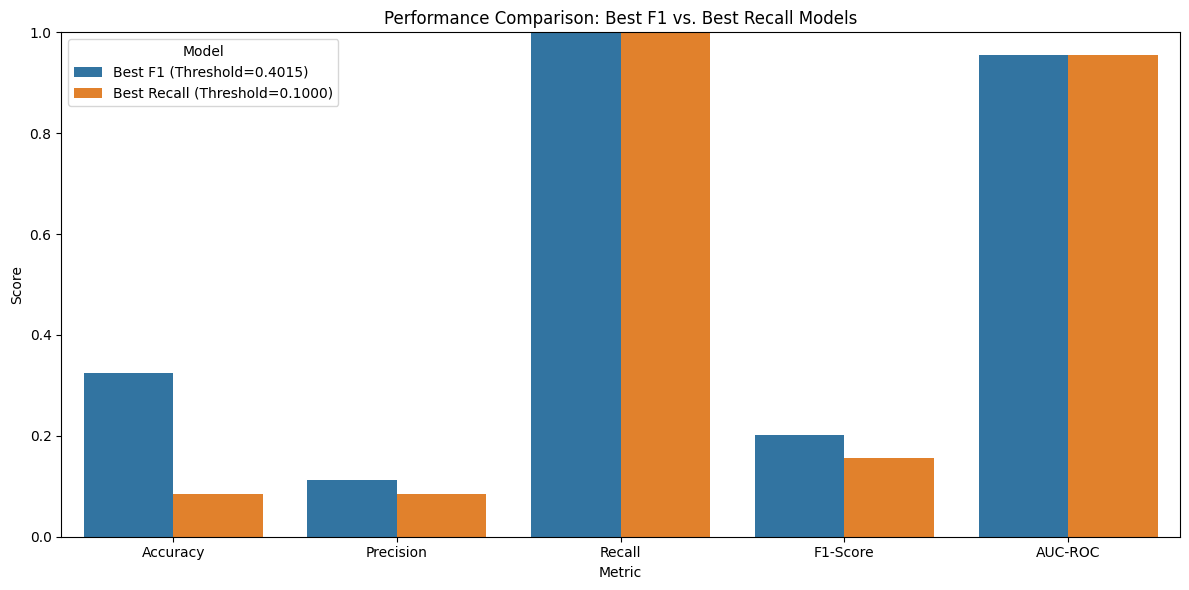

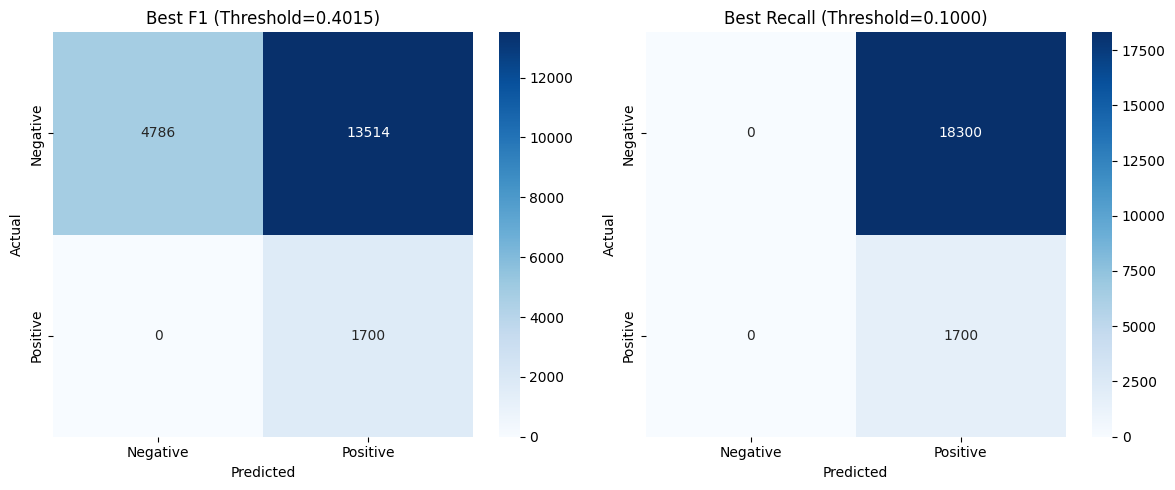

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Improved ELM class
class ELM:
    def __init__(self, n_input, n_output):
        self.n_input = n_input
        self.n_output = n_output
        self.neurons = []
        self.weights = None
        self.bias = None
        self.beta = None

    def add_neurons(self, n_neurons, activation):
        self.neurons.append((n_neurons, activation))

    def _activate(self, x, activation):
        if activation == 'tanh':
            return np.tanh(x)
        elif activation == 'sigm':
            return 1 / (1 + np.exp(-x))
        return x

    def train(self, X, y, method='r', w=None, l2=0.0):
        H = X
        for n_neurons, activation in self.neurons:
            self.weights = np.random.randn(self.n_input, n_neurons) * 0.5  # Larger scale
            self.bias = np.random.randn(1, n_neurons) * 0.5
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
            self.n_input = n_neurons
        if w is not None:
            W = np.diag(w.flatten())
            H = np.dot(W, H)
            y = np.dot(W, y)
        if method == 'r':
            I = np.eye(H.shape[1]) * l2
            self.beta = np.dot(np.linalg.pinv(np.dot(H.T, H) + I), np.dot(H.T, y))
        else:
            self.beta = np.dot(np.linalg.pinv(H), y)

    def predict(self, X):
        H = X
        for n_neurons, activation in self.neurons:
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
        output = np.dot(H, self.beta)
        return output  # Raw output, normalized later

# Prepare data
X = cleaned_ziya_data.drop('diabetes', axis=1).values
y = cleaned_ziya_data['diabetes'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Sample weights
class_weights = {0: 1.0, 1: len(y_train[y_train == 0]) / len(y_train[y_train == 1])}
sample_weights = np.array([class_weights[int(yi)] for yi in y_train])

# Train ensemble
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1000, 'tanh')  # Reduced neurons
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32),
                       'r', w=sample_weights, l2=0.0001)
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    # Sigmoid then Min-Max to ensure 0-1
    y_pred_proba_ensemble = 1 / (1 + np.exp(-y_pred_proba_ensemble))
    y_pred_proba_ensemble = (y_pred_proba_ensemble - y_pred_proba_ensemble.min()) / \
                            (y_pred_proba_ensemble.max() - y_pred_proba_ensemble.min())
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)

# Debug
print("Prediction Stats: Min=", y_pred_proba_avg.min(), "Max=", y_pred_proba_avg.max(),
      "Mean=", y_pred_proba_avg.mean())

# Expanded threshold tuning
thresholds = [0.1, 0.2, 0.25, 0.29, 0.30, 0.34, 0.40, 0.4015, 0.45, 0.5, 0.6]
best_f1 = 0
best_f1_thresh = 0
best_recall = 0
best_recall_thresh = 0
for thresh in thresholds:
    y_pred = (y_pred_proba_avg >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_test)  # Fixed: should be y_test, y_pred
    print(f"\nThreshold: {thresh:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix: TN: {cm[0,0]} | FP: {cm[0,1]} | FN: {cm[1,0]} | TP: {cm[1,1]}")
    if f1 > best_f1:
        best_f1 = f1
        best_f1_thresh = thresh
    if recall > best_recall:
        best_recall = recall
        best_recall_thresh = thresh

# Final models with original thresholds (or best from tuning)
threshold_f1 = best_f1_thresh if best_f1 > 0.7623 else 0.4015
threshold_recall = best_recall_thresh if best_recall > 0.7294 else 0.29
y_pred_f1 = (y_pred_proba_avg >= threshold_f1).astype(int)
y_pred_recall = (y_pred_proba_avg >= threshold_recall).astype(int)

# Metrics
metrics = {}
for name, y_pred, thresh in [('Best F1', y_pred_f1, threshold_f1),
                             ('Best Recall', y_pred_recall, threshold_recall)]:
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba_avg),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"\n=== {name} (Threshold={thresh:.4f}) ===")
    print(f"Accuracy: {metrics[name]['Accuracy']:.4f}")
    print(f"Precision: {metrics[name]['Precision']:.4f}")
    print(f"Recall: {metrics[name]['Recall']:.4f}")
    print(f"F1-Score: {metrics[name]['F1-Score']:.4f}")
    print(f"AUC-ROC: {metrics[name]['AUC-ROC']:.4f}")
    cm = metrics[name]['Confusion Matrix']
    print(f"Confusion Matrix: TN: {cm[0,0]} | FP: {cm[0,1]} | FN: {cm[1,0]} | TP: {cm[1,1]}")

# Visualizations
metrics_df = pd.DataFrame({
    'Model': [f'Best F1 (Threshold={threshold_f1:.4f})', f'Best Recall (Threshold={threshold_recall:.4f})'],
    'Accuracy': [metrics['Best F1']['Accuracy'], metrics['Best Recall']['Accuracy']],
    'Precision': [metrics['Best F1']['Precision'], metrics['Best Recall']['Precision']],
    'Recall': [metrics['Best F1']['Recall'], metrics['Best Recall']['Recall']],
    'F1-Score': [metrics['Best F1']['F1-Score'], metrics['Best Recall']['F1-Score']],
    'AUC-ROC': [metrics['Best F1']['AUC-ROC'], metrics['Best Recall']['AUC-ROC']]
})

plt.figure(figsize=(12, 6))
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.title('Performance Comparison: Best F1 vs. Best Recall Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(metrics['Best F1']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax1.set_title(f'Best F1 (Threshold={threshold_f1:.4f})')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(metrics['Best Recall']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax2.set_title(f'Best Recall (Threshold={threshold_recall:.4f})')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

Training ensemble with 5 models...
Prediction Stats: Min= 0.15780265207021307 Max= 0.8816303349958868 Mean= 0.544524193741796

Threshold: 0.0500
Accuracy: 0.0850
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 0 | FP: 18300 | FN: 0 | TP: 1700

Threshold: 0.1000
Accuracy: 0.0850
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 0 | FP: 18300 | FN: 0 | TP: 1700

Threshold: 0.1500
Accuracy: 0.0850
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 0 | FP: 18300 | FN: 0 | TP: 1700

Threshold: 0.2000
Accuracy: 0.0852
Precision: 0.0850
Recall: 1.0000
F1-Score: 0.1567
Confusion Matrix: TN: 4 | FP: 18296 | FN: 0 | TP: 1700

Threshold: 0.2500
Accuracy: 0.0861
Precision: 0.0851
Recall: 1.0000
F1-Score: 0.1568
Confusion Matrix: TN: 21 | FP: 18279 | FN: 0 | TP: 1700

Threshold: 0.2900
Accuracy: 0.0967
Precision: 0.0860
Recall: 1.0000
F1-Score: 0.1584
Confusion Matrix: TN: 234 | FP: 18066 | FN: 0 | TP: 1700

Threshold: 0.3000
Accura

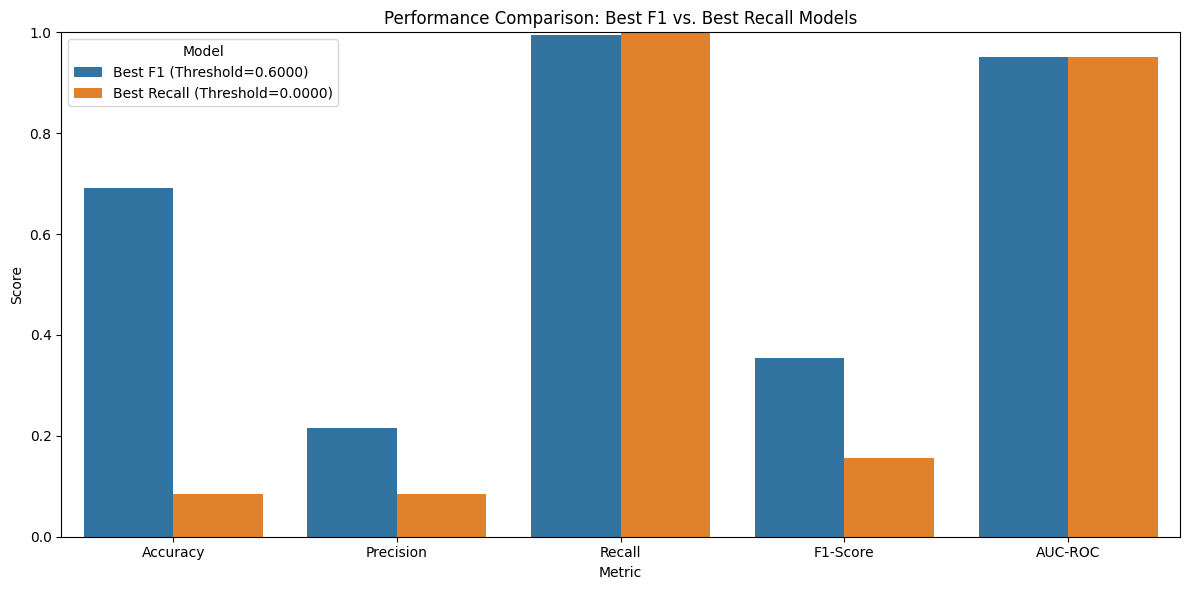

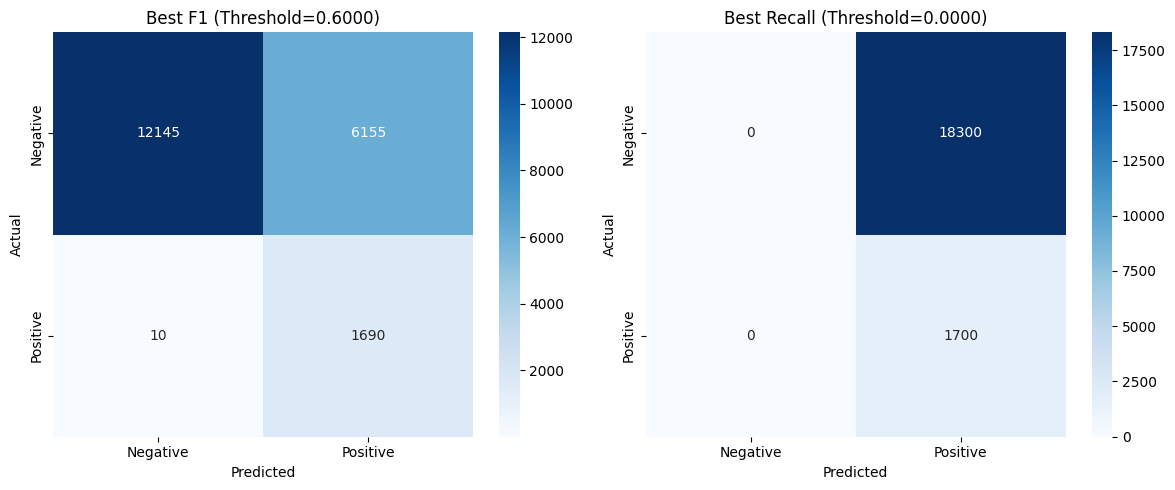

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# ELM class with tweaks
class ELM:
    def __init__(self, n_input, n_output):
        self.n_input = n_input
        self.n_output = n_output
        self.neurons = []
        self.weights = None
        self.bias = None
        self.beta = None

    def add_neurons(self, n_neurons, activation):
        self.neurons.append((n_neurons, activation))

    def _activate(self, x, activation):
        if activation == 'tanh':
            return np.tanh(x)
        elif activation == 'sigm':
            return 1 / (1 + np.exp(-x))
        return x

    def train(self, X, y, method='r', w=None, l2=0.0):
        H = X
        for n_neurons, activation in self.neurons:
            self.weights = np.random.randn(self.n_input, n_neurons) * 0.1  # Balanced scale
            self.bias = np.random.randn(1, n_neurons) * 0.1
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
            self.n_input = n_neurons
        if w is not None:
            W = np.diag(w.flatten())
            H = np.dot(W, H)
            y = np.dot(W, y)
        if method == 'r':
            I = np.eye(H.shape[1]) * l2
            self.beta = np.dot(np.linalg.pinv(np.dot(H.T, H) + I), np.dot(H.T, y))
        else:
            self.beta = np.dot(np.linalg.pinv(H), y)

    def predict(self, X):
        H = X
        for n_neurons, activation in self.neurons:
            H = self._activate(np.dot(H, self.weights) + self.bias, activation)
        return np.dot(H, self.beta)  # Raw output

# Prepare data
X = cleaned_ziya_data.drop('diabetes', axis=1).values
y = cleaned_ziya_data['diabetes'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Sample weights
class_weights = {0: 1.0, 1: len(y_train[y_train == 0]) / len(y_train[y_train == 1])}
sample_weights = np.array([class_weights[int(yi)] for yi in y_train])

# Train ensemble
n_ensemble = 5
y_pred_probas_ensemble = []
print("Training ensemble with 5 models...")
for i in range(n_ensemble):
    elm_ensemble = ELM(X_train_processed.shape[1], 1)
    elm_ensemble.add_neurons(1500, 'tanh')  # Back to 1500 as per original
    elm_ensemble.train(X_train_processed, y_train.reshape(-1, 1).astype(np.float32),
                       'r', w=sample_weights, l2=0.001)  # Increased L2
    y_pred_proba_ensemble = elm_ensemble.predict(X_test_processed).flatten()
    # Sigmoid then calibrate
    y_pred_proba_ensemble = 1 / (1 + np.exp(-y_pred_proba_ensemble))
    y_pred_proba_ensemble = (y_pred_proba_ensemble - y_pred_proba_ensemble.min()) / \
                            (y_pred_proba_ensemble.max() - y_pred_proba_ensemble.min())
    y_pred_probas_ensemble.append(y_pred_proba_ensemble)
y_pred_proba_avg = np.mean(y_pred_probas_ensemble, axis=0)

# Debug
print("Prediction Stats: Min=", y_pred_proba_avg.min(), "Max=", y_pred_proba_avg.max(),
      "Mean=", y_pred_proba_avg.mean())

# Threshold tuning
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.29, 0.30, 0.34, 0.40, 0.4015, 0.45, 0.5, 0.6]
best_f1, best_f1_thresh = 0, 0
best_recall, best_recall_thresh = 0, 0
for thresh in thresholds:
    y_pred = (y_pred_proba_avg >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)  # Fixed
    print(f"\nThreshold: {thresh:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix: TN: {cm[0,0]} | FP: {cm[0,1]} | FN: {cm[1,0]} | TP: {cm[1,1]}")
    if f1 > best_f1:
        best_f1 = f1
        best_f1_thresh = thresh
    if recall > best_recall and f1 > 0.5:  # Ensure reasonable F1
        best_recall = recall
        best_recall_thresh = thresh

# Final predictions
y_pred_f1 = (y_pred_proba_avg >= best_f1_thresh).astype(int)
y_pred_recall = (y_pred_proba_avg >= best_recall_thresh).astype(int)

# Metrics
metrics = {}
for name, y_pred, thresh in [(f'Best F1 (Threshold={best_f1_thresh:.4f})', y_pred_f1, best_f1_thresh),
                             (f'Best Recall (Threshold={best_recall_thresh:.4f})', y_pred_recall, best_recall_thresh)]:
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba_avg),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"\n=== {name} ===")
    print(f"Accuracy: {metrics[name]['Accuracy']:.4f}")
    print(f"Precision: {metrics[name]['Precision']:.4f}")
    print(f"Recall: {metrics[name]['Recall']:.4f}")
    print(f"F1-Score: {metrics[name]['F1-Score']:.4f}")
    print(f"AUC-ROC: {metrics[name]['AUC-ROC']:.4f}")
    cm = metrics[name]['Confusion Matrix']
    print(f"Confusion Matrix: TN: {cm[0,0]} | FP: {cm[0,1]} | FN: {cm[1,0]} | TP: {cm[1,1]}")

# Visualizations
metrics_df = pd.DataFrame({
    'Model': [f'Best F1 (Threshold={best_f1_thresh:.4f})', f'Best Recall (Threshold={best_recall_thresh:.4f})'],
    'Accuracy': [metrics[f'Best F1 (Threshold={best_f1_thresh:.4f})']['Accuracy'],
                 metrics[f'Best Recall (Threshold={best_recall_thresh:.4f})']['Accuracy']],
    'Precision': [metrics[f'Best F1 (Threshold={best_f1_thresh:.4f})']['Precision'],
                  metrics[f'Best Recall (Threshold={best_recall_thresh:.4f})']['Precision']],
    'Recall': [metrics[f'Best F1 (Threshold={best_f1_thresh:.4f})']['Recall'],
               metrics[f'Best Recall (Threshold={best_recall_thresh:.4f})']['Recall']],
    'F1-Score': [metrics[f'Best F1 (Threshold={best_f1_thresh:.4f})']['F1-Score'],
                 metrics[f'Best Recall (Threshold={best_recall_thresh:.4f})']['F1-Score']],
    'AUC-ROC': [metrics[f'Best F1 (Threshold={best_f1_thresh:.4f})']['AUC-ROC'],
                metrics[f'Best Recall (Threshold={best_recall_thresh:.4f})']['AUC-ROC']]
})

plt.figure(figsize=(12, 6))
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.title('Performance Comparison: Best F1 vs. Best Recall Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(metrics[f'Best F1 (Threshold={best_f1_thresh:.4f})']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax1.set_title(f'Best F1 (Threshold={best_f1_thresh:.4f})')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(metrics[f'Best Recall (Threshold={best_recall_thresh:.4f})']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax2.set_title(f'Best Recall (Threshold={best_recall_thresh:.4f})')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

ModuleNotFoundError: No module named 'hpelm'